In [42]:
from datasets import load_dataset
import json

# Load the dataset
dataset = load_dataset("barc0/100k-gpt4omini-description-gpt4omini-code_generated_problems")

# Function to check if a problem meets our criteria for "easiest" problems
def is_easy_problem(example):
    # Criterion 1: Has 5 or fewer examples (4 sample + 1 test)
    if len(example["examples"]) > 5:
        return False
    
    # Criterion 2: All grids must have dimensions less than 10x10
    for pair in example["examples"]:
        # Check input grid dimensions
        input_grid = pair[0]
        if len(input_grid) > 8 or max(len(row) for row in input_grid) > 8:
            return False
        
        # Check output grid dimensions
        output_grid = pair[1]
        if len(output_grid) > 8 or max(len(row) for row in output_grid) > 8:
            return False
    
    # If we got here, the problem meets all criteria
    return True

# Filter the dataset
easy_problems = []
for idx, example in enumerate(dataset["train"]):
    if is_easy_problem(example):
        # Add problem ID or index for reference
        example["problem_id"] = idx
        easy_problems.append(example)

    # if idx > 10000:
    #     break

print(f"Found {len(easy_problems)} easy problems out of {len(dataset['train'])} total problems")

# Optional: Save the filtered dataset to a file
with open("easiest_arc_problems_8x8.json", "w") as f:
    json.dump(easy_problems, f, indent=2)

# Display a few examples of the easy problems
# for i in range(min(5, len(easy_problems))):
#     problem = easy_problems[i]
#     print(f"\nProblem {problem['problem_id']}:")
#     print(f"Number of examples: {len(problem['examples'])}")
    
#     # Display dimensions of each grid
#     for j, pair in enumerate(problem["examples"]):
#         input_shape = (len(pair[0]), len(pair[0][0]))
#         output_shape = (len(pair[1]), len(pair[1][0]))
#         print(f"  Example {j}: Input shape {input_shape}, Output shape {output_shape}")

Found 187 easy problems out of 102522 total problems


In [25]:
from datasets import load_dataset
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset = load_dataset("barc0/100k-gpt4omini-description-gpt4omini-code_generated_problems")

# Function to calculate grid area
def calculate_grid_area(grid):
    height = len(grid)
    width = max(len(row) for row in grid) if height > 0 else 0
    return height * width

# Function to check if a problem meets our criteria for "easiest" problems
def is_easy_problem(example, max_examples=4, max_dimension=10):
    # Criterion 1: Has max_examples or fewer examples
    if len(example["examples"]) > max_examples:
        return False
    
    # Criterion 2: All grids must have dimensions less than max_dimension
    for pair in example["examples"]:
        # Check input grid dimensions
        input_grid = pair[0]  # Corrected: pair is a list, not a dict
        if len(input_grid) >= max_dimension or max(len(row) for row in input_grid) >= max_dimension:
            return False
        
        # Check output grid dimensions
        output_grid = pair[1]  # Corrected: pair is a list, not a dict
        if len(output_grid) >= max_dimension or max(len(row) for row in output_grid) >= max_dimension:
            return False
    
    # If we got here, the problem meets all criteria
    return True

# Collect statistics on the entire dataset
num_examples_list = []
input_areas = []
output_areas = []
max_dimensions = []

print("Analyzing dataset statistics...")
for idx, example in enumerate(dataset["train"]):
    num_examples_list.append(len(example["examples"]))
    
    # Calculate max dimensions and areas for each example
    for pair in example["examples"]:
        input_grid = pair[0]
        output_grid = pair[1]
        
        # Input grid stats
        input_height = len(input_grid)
        input_width = max(len(row) for row in input_grid) if input_height > 0 else 0
        input_areas.append(input_height * input_width)
        
        # Output grid stats
        output_height = len(output_grid)
        output_width = max(len(row) for row in output_grid) if output_height > 0 else 0
        output_areas.append(output_height * output_width)
        
        # Track maximum dimension in each grid
        max_dimensions.append(max(input_height, input_width, output_height, output_width))

# Calculate percentiles for number of examples
example_percentiles = np.percentile(num_examples_list, [10, 25, 50, 75, 90, 95, 99])
print("\nNumber of Examples per Problem:")
print(f"Min: {min(num_examples_list)}, Max: {max(num_examples_list)}")
print(f"10th percentile: {example_percentiles[0]:.1f}")
print(f"25th percentile: {example_percentiles[1]:.1f}")
print(f"50th percentile (median): {example_percentiles[2]:.1f}")
print(f"75th percentile: {example_percentiles[3]:.1f}")
print(f"90th percentile: {example_percentiles[4]:.1f}")
print(f"95th percentile: {example_percentiles[5]:.1f}")
print(f"99th percentile: {example_percentiles[6]:.1f}")

# Calculate percentiles for grid areas
input_area_percentiles = np.percentile(input_areas, [10, 25, 50, 75, 90, 95, 99])
output_area_percentiles = np.percentile(output_areas, [10, 25, 50, 75, 90, 95, 99])
max_dimension_percentiles = np.percentile(max_dimensions, [10, 25, 50, 75, 90, 95, 99])

print("\nInput Grid Areas (height × width):")
print(f"Min: {min(input_areas)}, Max: {max(input_areas)}")
print(f"10th percentile: {input_area_percentiles[0]:.1f}")
print(f"25th percentile: {input_area_percentiles[1]:.1f}")
print(f"50th percentile (median): {input_area_percentiles[2]:.1f}")
print(f"75th percentile: {input_area_percentiles[3]:.1f}")
print(f"90th percentile: {input_area_percentiles[4]:.1f}")
print(f"95th percentile: {input_area_percentiles[5]:.1f}")
print(f"99th percentile: {input_area_percentiles[6]:.1f}")

print("\nOutput Grid Areas (height × width):")
print(f"Min: {min(output_areas)}, Max: {max(output_areas)}")
print(f"10th percentile: {output_area_percentiles[0]:.1f}")
print(f"25th percentile: {output_area_percentiles[1]:.1f}")
print(f"50th percentile (median): {output_area_percentiles[2]:.1f}")
print(f"75th percentile: {output_area_percentiles[3]:.1f}")
print(f"90th percentile: {output_area_percentiles[4]:.1f}")
print(f"95th percentile: {output_area_percentiles[5]:.1f}")
print(f"99th percentile: {output_area_percentiles[6]:.1f}")

print("\nMaximum Grid Dimension (height or width):")
print(f"Min: {min(max_dimensions)}, Max: {max(max_dimensions)}")
print(f"10th percentile: {max_dimension_percentiles[0]:.1f}")
print(f"25th percentile: {max_dimension_percentiles[1]:.1f}")
print(f"50th percentile (median): {max_dimension_percentiles[2]:.1f}")
print(f"75th percentile: {max_dimension_percentiles[3]:.1f}")
print(f"90th percentile: {max_dimension_percentiles[4]:.1f}")
print(f"95th percentile: {max_dimension_percentiles[5]:.1f}")
print(f"99th percentile: {max_dimension_percentiles[6]:.1f}")

# Filter the dataset based on criteria
def filter_dataset(max_examples=4, max_dimension=10):
    filtered_problems = []
    for idx, example in enumerate(dataset["train"]):
        if is_easy_problem(example, max_examples, max_dimension):
            # Add problem ID or index for reference
            example_copy = example.copy()
            example_copy["problem_id"] = idx
            filtered_problems.append(example_copy)
    
    print(f"\nFound {len(filtered_problems)} problems matching criteria:")
    print(f"- Max examples: {max_examples}")
    print(f"- Max dimension: {max_dimension}")
    print(f"- Percentage of dataset: {len(filtered_problems) / len(dataset['train']) * 100:.2f}%")
    
    return filtered_problems


# Try different filtering criteria based on percentiles
print("\nFiltering datasets with different criteria:")

# Default criteria (as requested)
easy_problems = filter_dataset(max_examples=4, max_dimension=10)

# Filter based on strict criteria (25th percentile)
strict_problems = filter_dataset(
    max_examples=int(example_percentiles[1]),  # 25th percentile
    max_dimension=int(max_dimension_percentiles[1])  # 25th percentile
)

# Filter based on moderate criteria (50th percentile)
moderate_problems = filter_dataset(
    max_examples=int(example_percentiles[2]),  # 50th percentile
    max_dimension=int(max_dimension_percentiles[2])  # 50th percentile
)

# Filter based on relaxed criteria (75th percentile)
relaxed_problems = filter_dataset(
    max_examples=int(example_percentiles[3]),  # 75th percentile
    max_dimension=int(max_dimension_percentiles[3])  # 75th percentile
)

# Save the filtered dataset to a file
with open("easiest_arc_problems.json", "w") as f:
    json.dump(easy_problems, f, indent=2)


# Display a few examples of the easy problems
if easy_problems:
    print("\nExample problems details:")
    for i in range(min(5, len(easy_problems))):
        problem = easy_problems[i]
        print(f"\nProblem {problem['problem_id']}:")
        print(f"Number of examples: {len(problem['examples'])}")
        
        # Display dimensions and areas of each grid
        for j, pair in enumerate(problem["examples"]):
            input_grid = pair[0]
            output_grid = pair[1]
            
            input_height = len(input_grid)
            input_width = max(len(row) for row in input_grid) if input_height > 0 else 0
            input_area = input_height * input_width
            
            output_height = len(output_grid)
            output_width = max(len(row) for row in output_grid) if output_height > 0 else 0
            output_area = output_height * output_width
            
            print(f"  Example {j}:")
            print(f"    Input: {input_height}x{input_width} (area: {input_area})")
            print(f"    Output: {output_height}x{output_width} (area: {output_area})")
else:
    print("No problems found with the specified criteria.")


Analyzing dataset statistics...

Number of Examples per Problem:
Min: 4, Max: 59
10th percentile: 11.0
25th percentile: 27.0
50th percentile (median): 30.0
75th percentile: 30.0
90th percentile: 44.0
95th percentile: 54.0
99th percentile: 59.0

Input Grid Areas (height × width):
Min: 1, Max: 7396
10th percentile: 30.0
25th percentile: 66.0
50th percentile (median): 110.0
75th percentile: 198.0
90th percentile: 320.0
95th percentile: 400.0
99th percentile: 576.0

Output Grid Areas (height × width):
Min: 1, Max: 250965
10th percentile: 30.0
25th percentile: 64.0
50th percentile (median): 100.0
75th percentile: 198.0
90th percentile: 324.0
95th percentile: 400.0
99th percentile: 729.0

Maximum Grid Dimension (height or width):
Min: 2, Max: 3564
10th percentile: 7.0
25th percentile: 10.0
50th percentile (median): 12.0
75th percentile: 16.0
90th percentile: 20.0
95th percentile: 20.0
99th percentile: 29.0

Filtering datasets with different criteria:


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x1037fe7a0>>
Traceback (most recent call last):
  File "/Users/light/research/arc_repo/.conda/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


KeyboardInterrupt: 

In [39]:
np.percentile(num_examples_list, [0.5, 1, 2, 3, 4])

array([4., 4., 5., 6., 7.])

In [41]:
np.percentile(input_areas, [0.5, 1, 2, 3, 4])

array([ 8.,  9., 12., 16., 16.])

In [31]:
np.percentile(output_areas, [0.5, 1, 2])

array([ 4.,  8., 12.])

In [35]:
np.percentile(max_dimensions, [0.5, 1, 2])

array([4., 4., 5.])

In [ ]:

output_area_percentiles = np.percentile(output_areas, [10, 25, 50, 75, 90, 95, 99])
max_dimension_percentiles = np.percentile(max_dimensions, [10, 25, 50, 75, 90, 95, 99])

Visualizing Problem 912


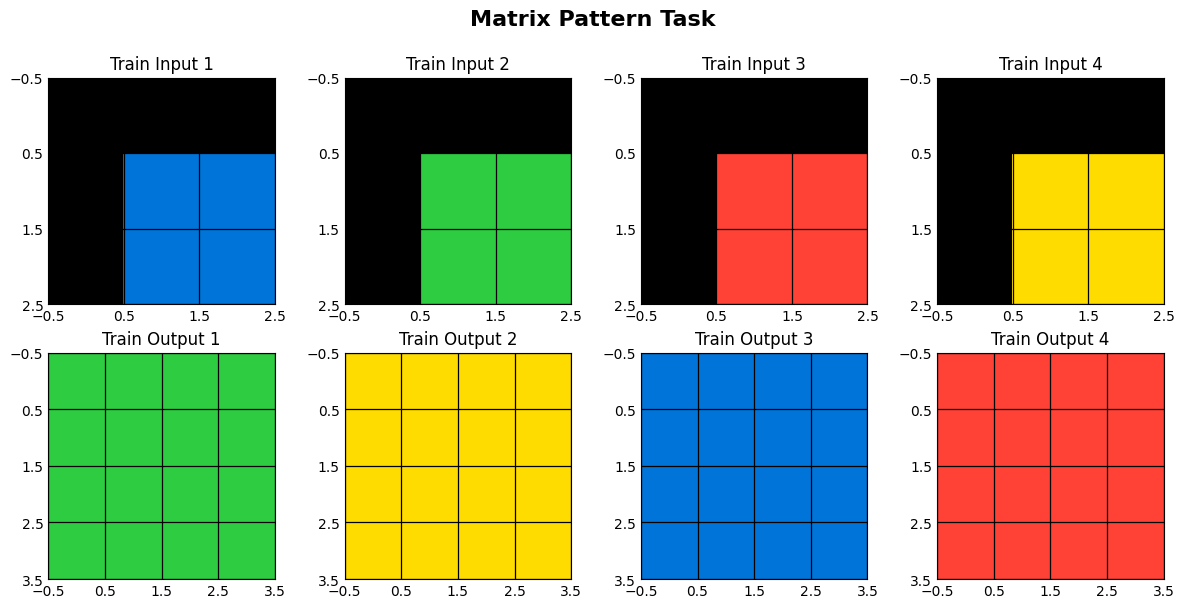

Visualizing Problem 1184


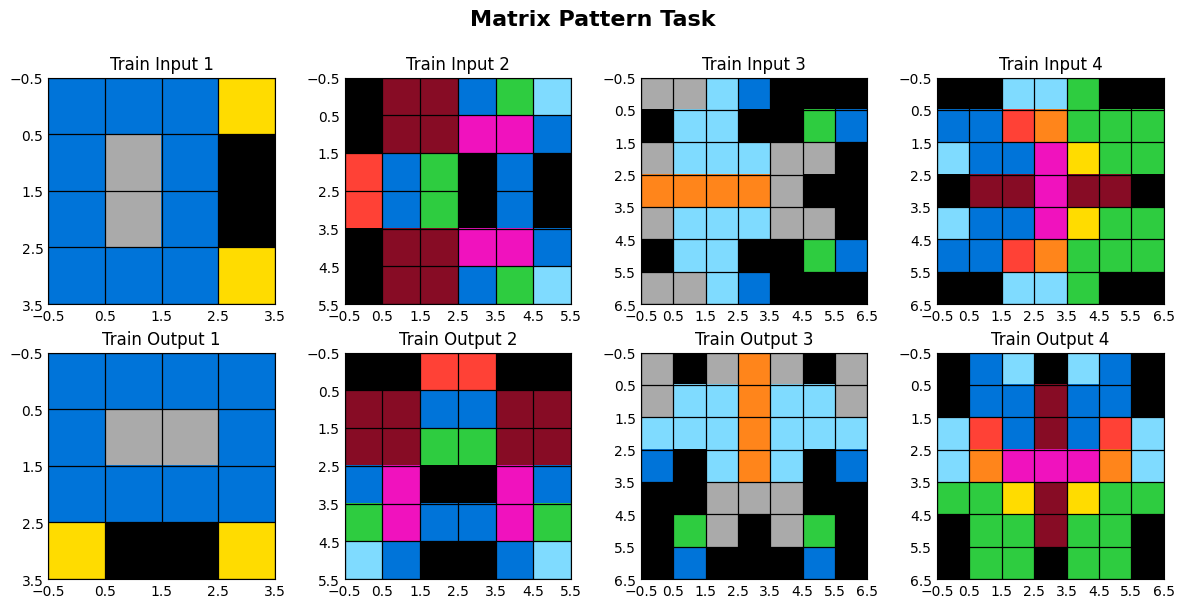

Visualizing Problem 2463


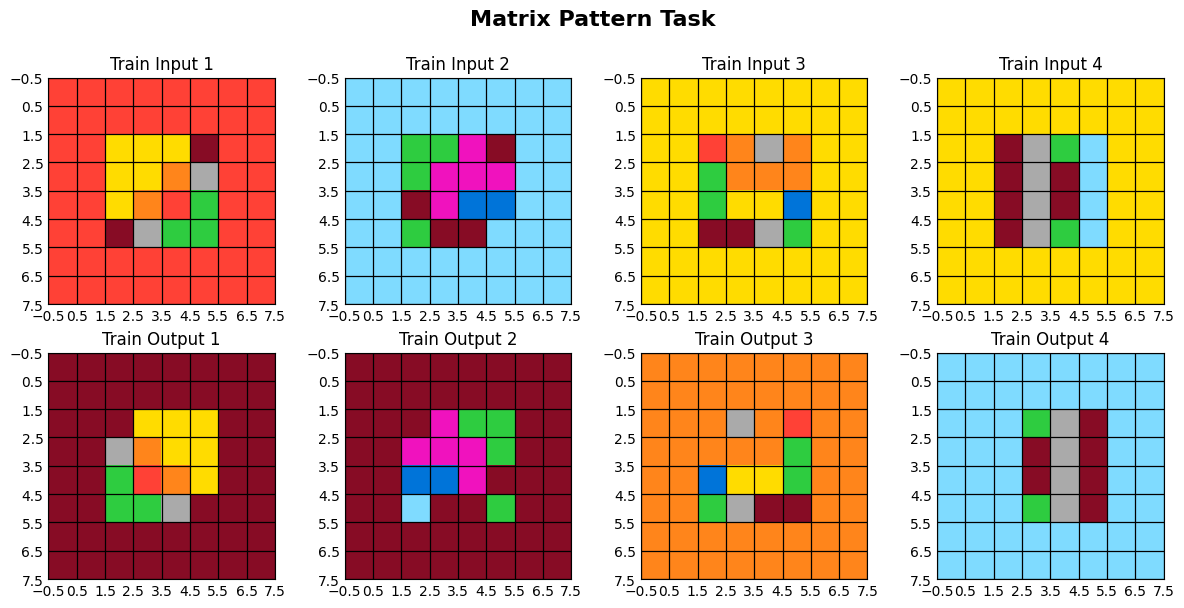

Visualizing Problem 2858


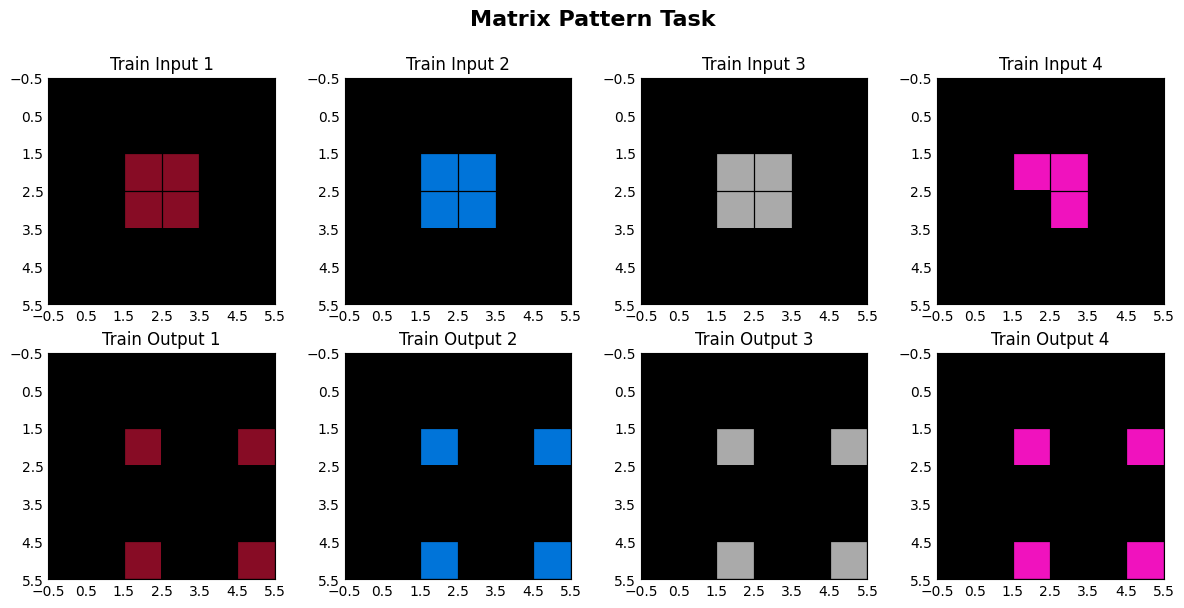

Visualizing Problem 2869


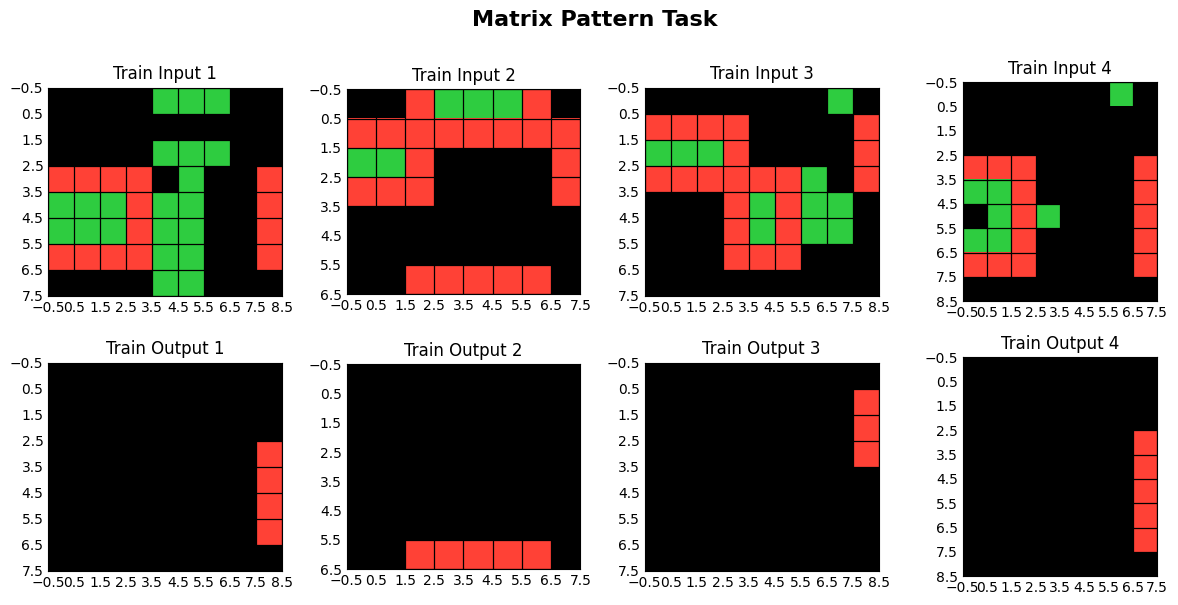

Visualizing Problem 3059


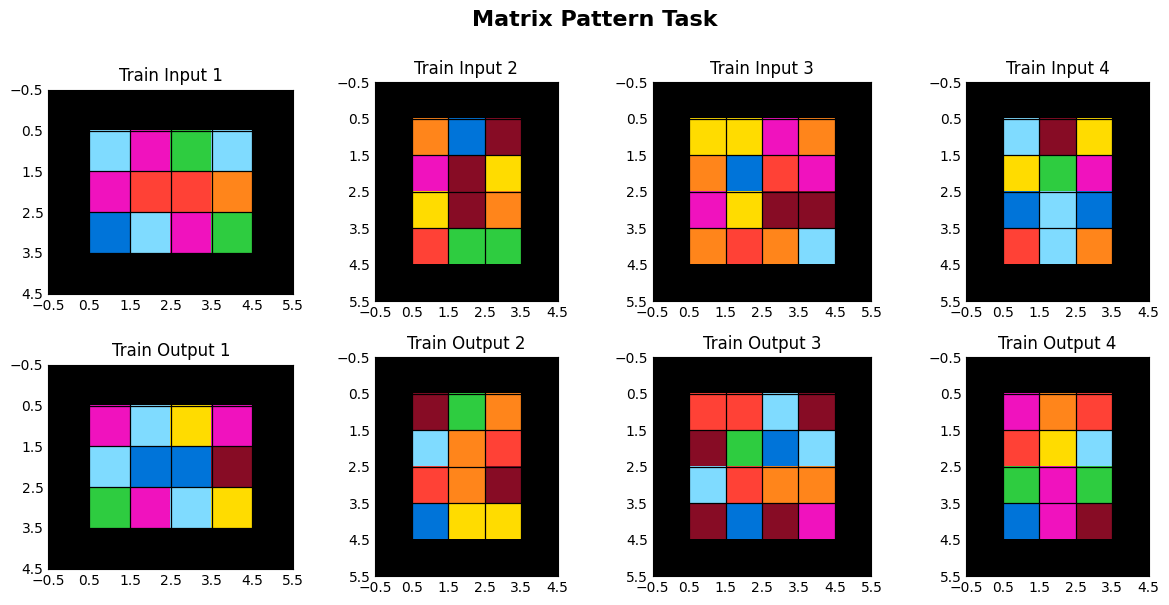

Visualizing Problem 3444


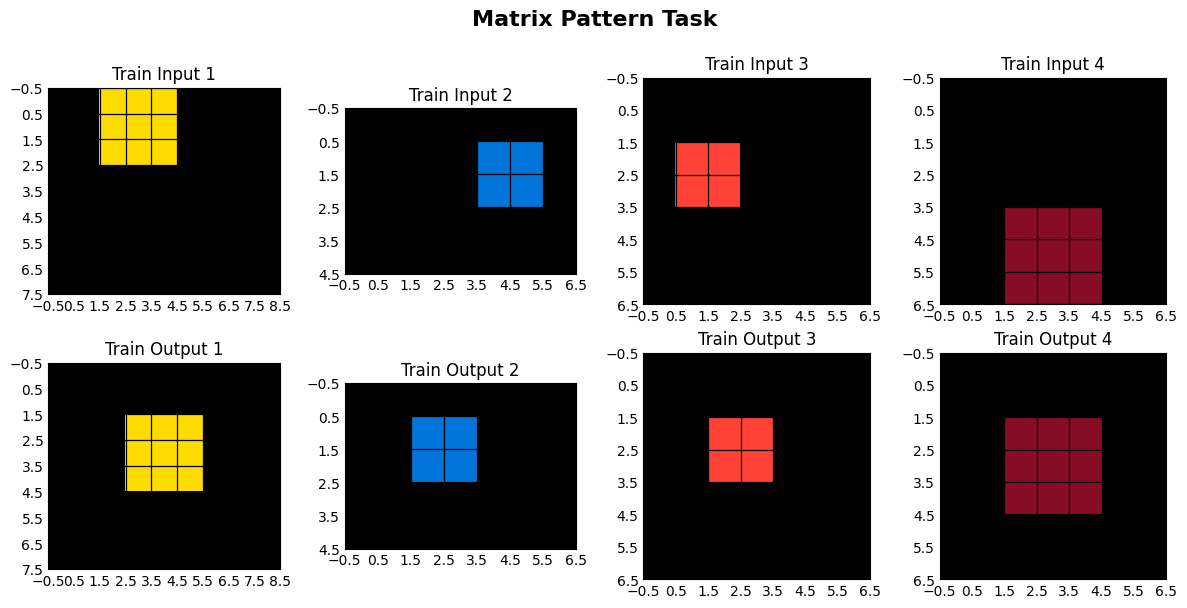

Visualizing Problem 3807


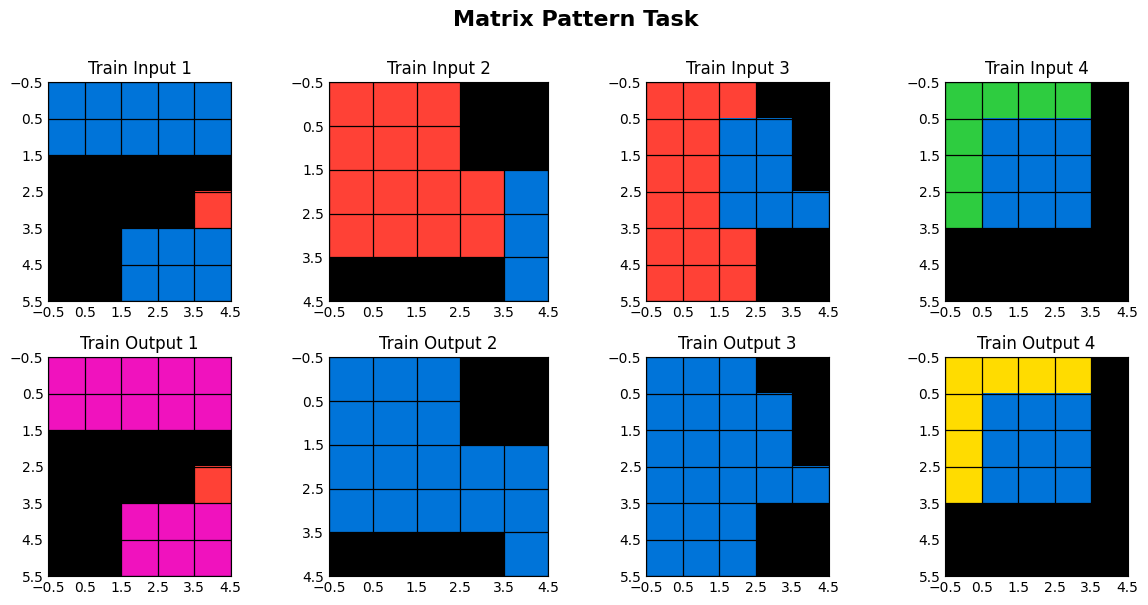

Visualizing Problem 4731


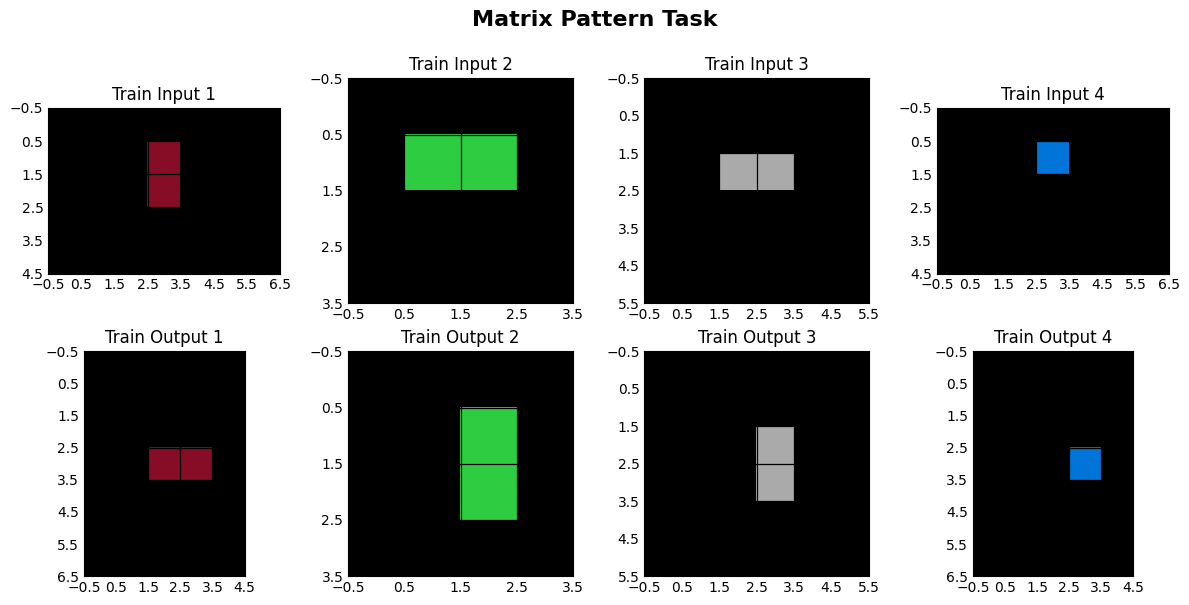

Visualizing Problem 5334


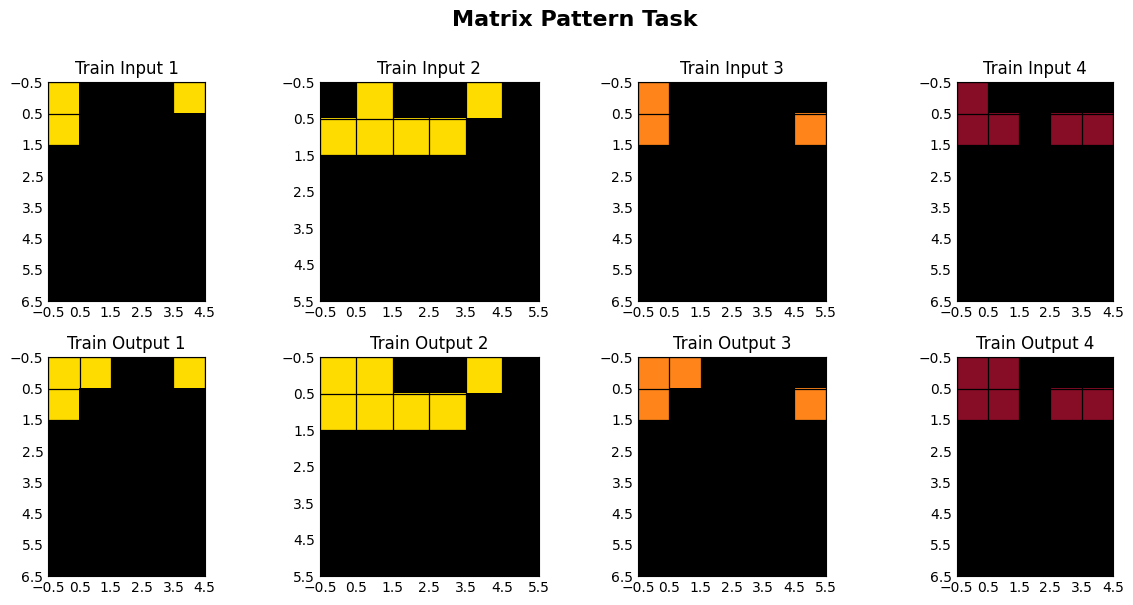

Visualizing Problem 6140


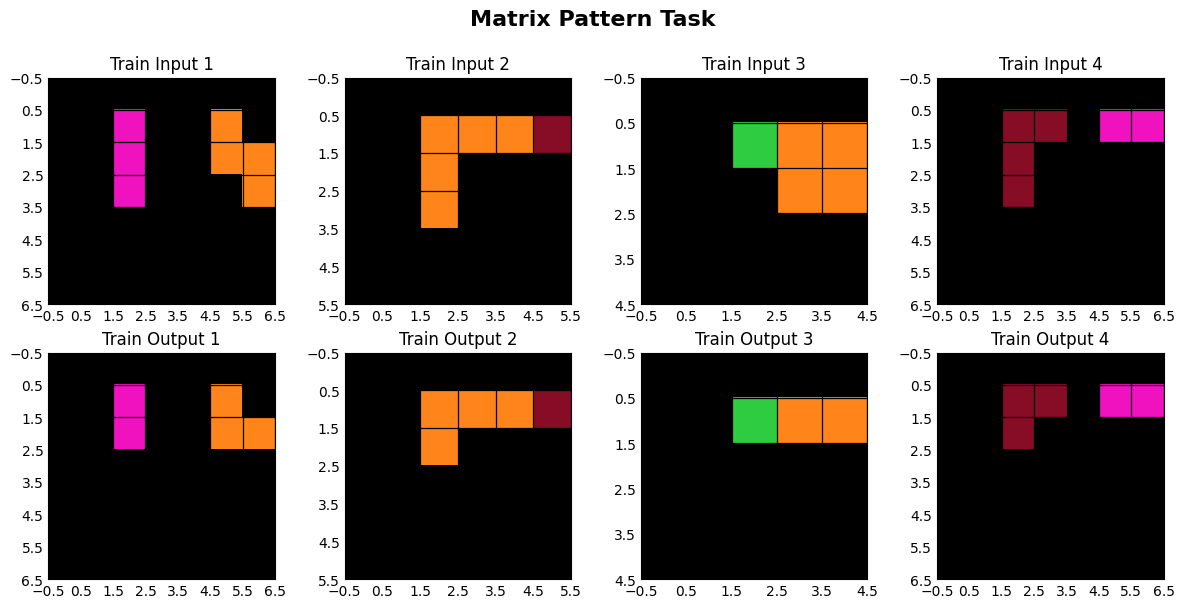

Visualizing Problem 6591


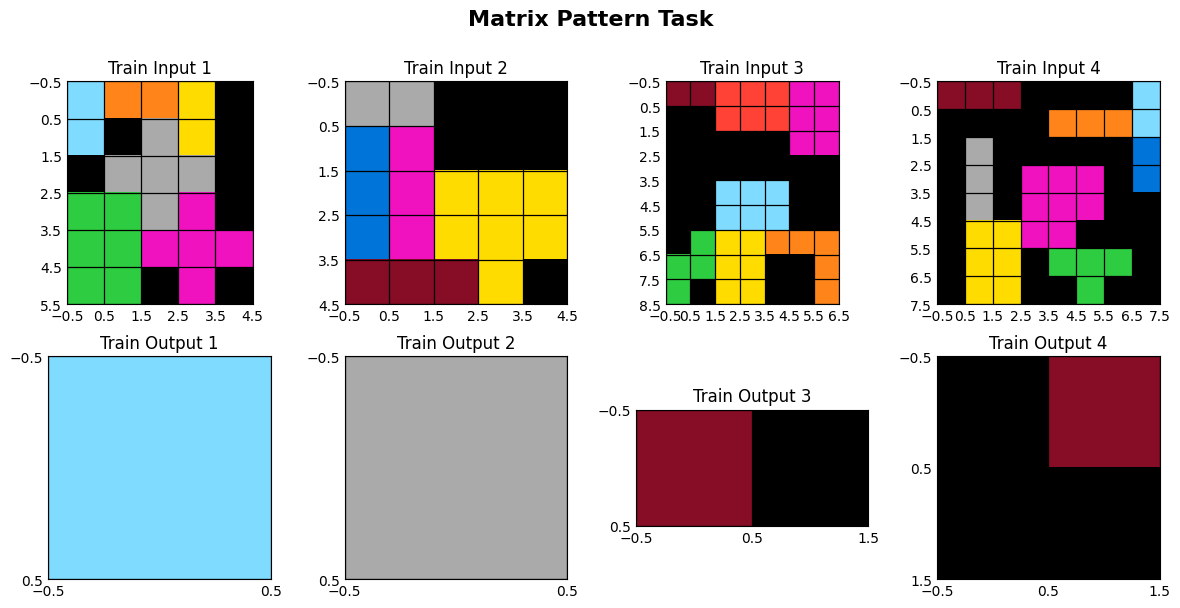

Visualizing Problem 7364


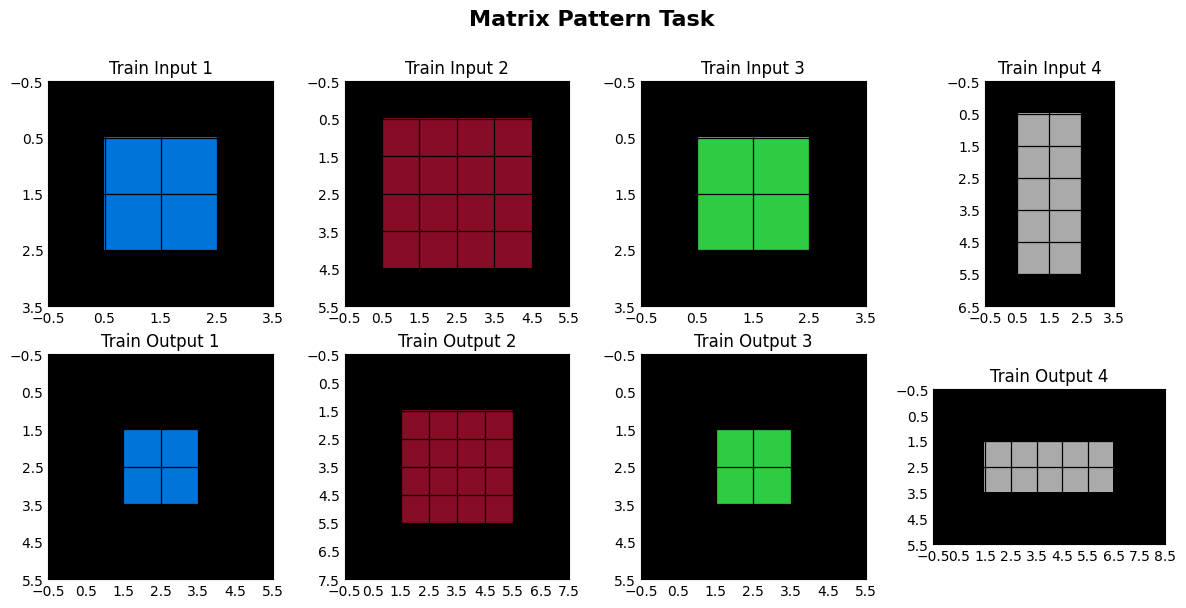

Visualizing Problem 7767


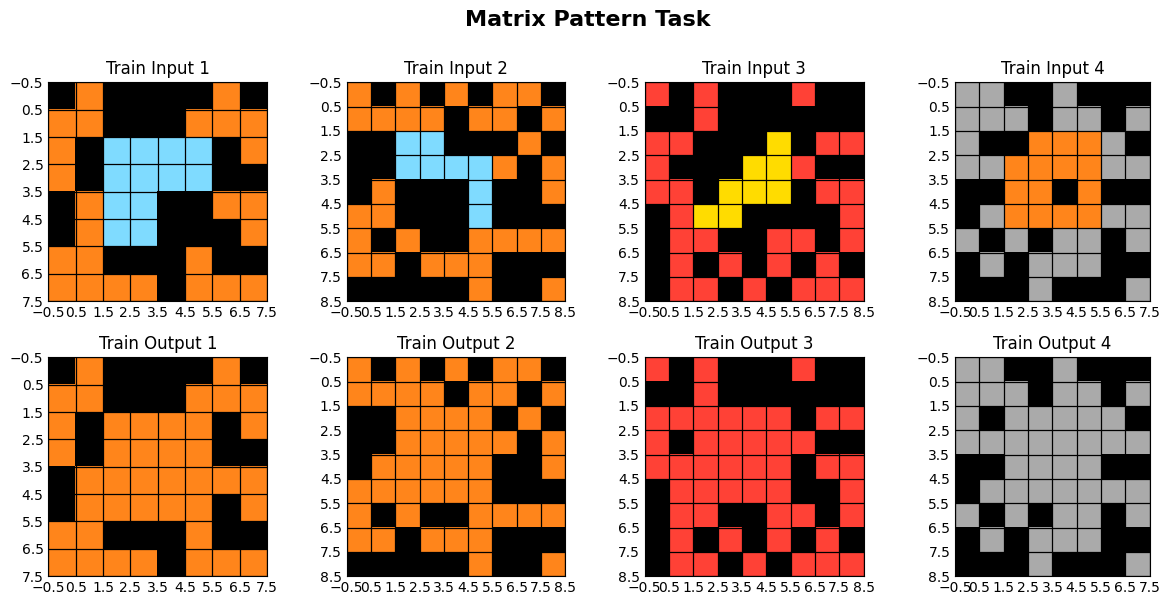

Visualizing Problem 9019


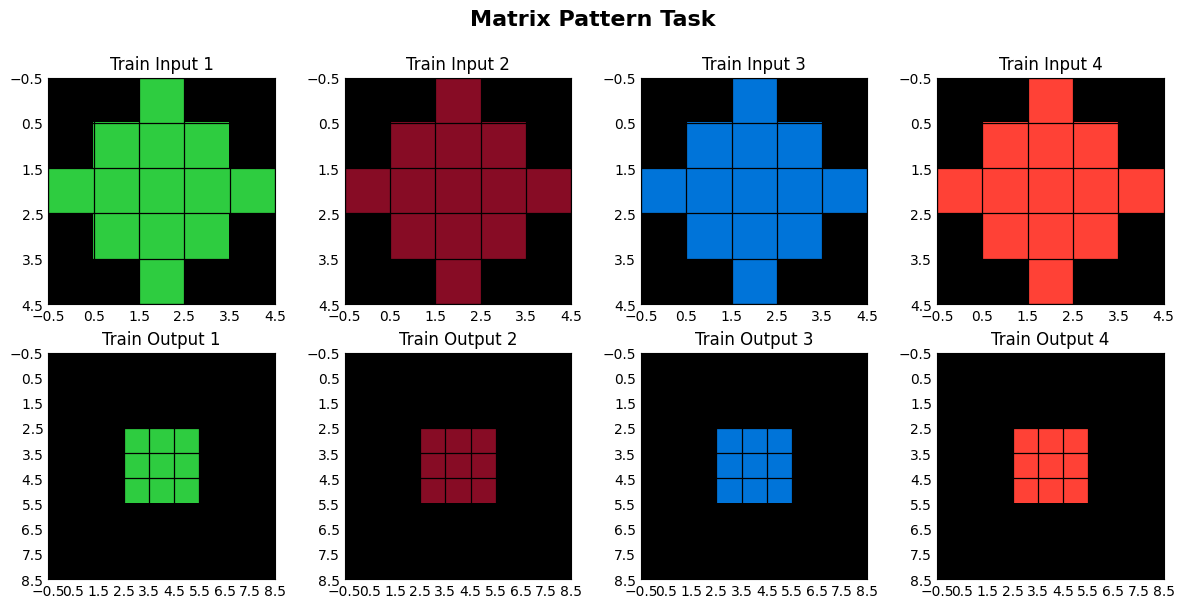

Visualizing Problem 9035


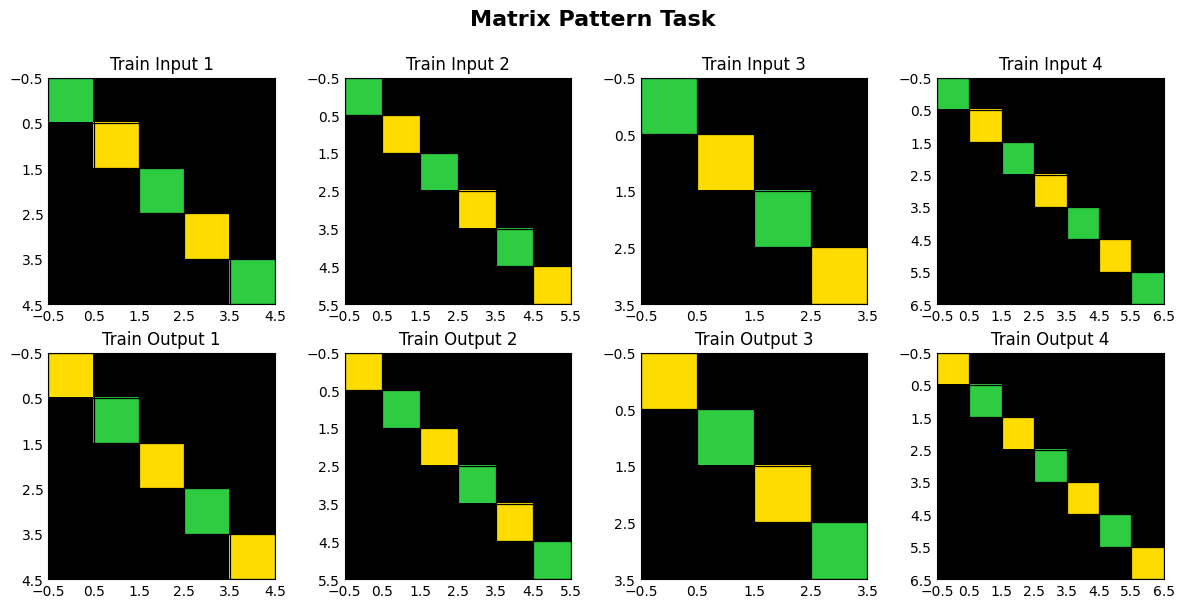

Visualizing Problem 9554


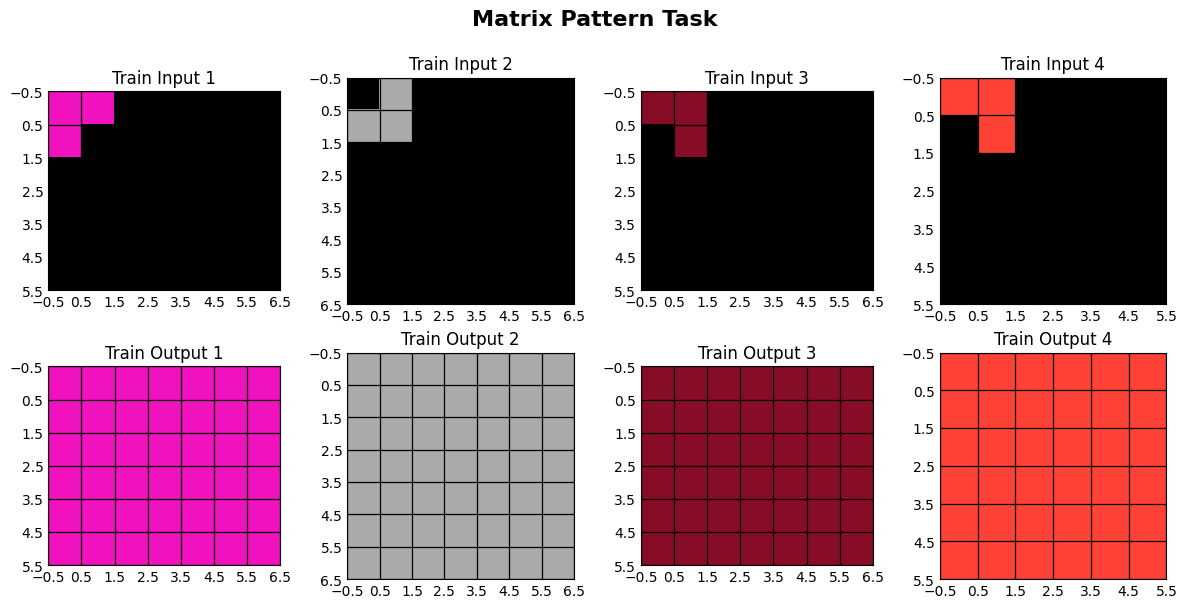

Visualizing Problem 9994


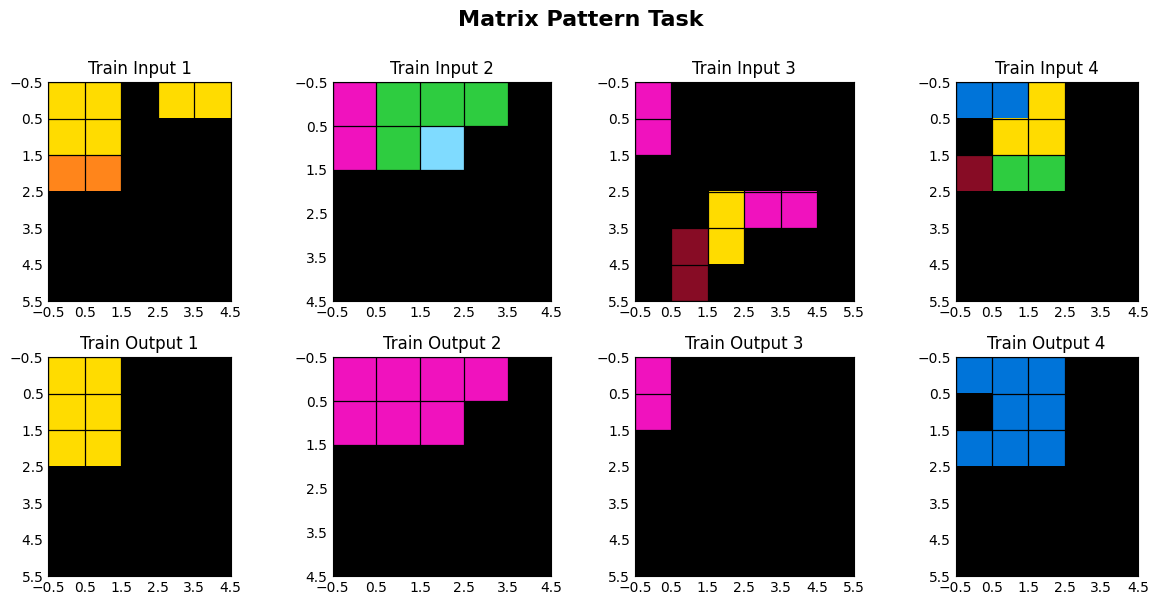

Visualizing Problem 10961


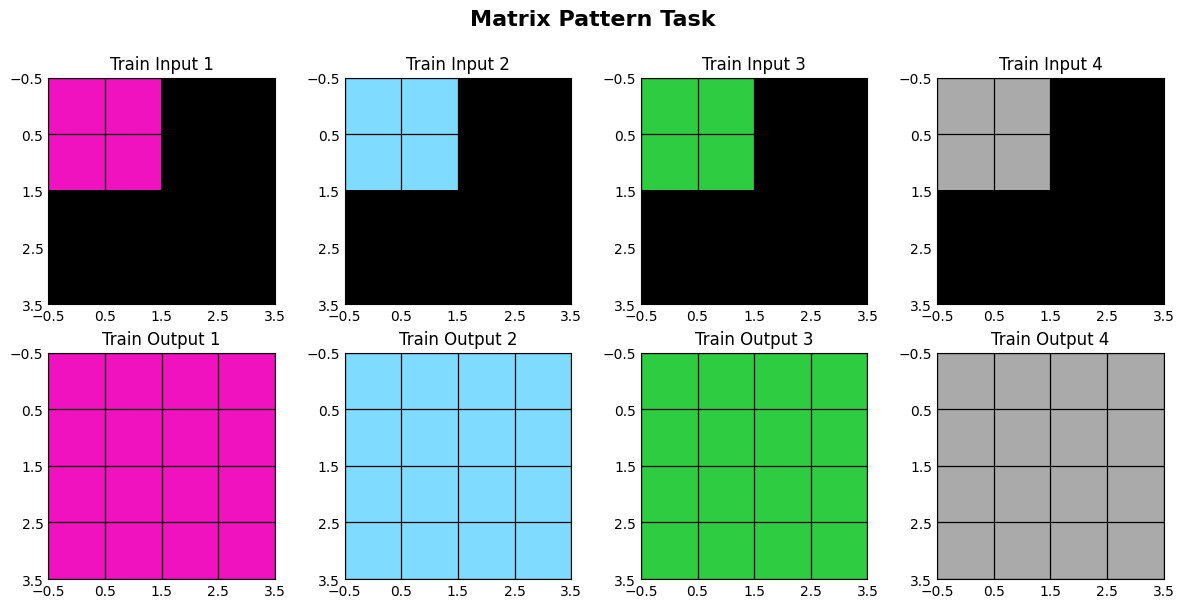

Visualizing Problem 11357


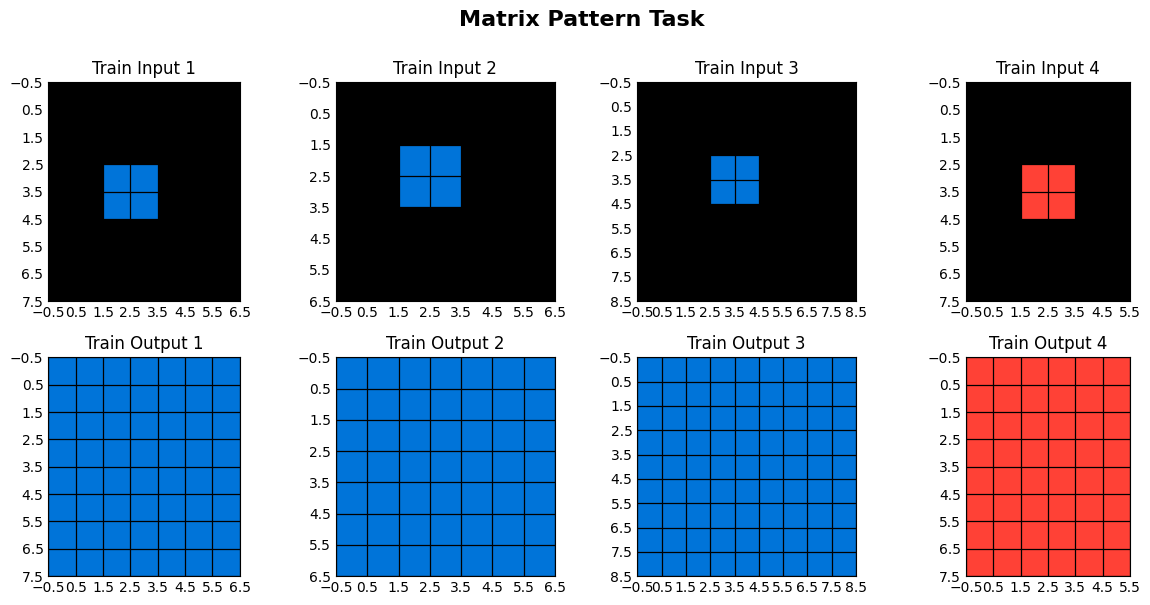

Visualizing Problem 11688


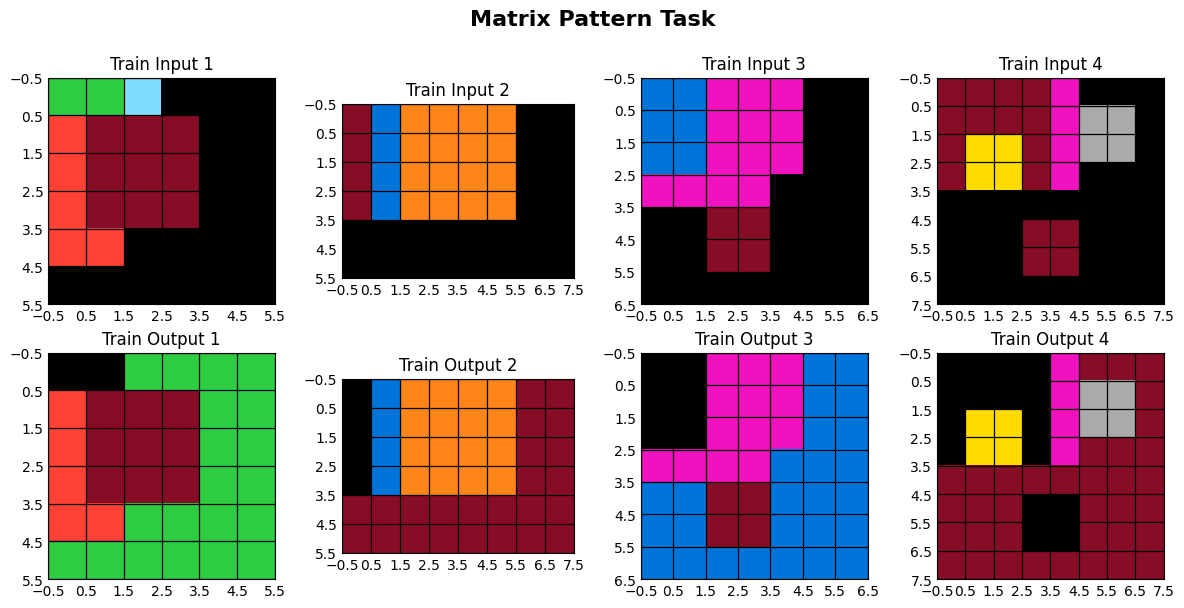

Visualizing Problem 12083


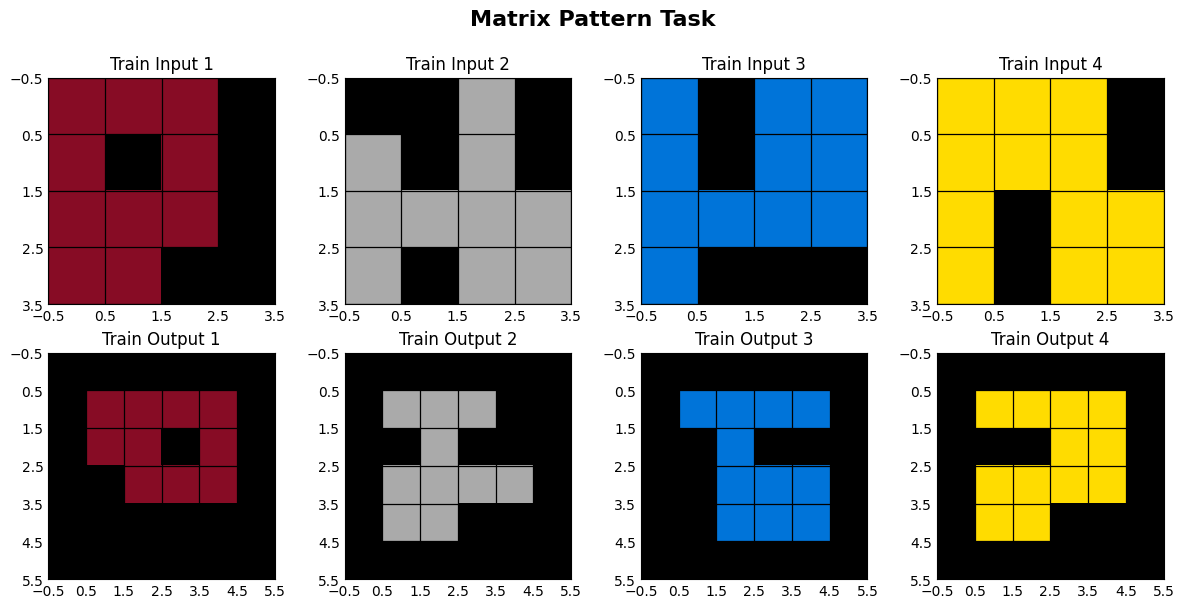

Visualizing Problem 12562


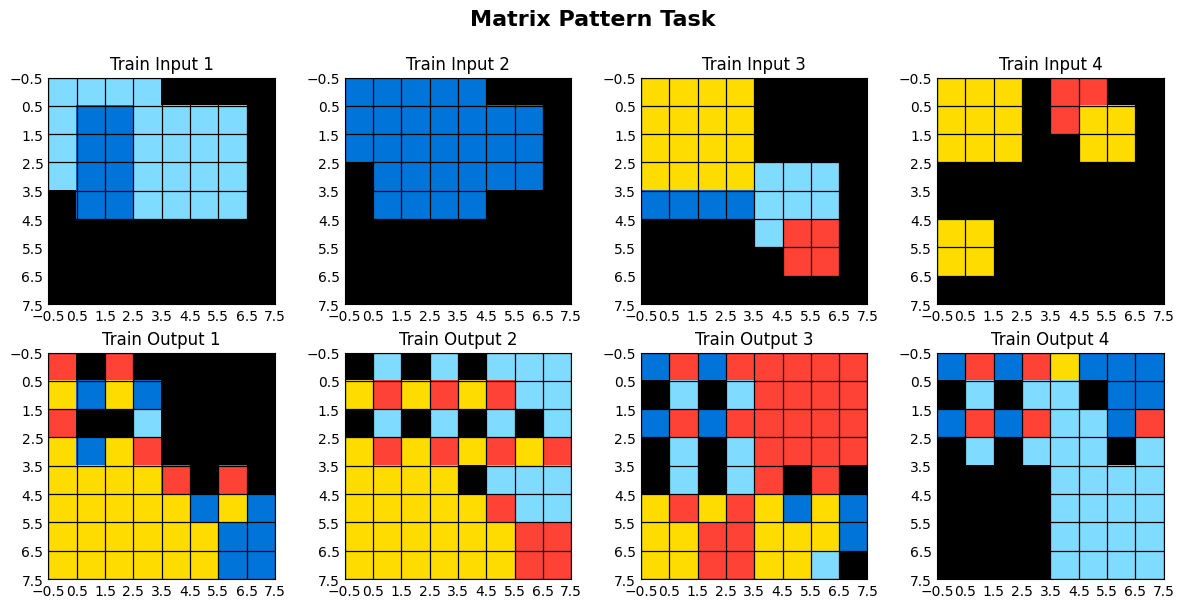

Visualizing Problem 13010


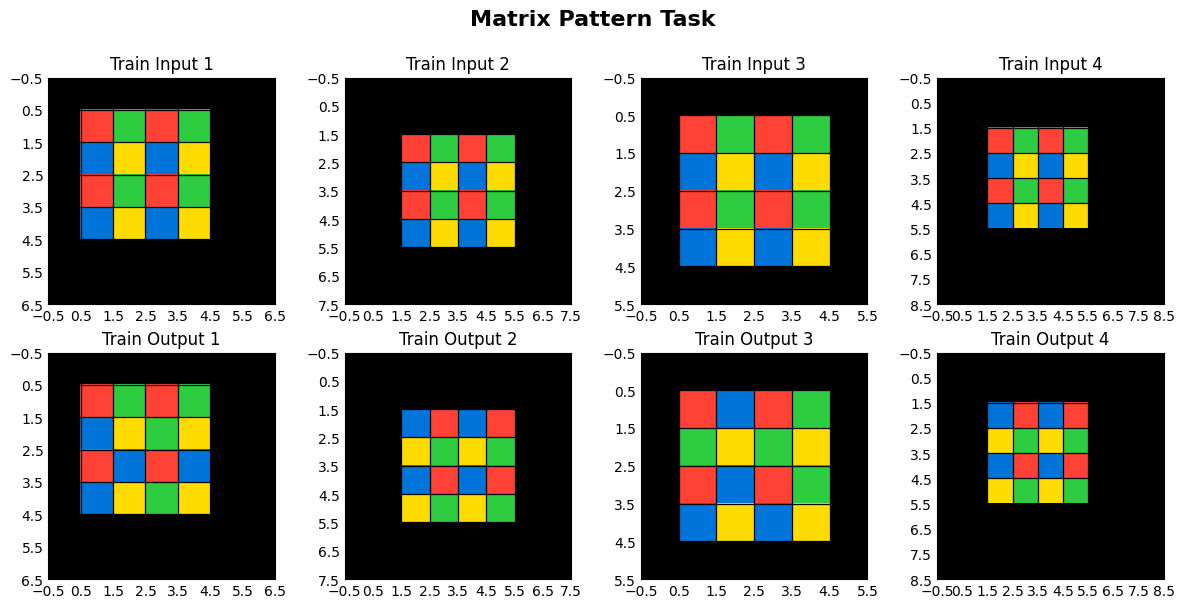

Visualizing Problem 13296


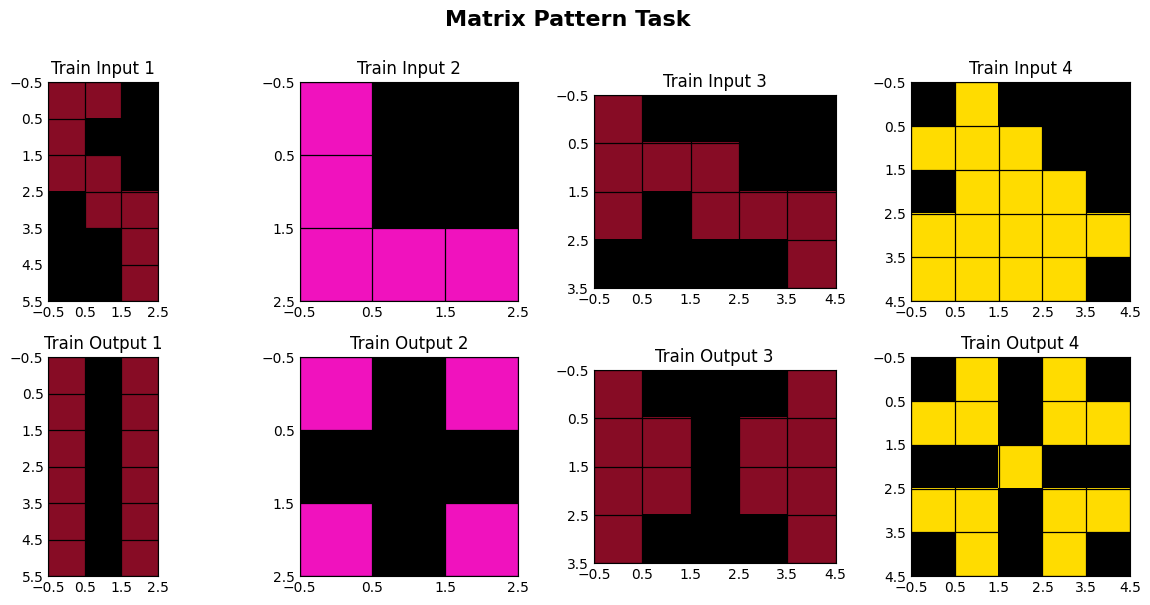

Visualizing Problem 13811


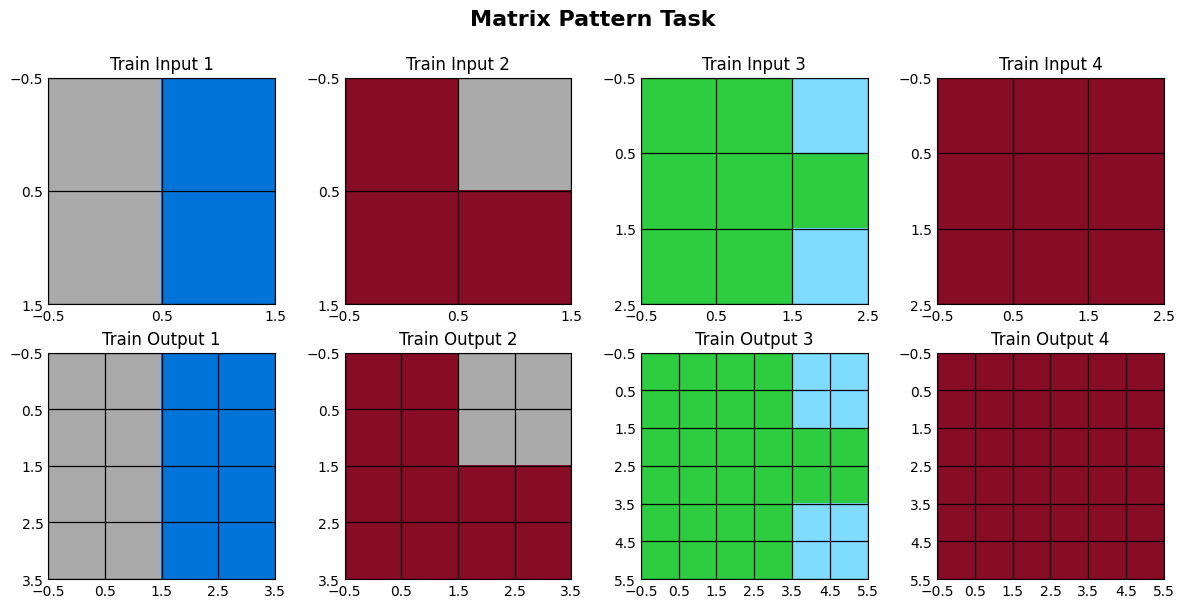

Visualizing Problem 13966


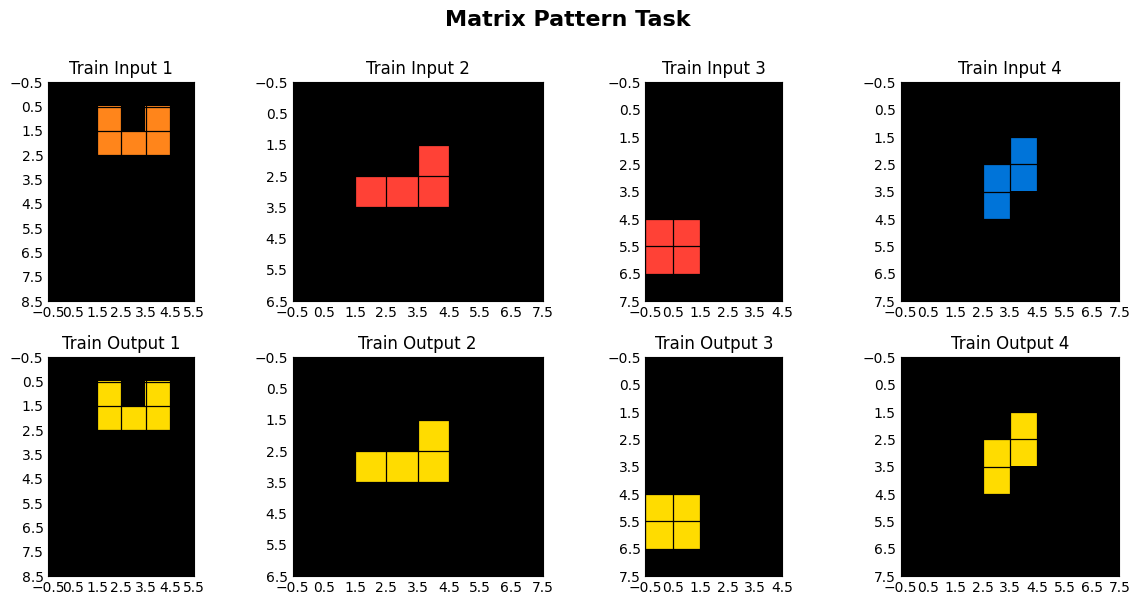

Visualizing Problem 14136


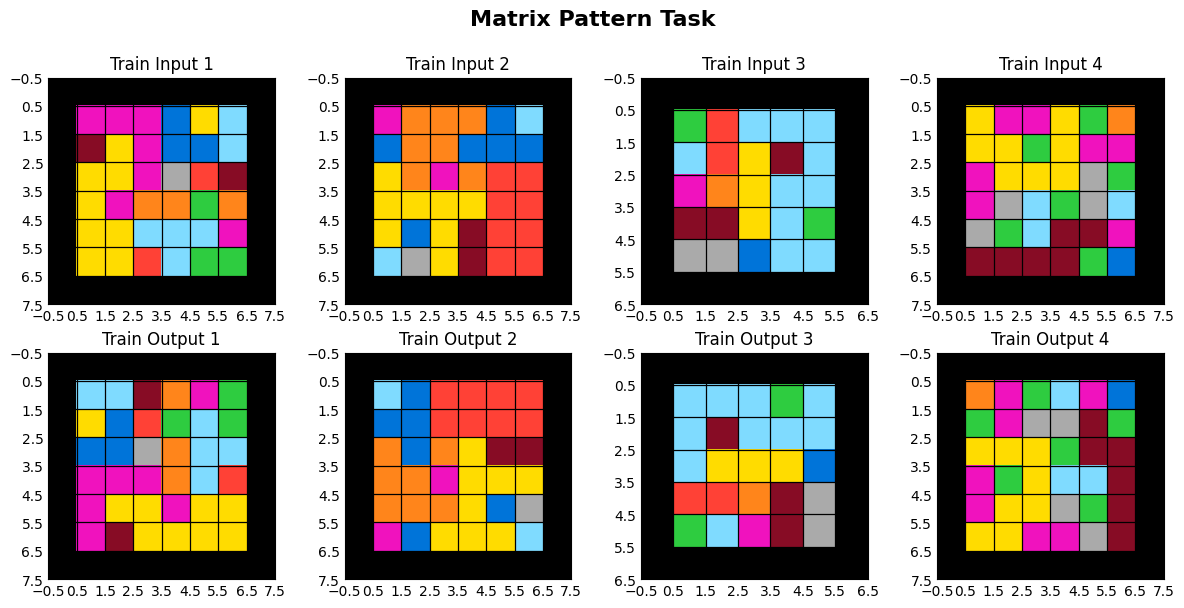

Visualizing Problem 14265


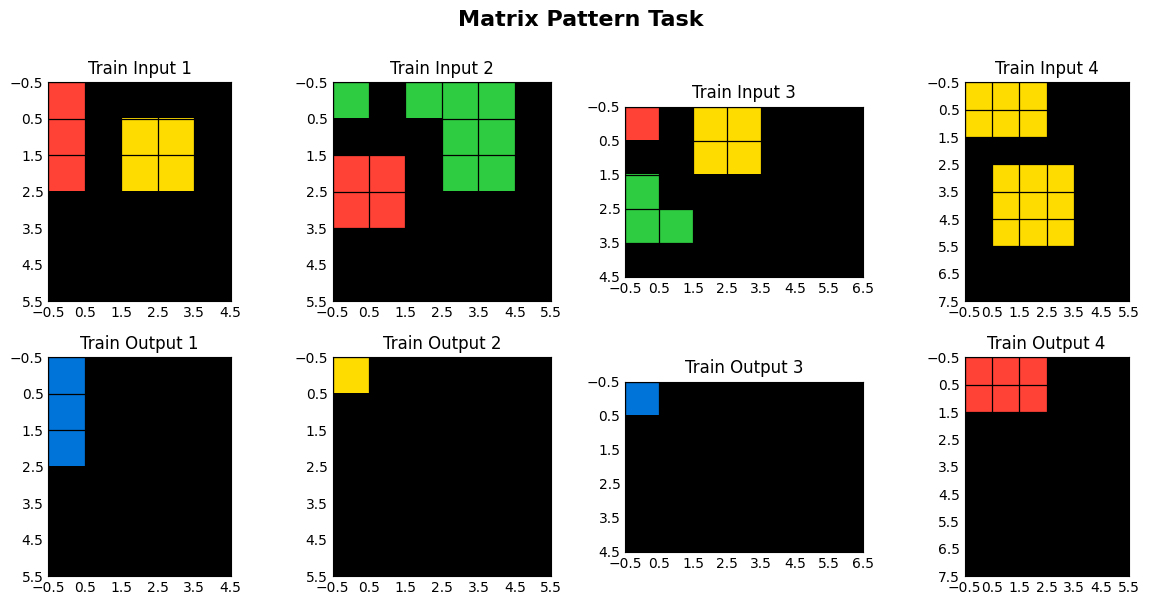

Visualizing Problem 15208


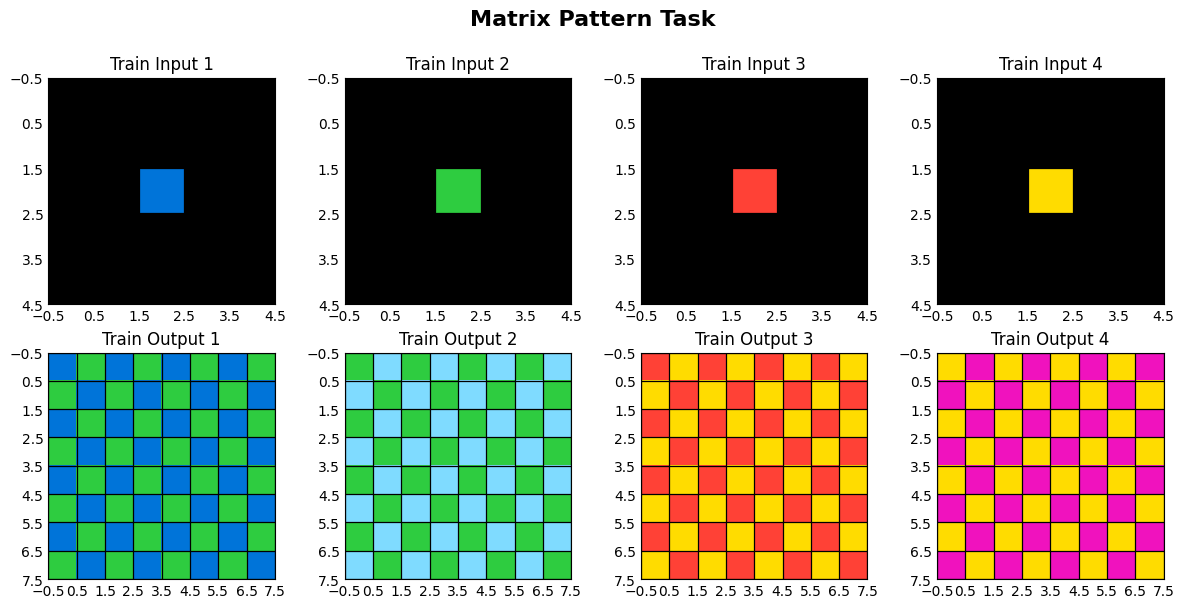

Visualizing Problem 15498


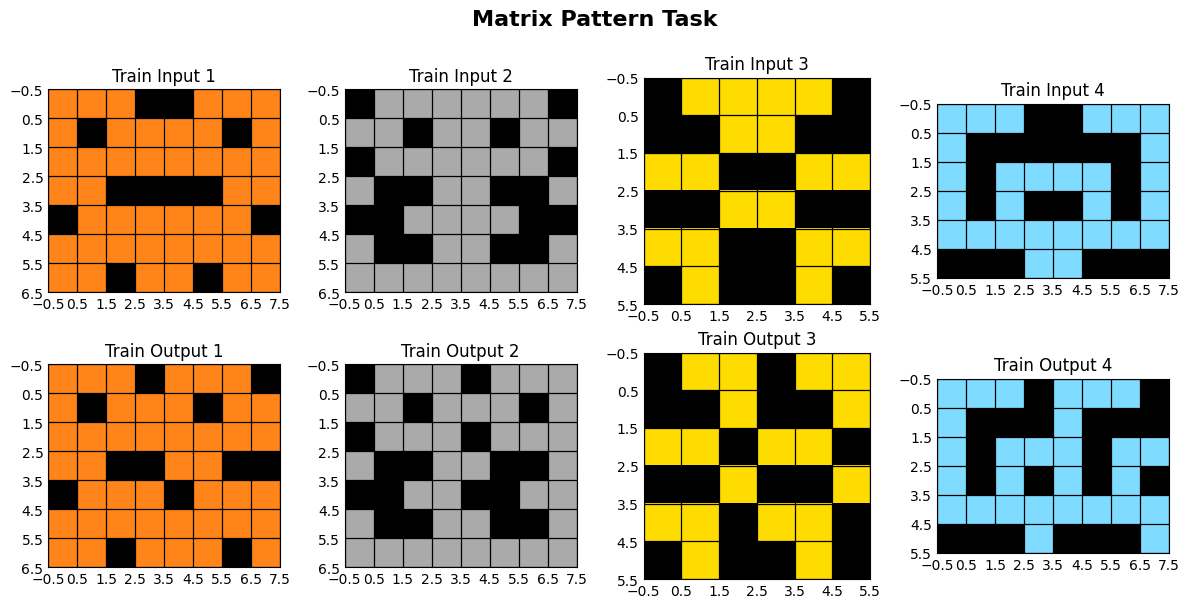

Visualizing Problem 16409


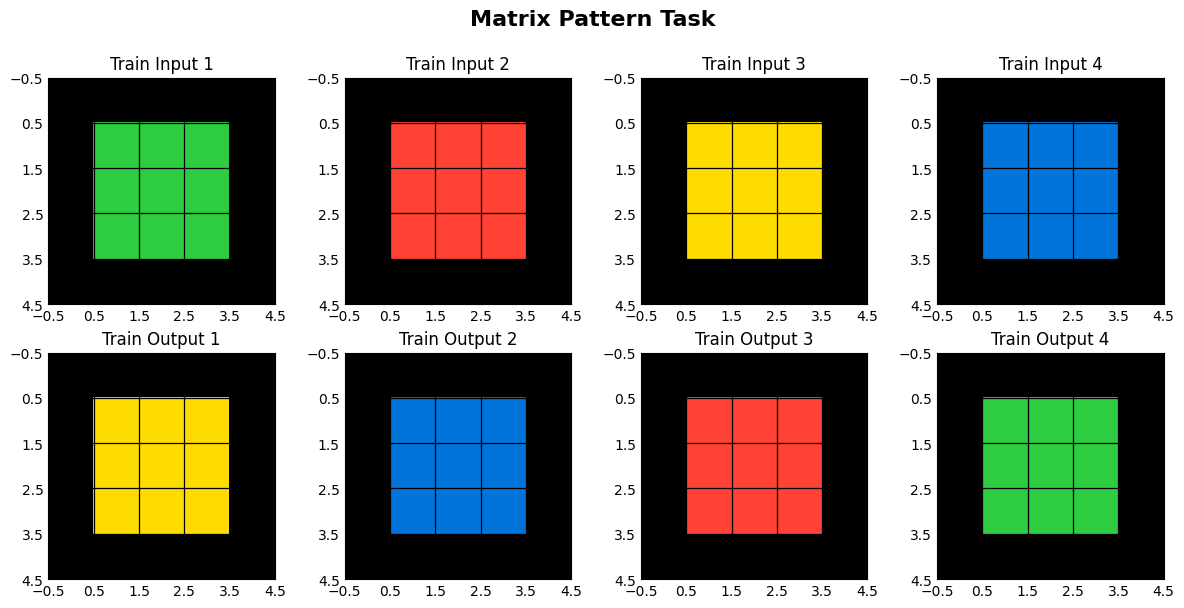

Visualizing Problem 17355


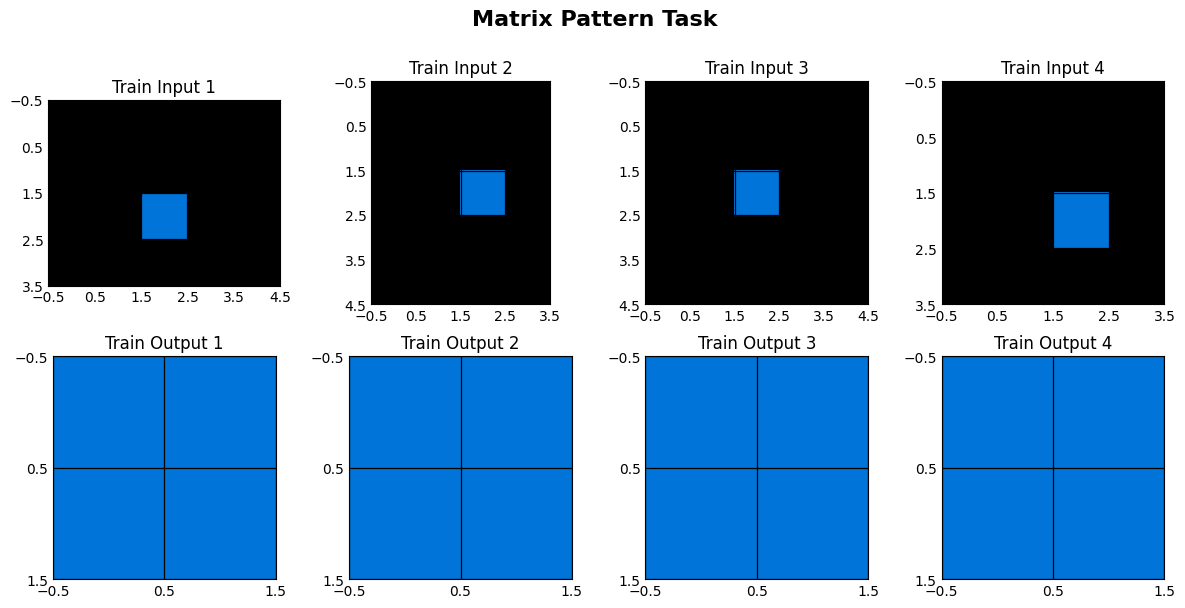

Visualizing Problem 17709


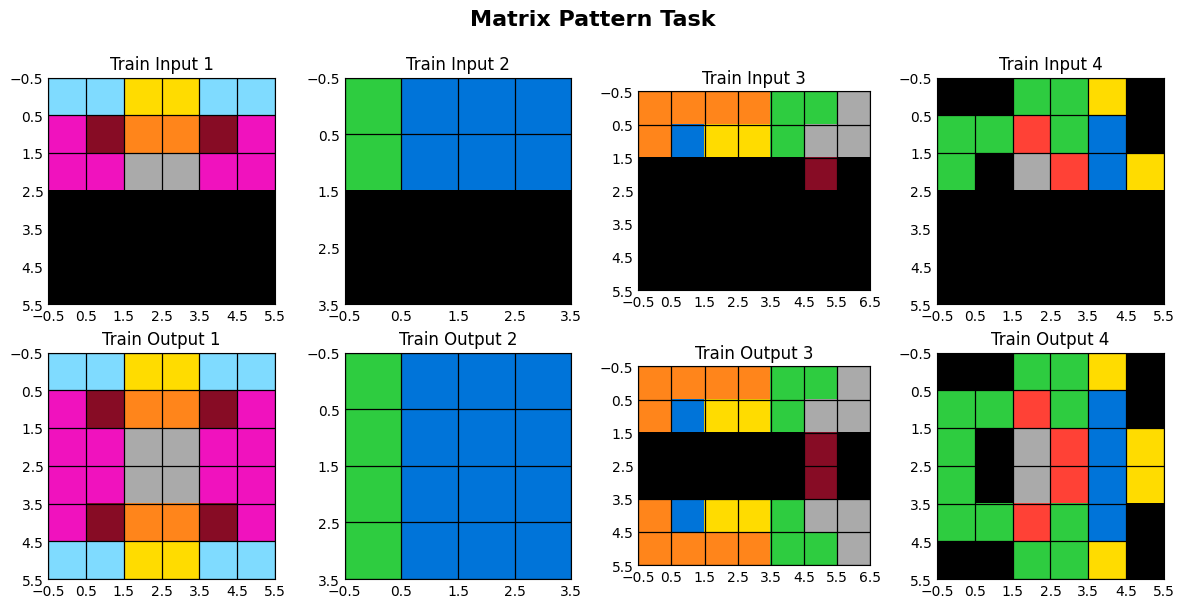

Visualizing Problem 18773


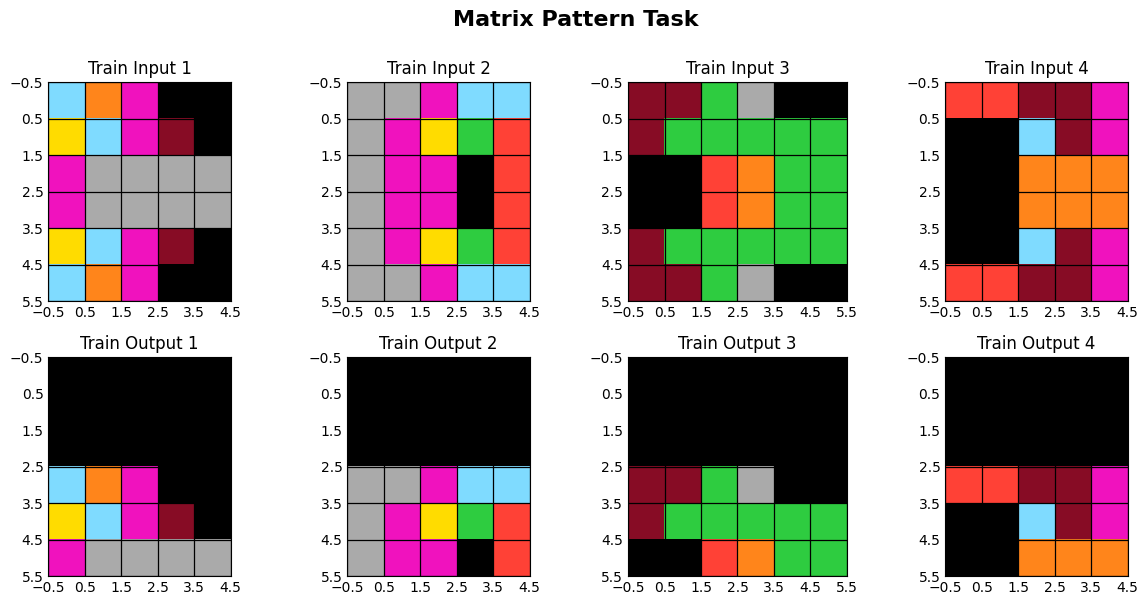

Visualizing Problem 19372


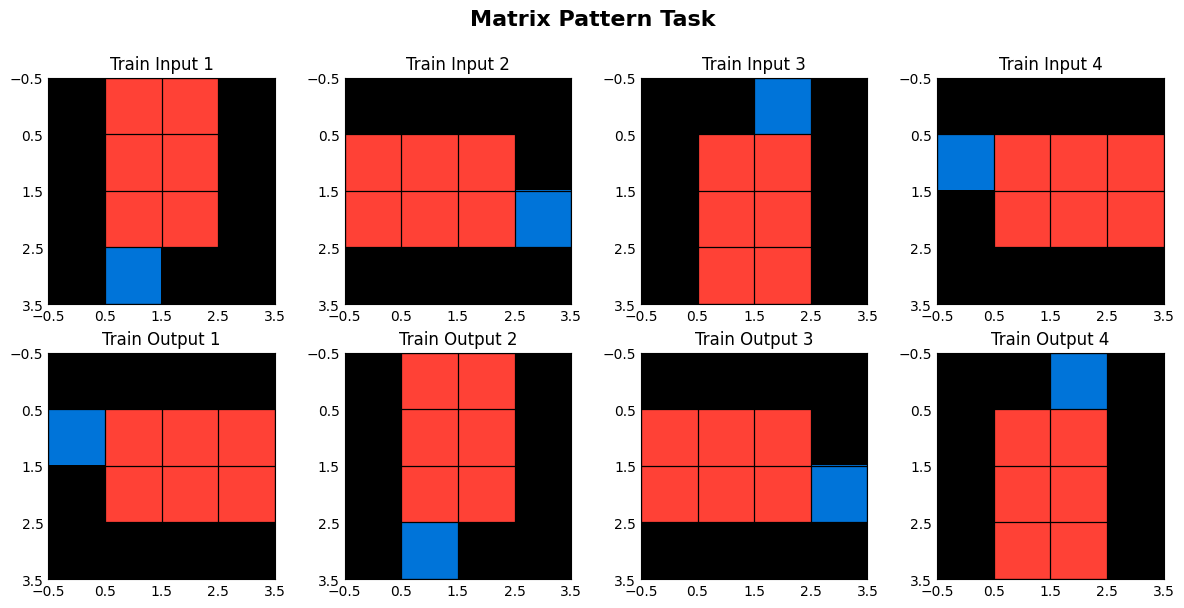

Visualizing Problem 19869


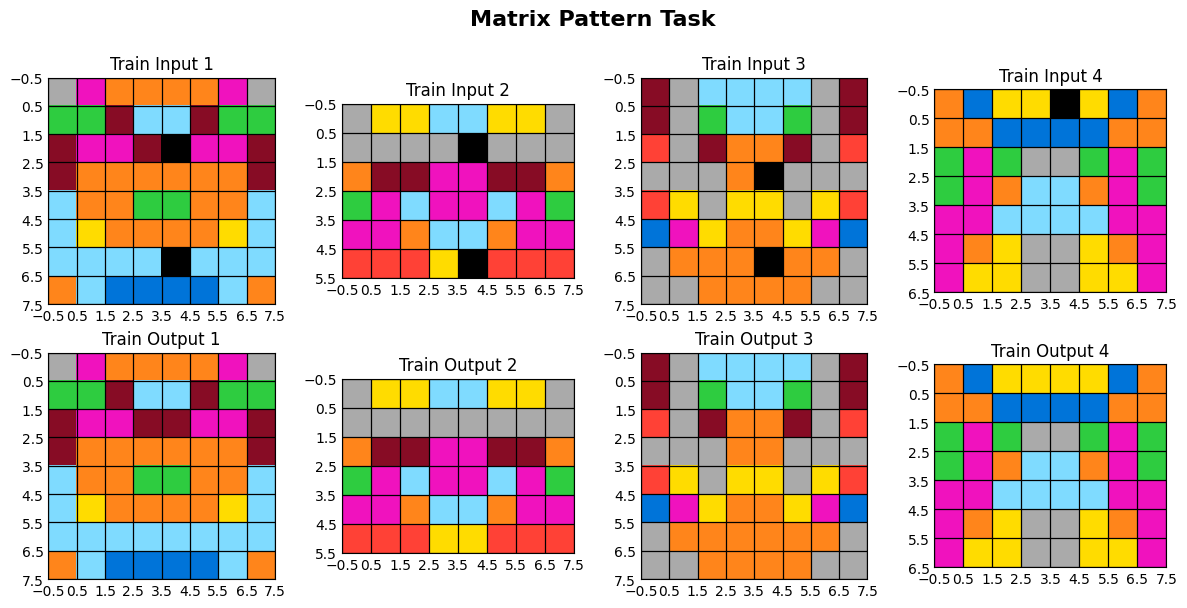

Visualizing Problem 20004


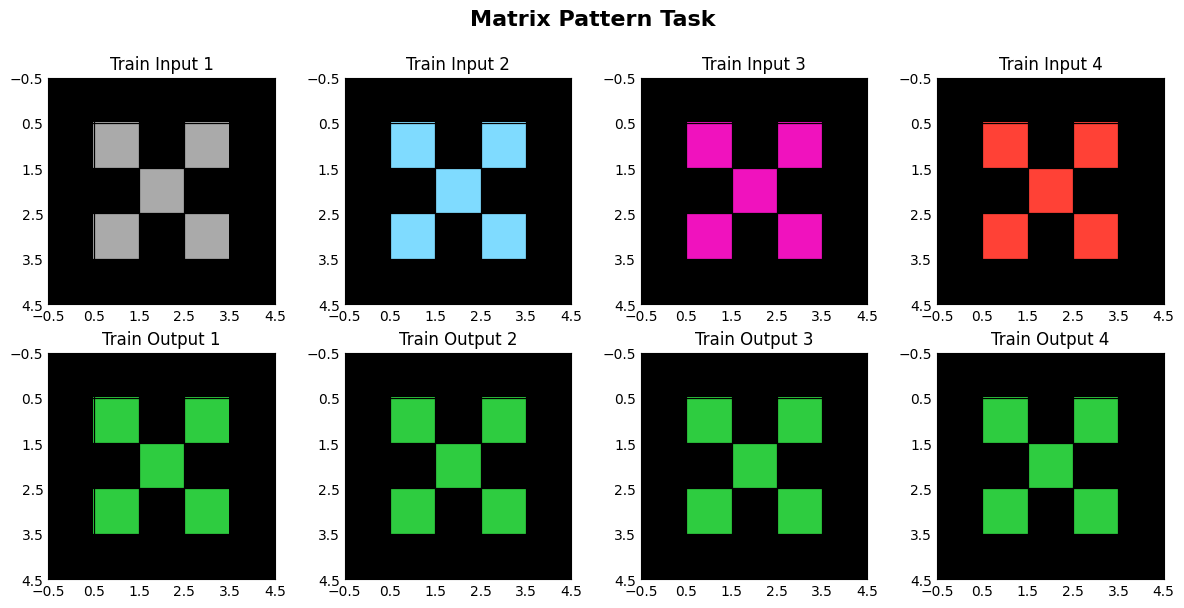

Visualizing Problem 20126


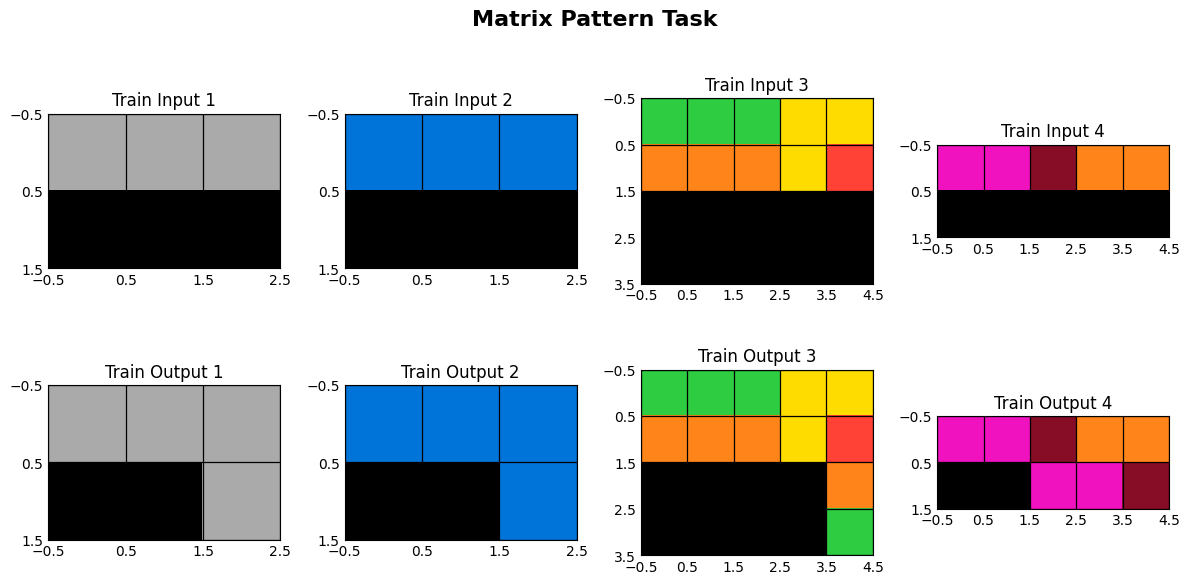

Visualizing Problem 20571


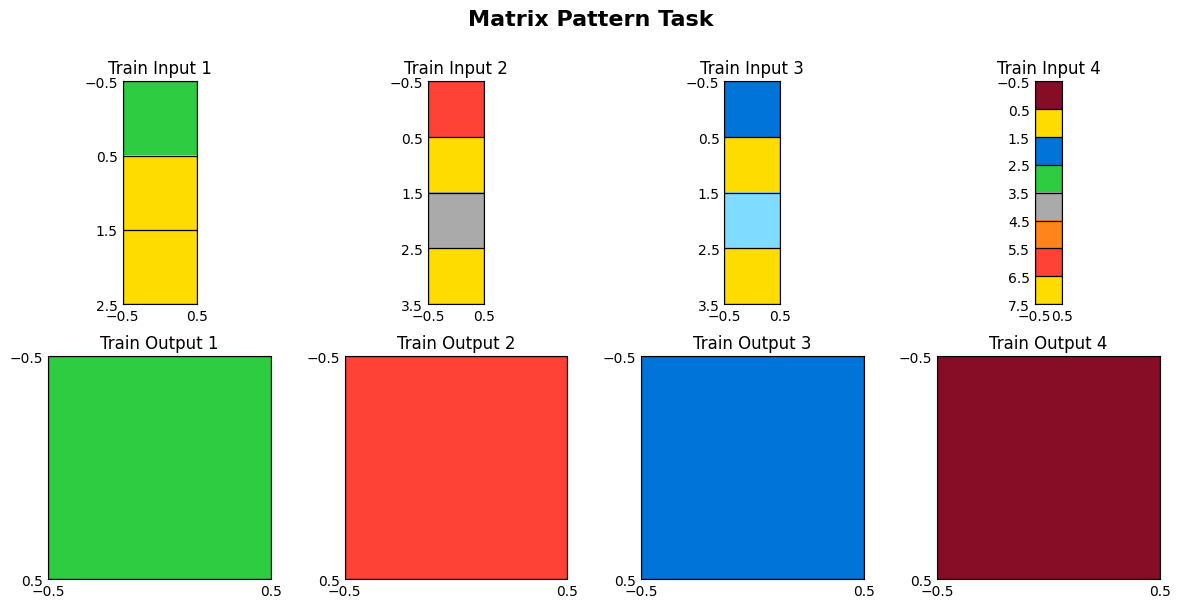

Visualizing Problem 20652


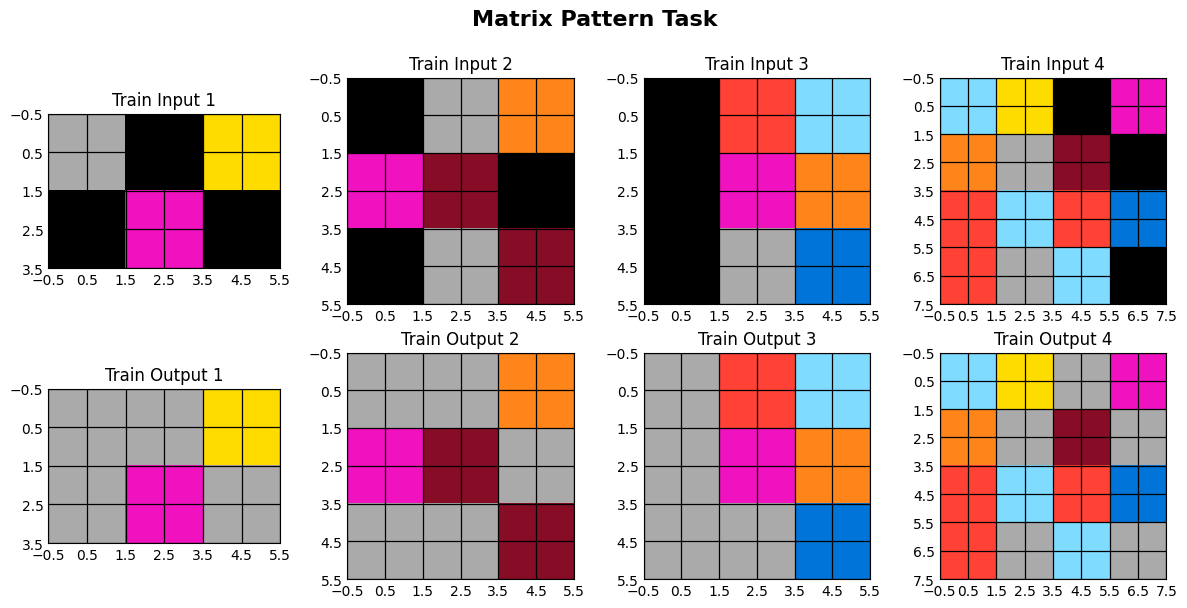

Visualizing Problem 20931


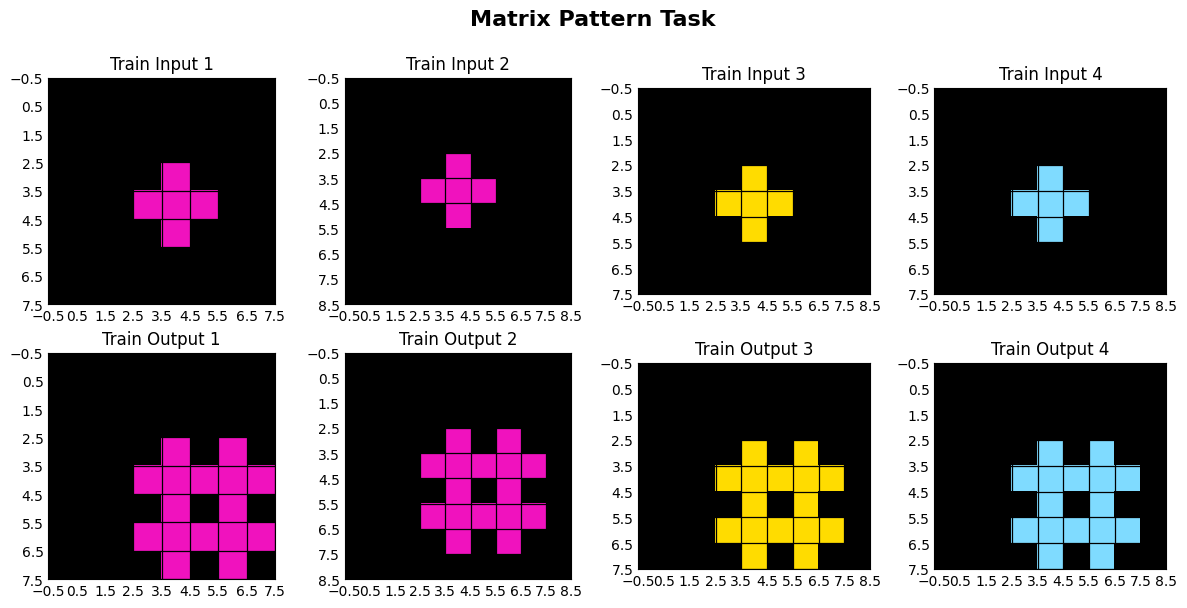

Visualizing Problem 21333


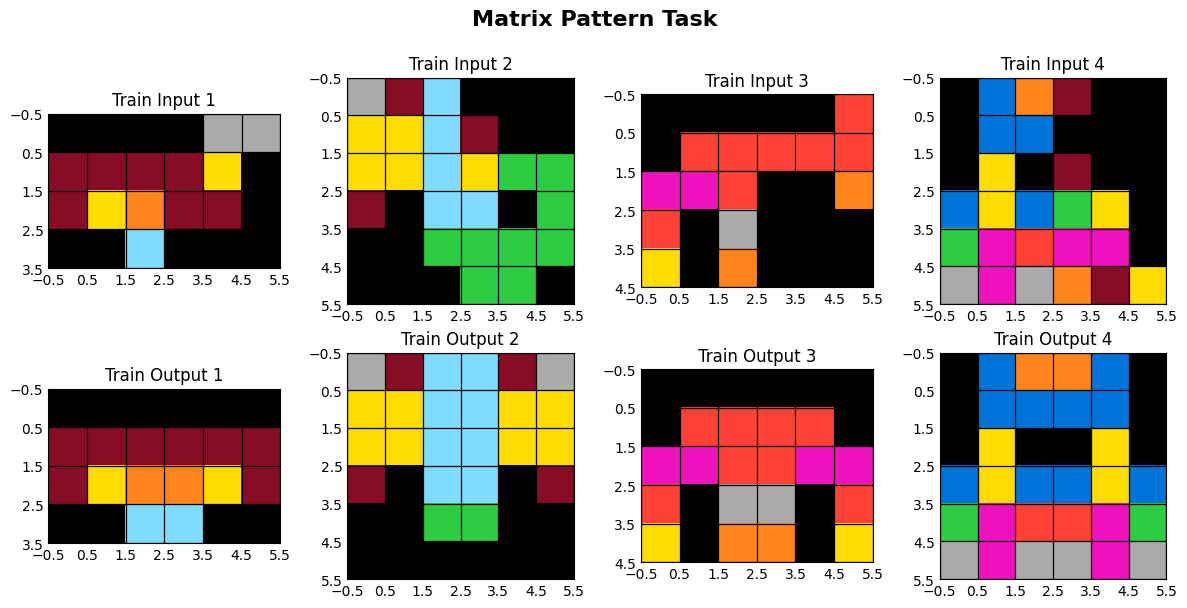

Visualizing Problem 22292


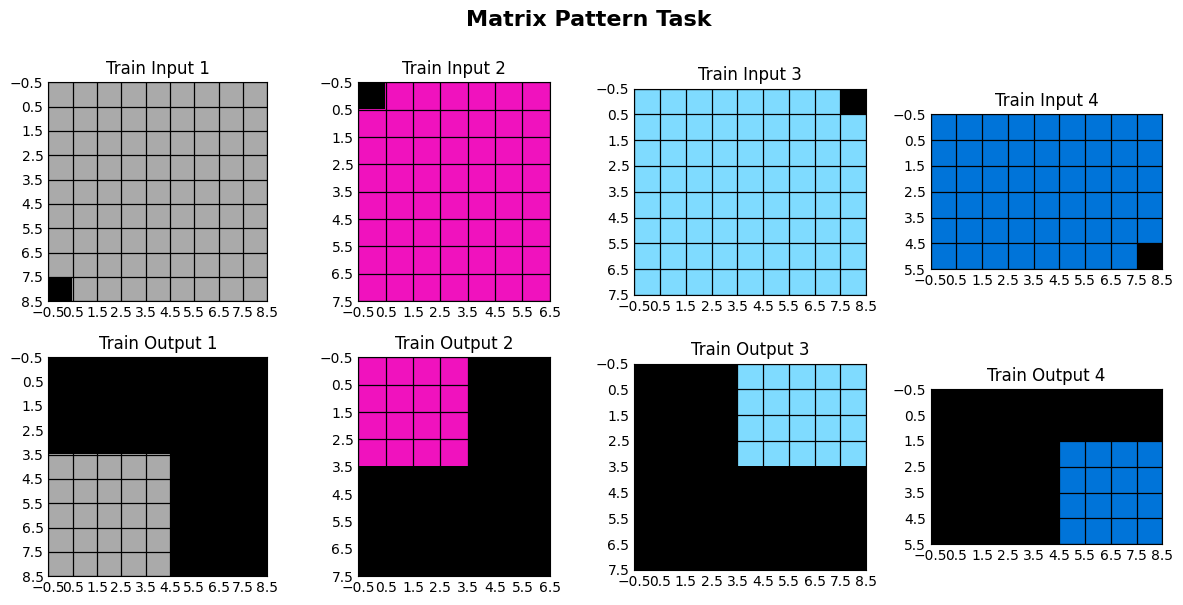

Visualizing Problem 22368


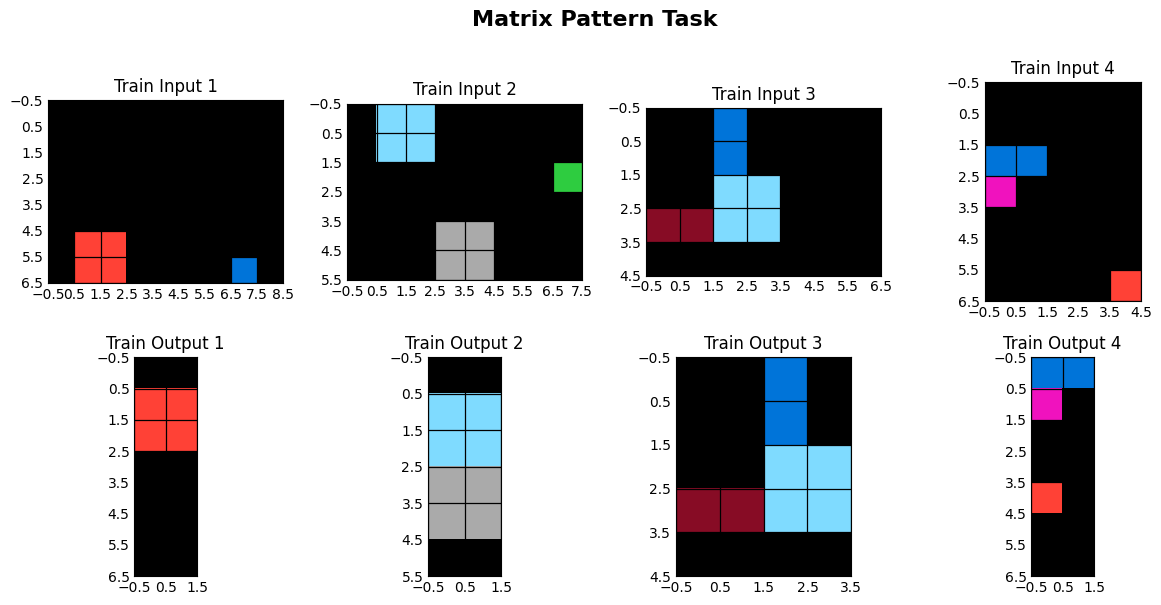

Visualizing Problem 22874


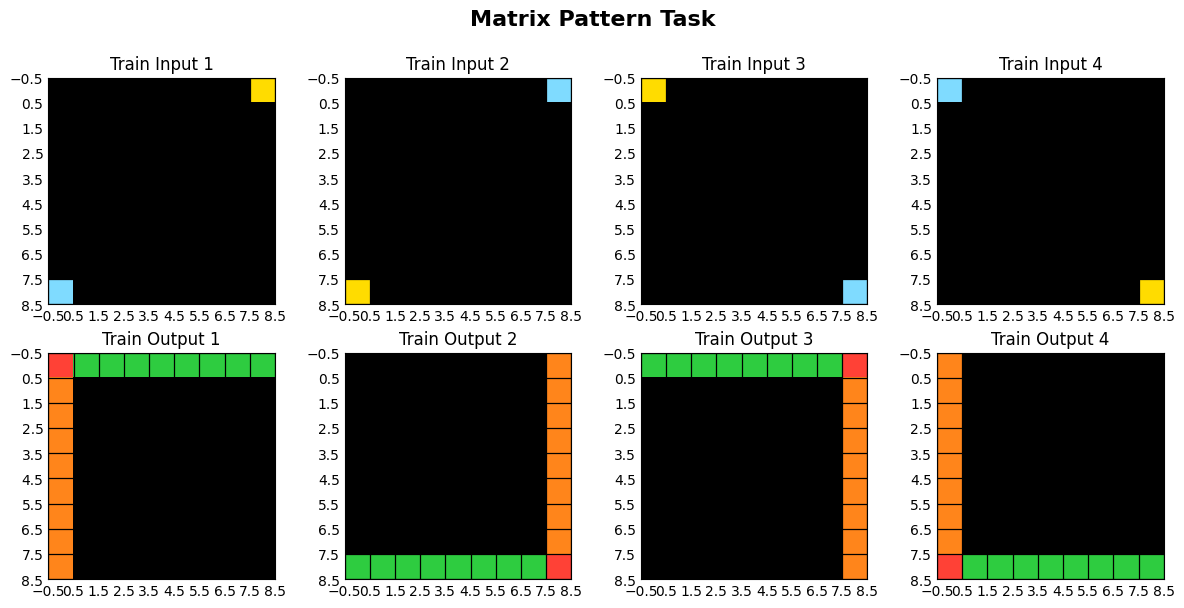

Visualizing Problem 23136


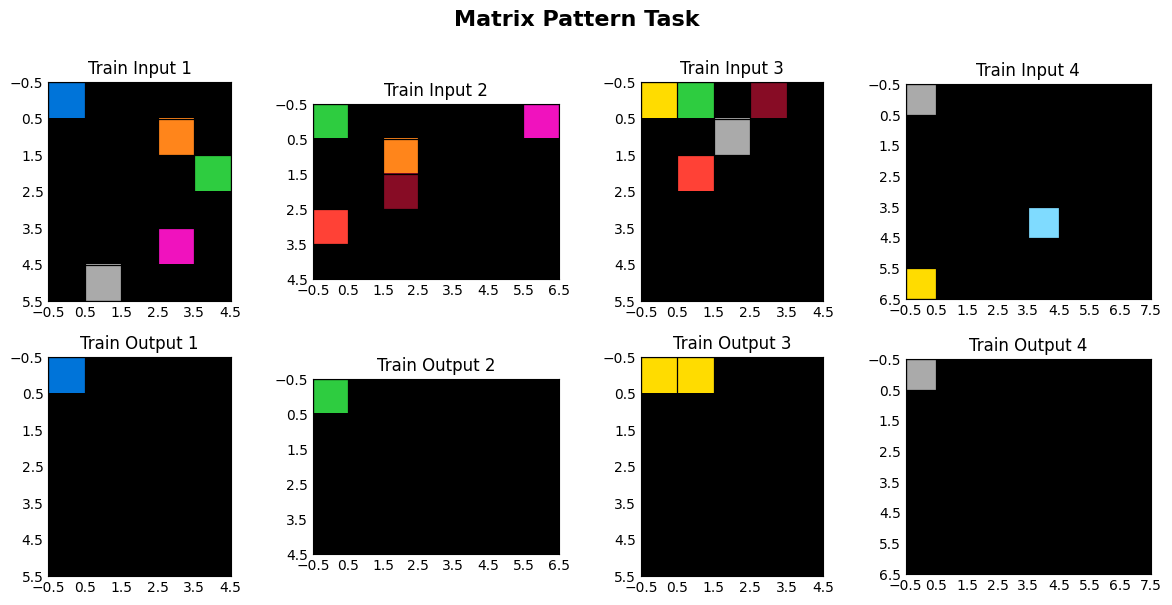

Visualizing Problem 24203


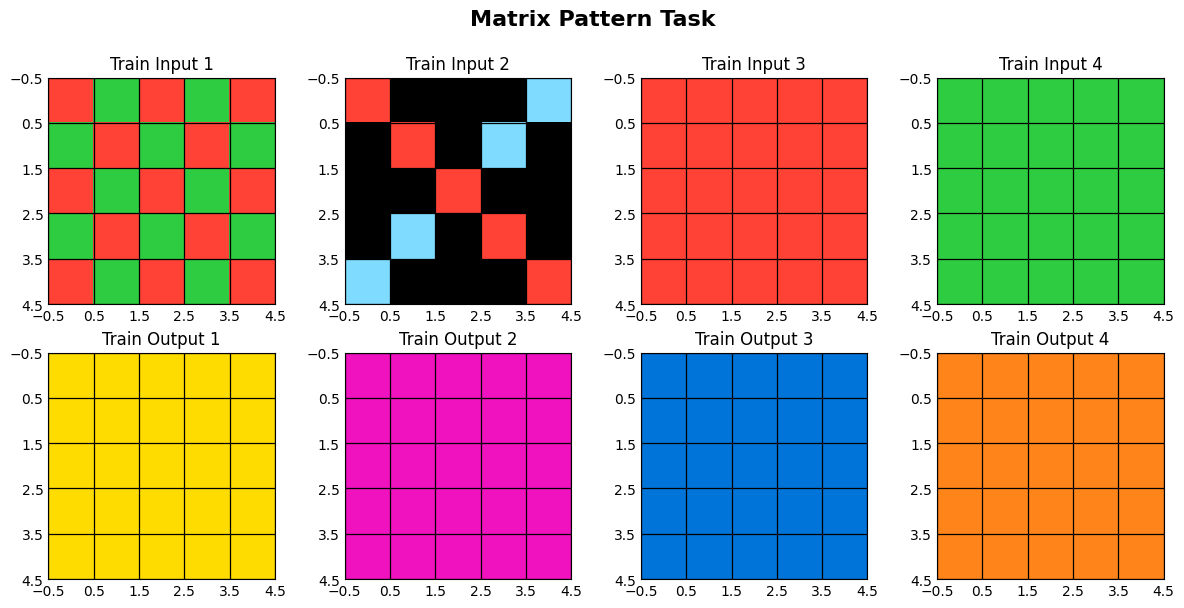

Visualizing Problem 25278


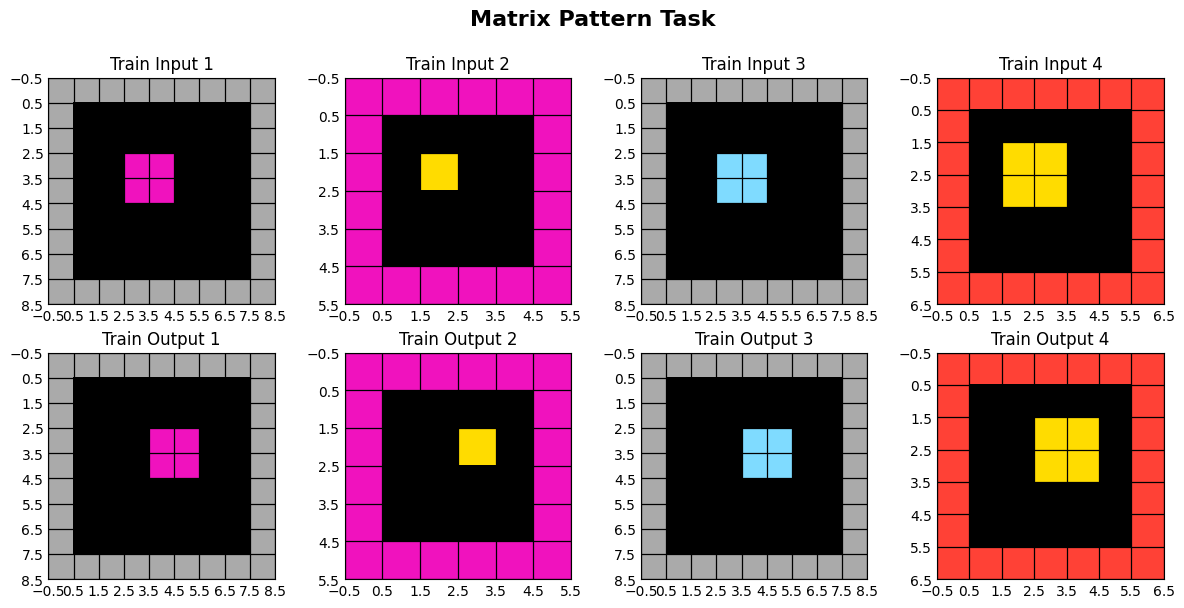

Visualizing Problem 25294


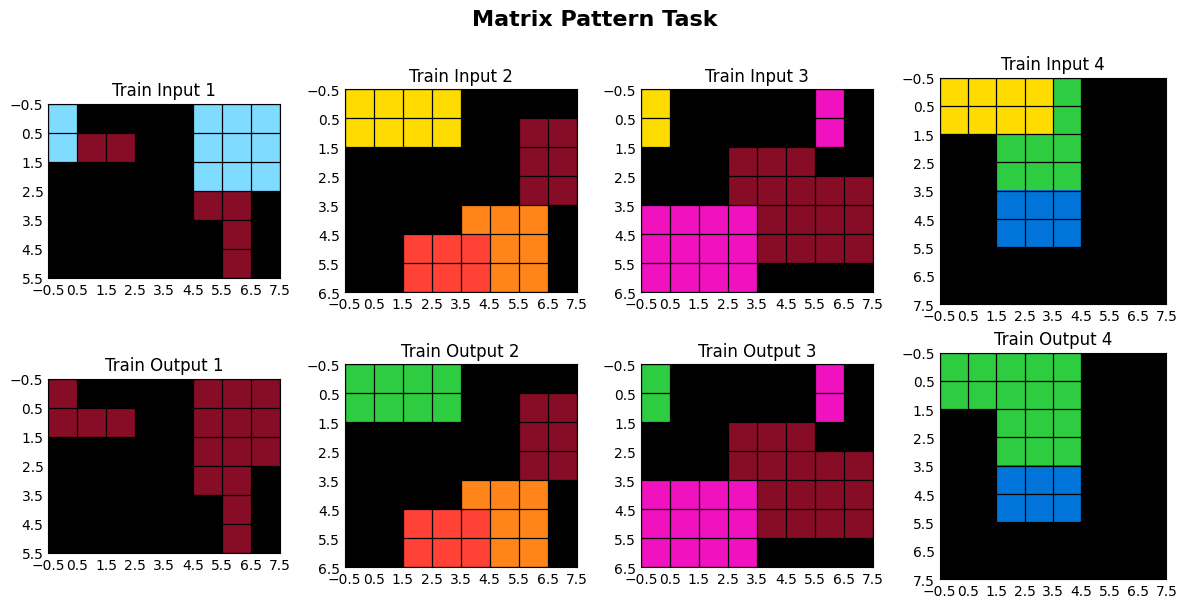

Visualizing Problem 25327


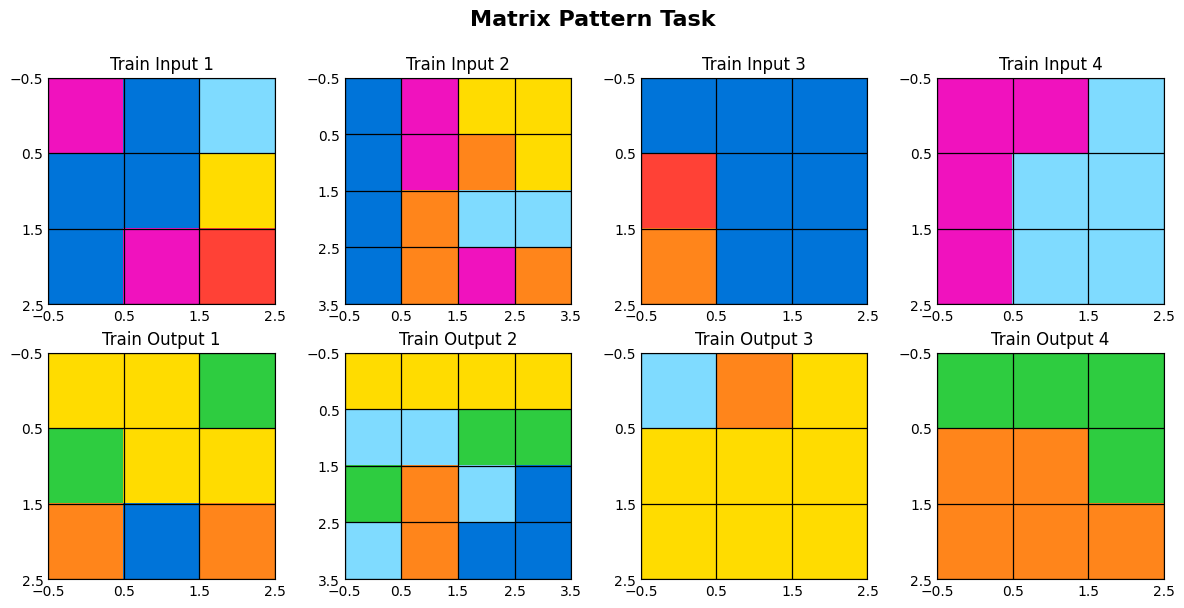

Visualizing Problem 25534


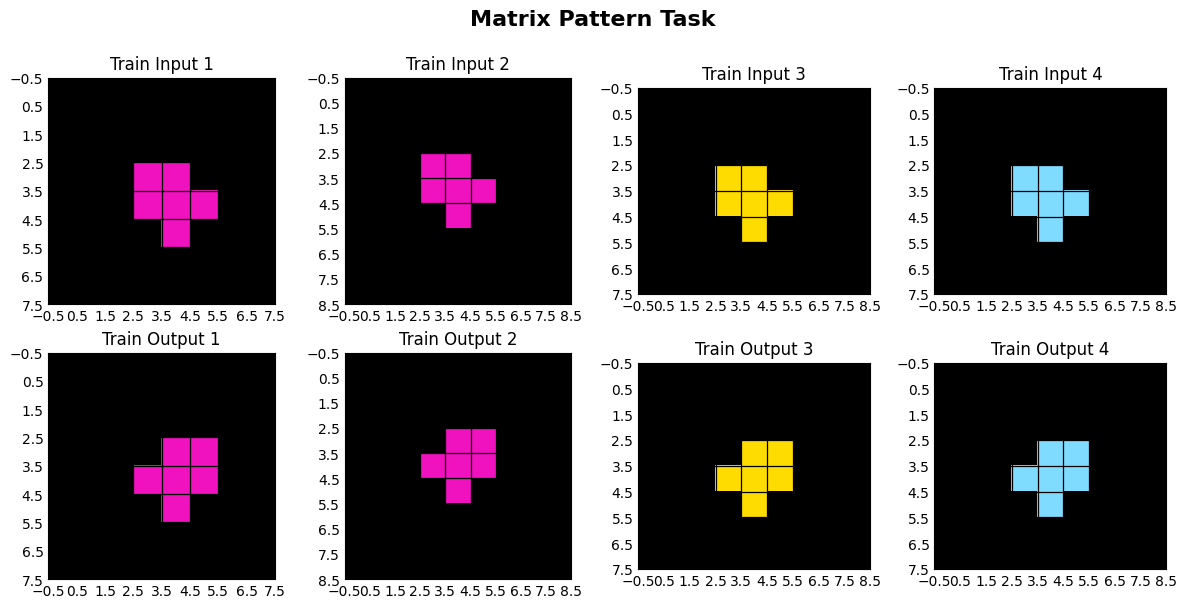

Visualizing Problem 26795


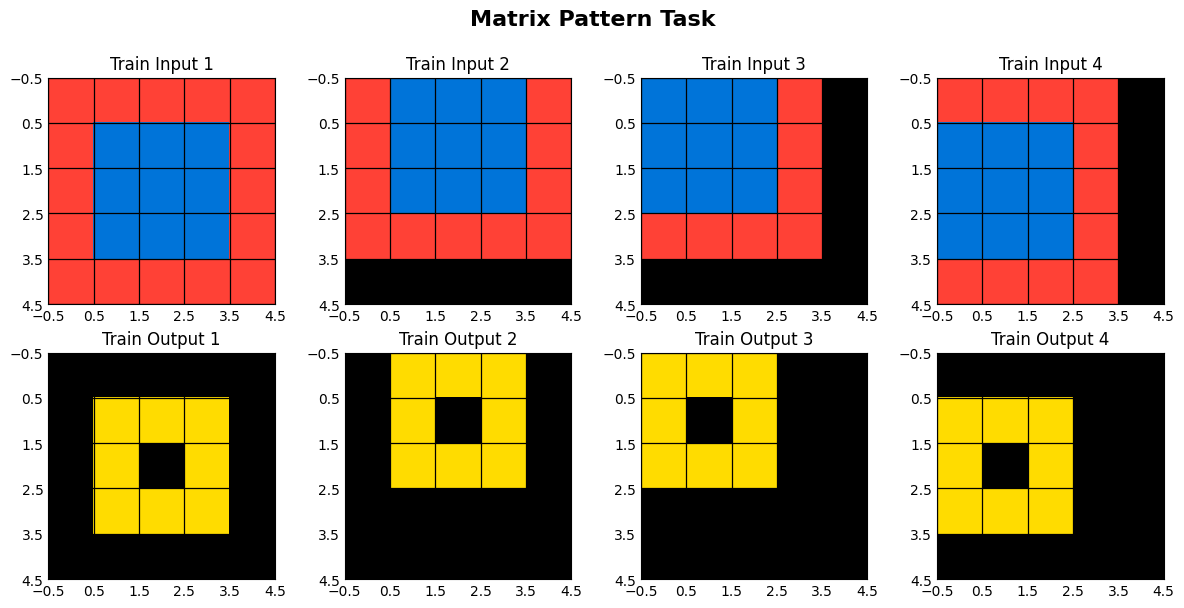

Visualizing Problem 26830


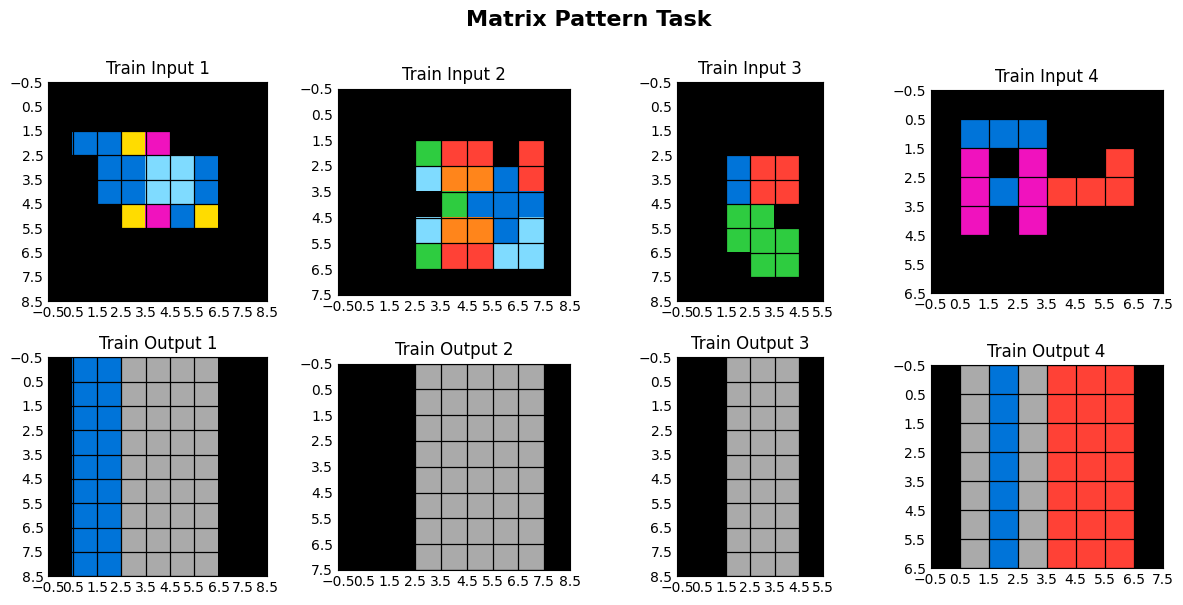

Visualizing Problem 28920


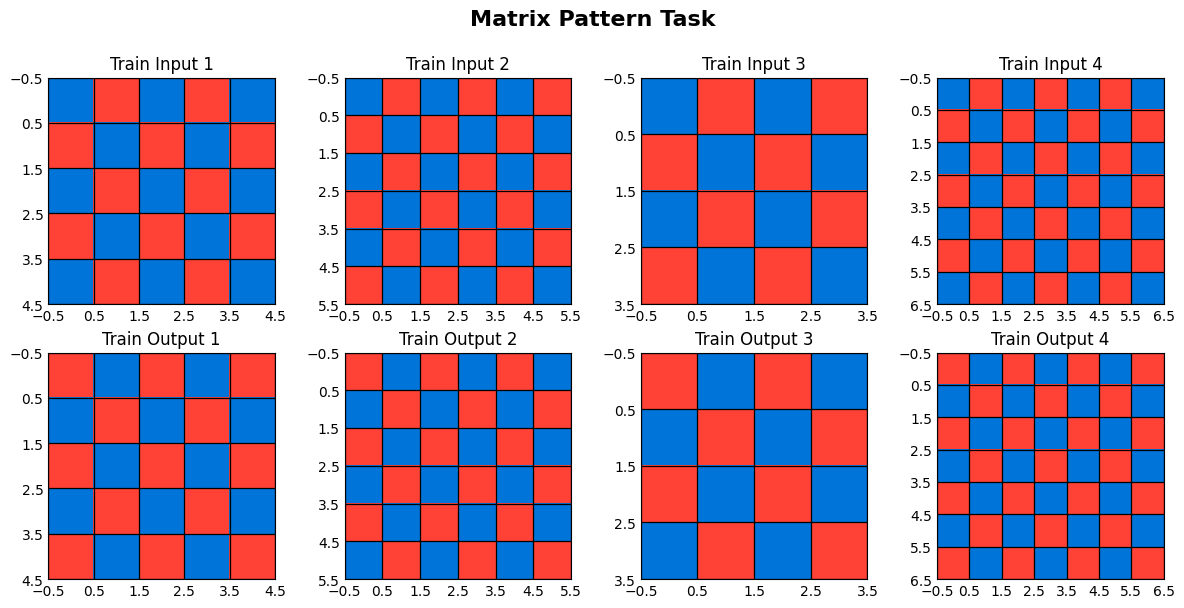

Visualizing Problem 29961


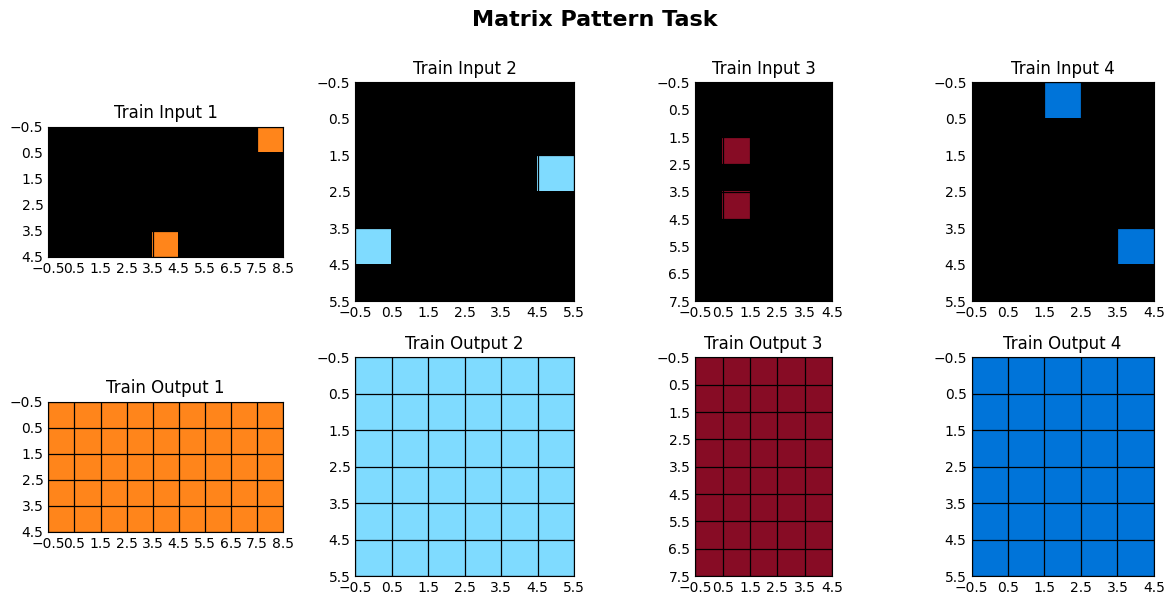

Visualizing Problem 32899


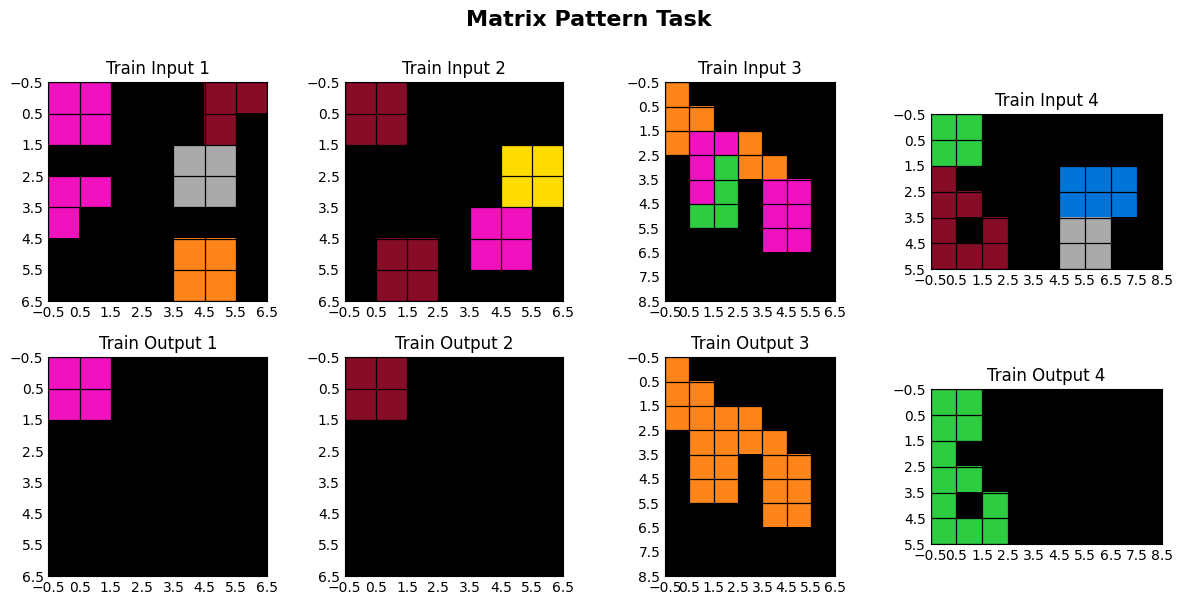

Visualizing Problem 32955


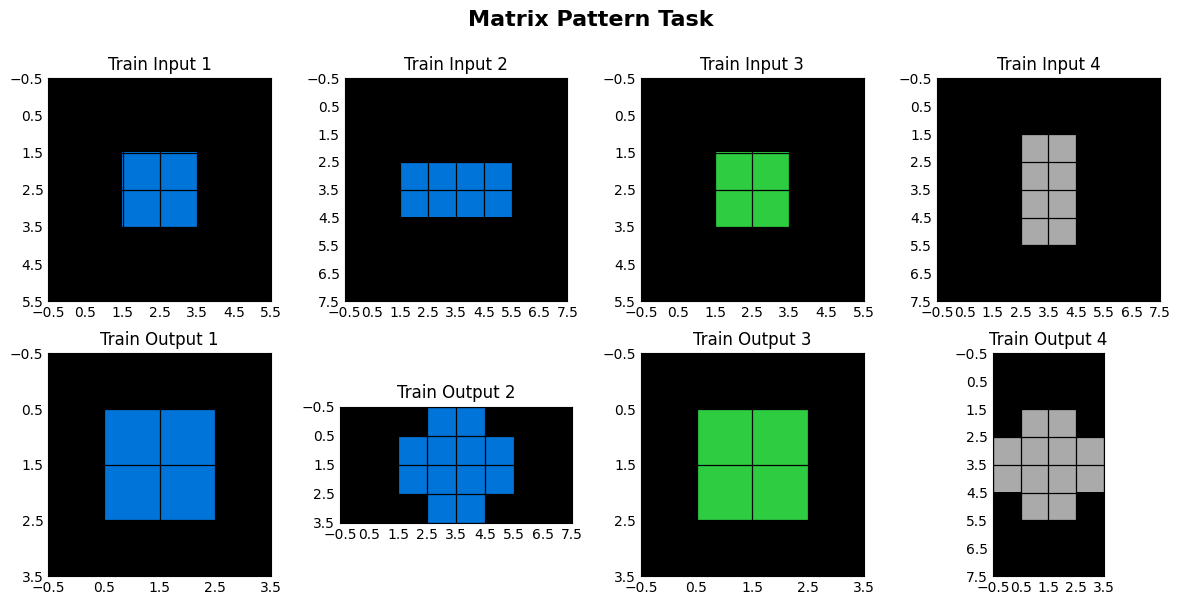

Visualizing Problem 33212


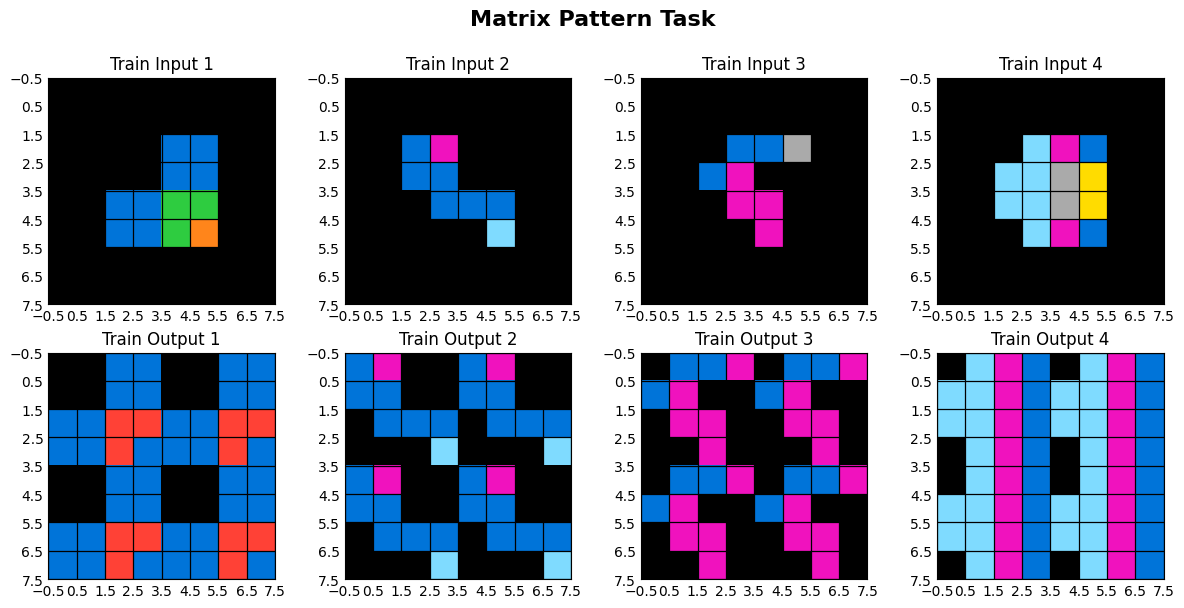

Visualizing Problem 33554


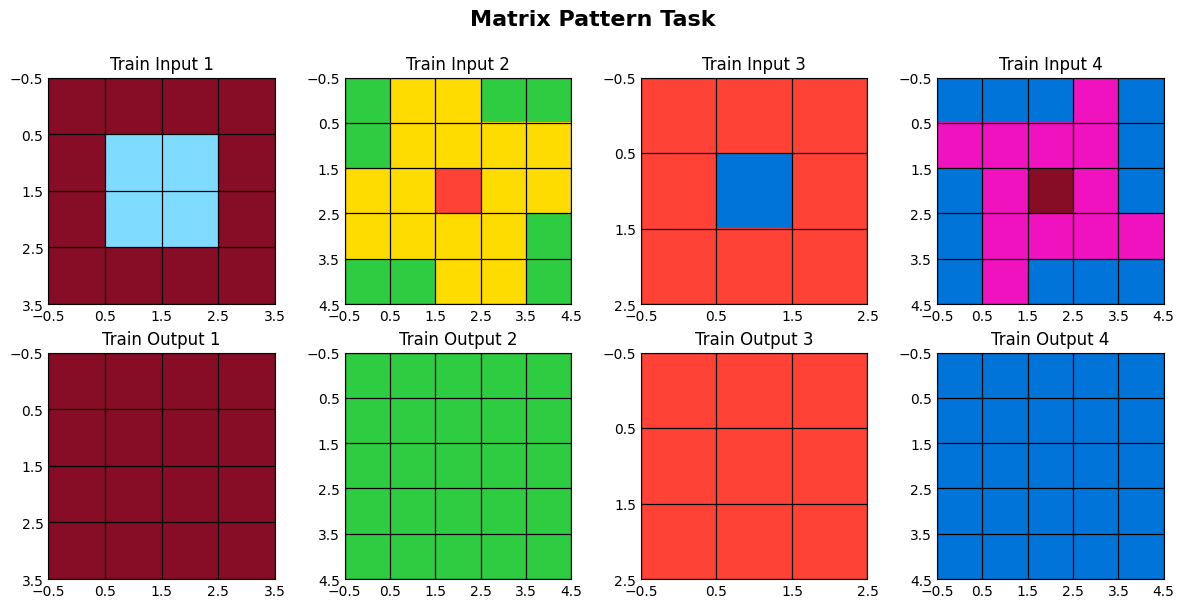

Visualizing Problem 34142


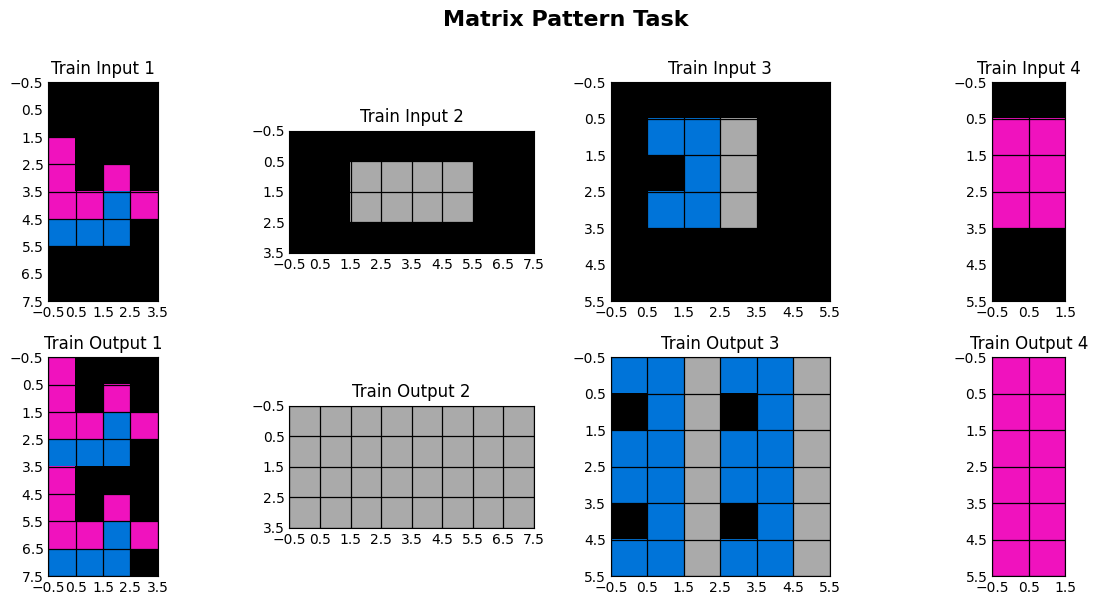

Visualizing Problem 34323


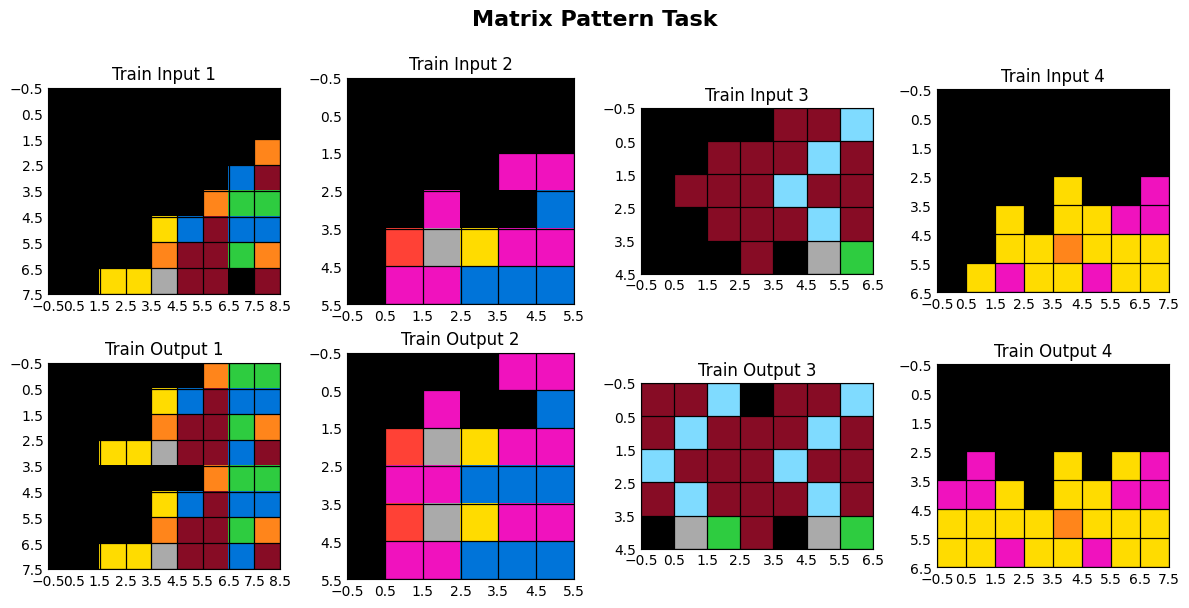

Visualizing Problem 34411


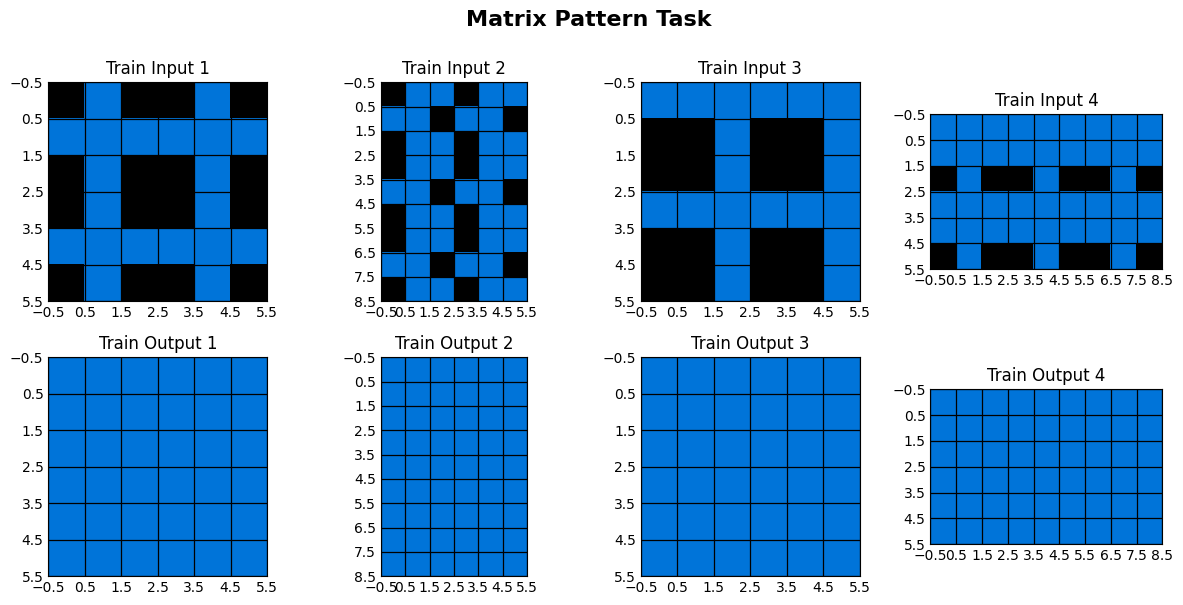

Visualizing Problem 36283


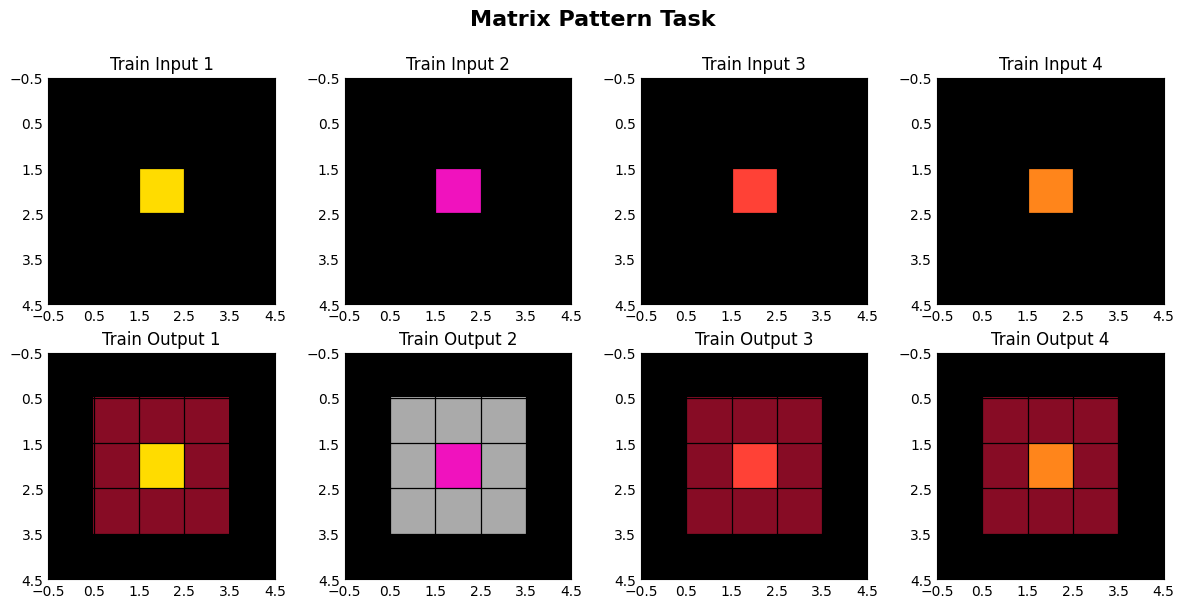

Visualizing Problem 37731


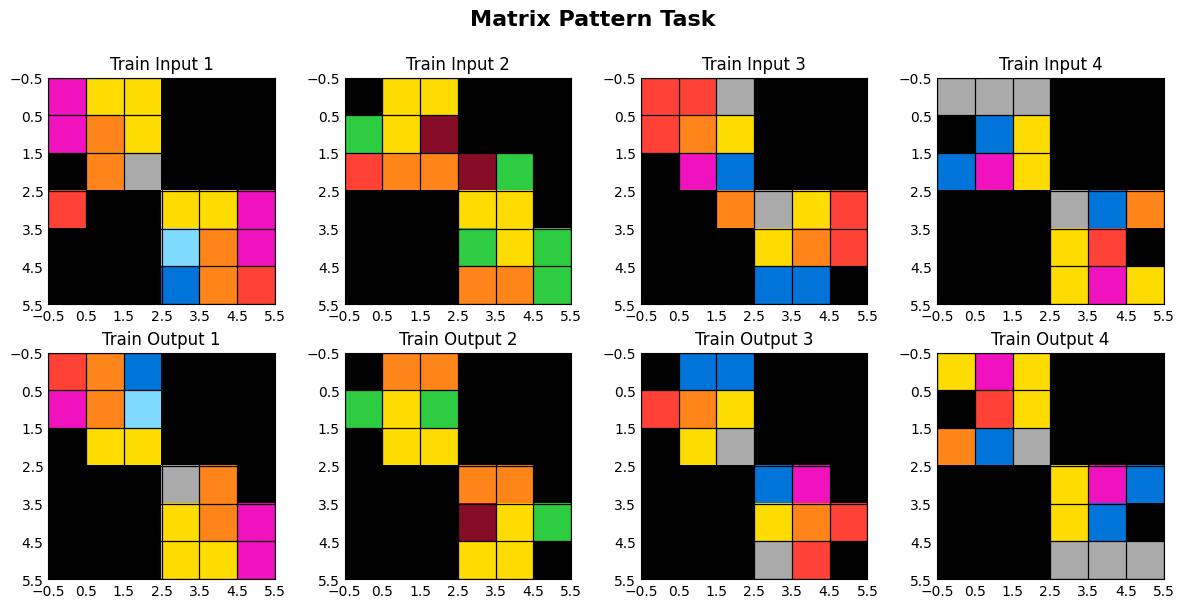

Visualizing Problem 38050


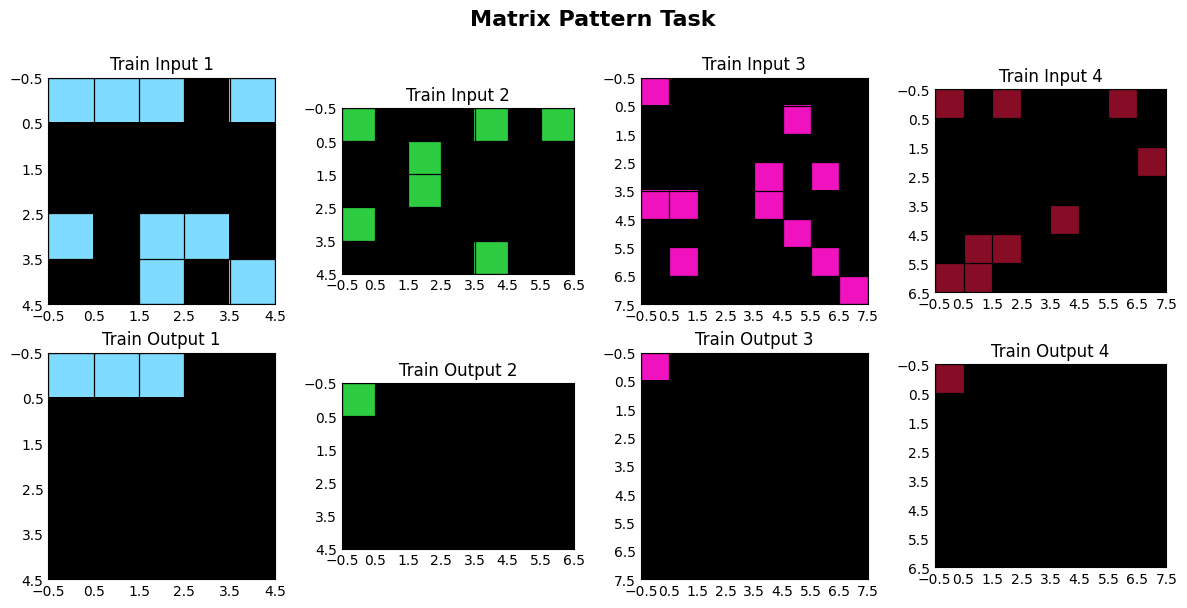

Visualizing Problem 38601


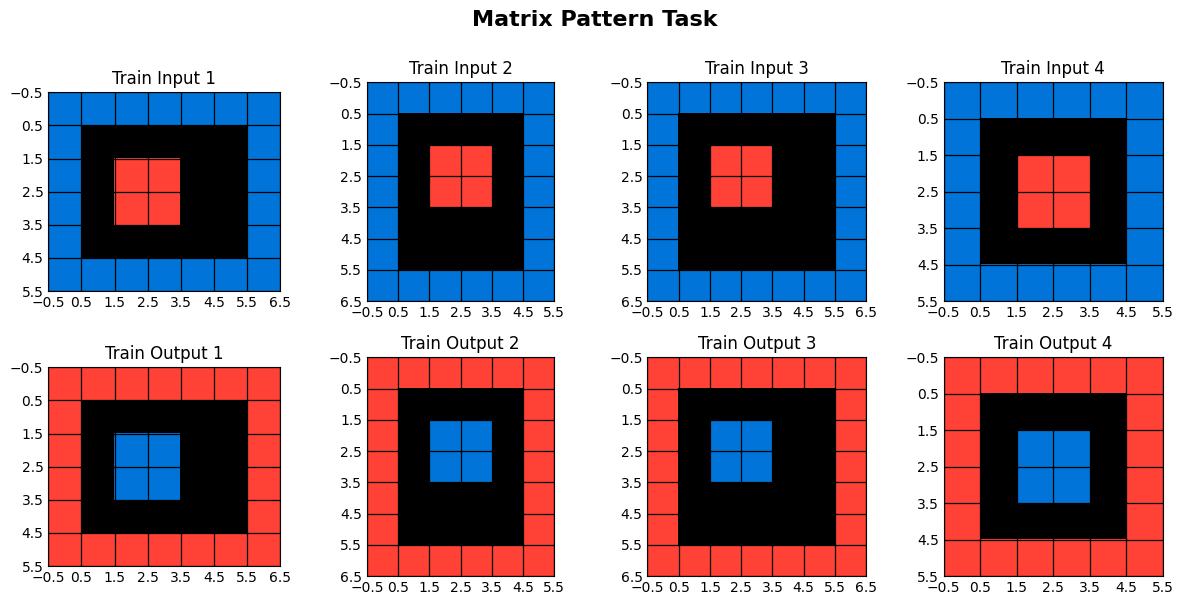

Visualizing Problem 38704


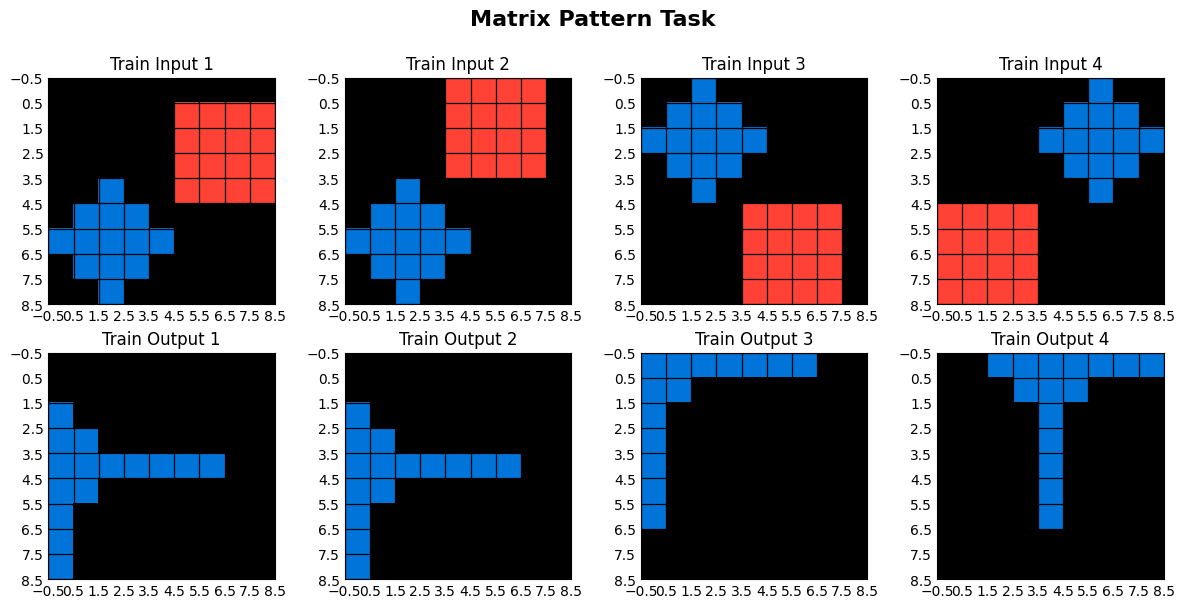

Visualizing Problem 39007


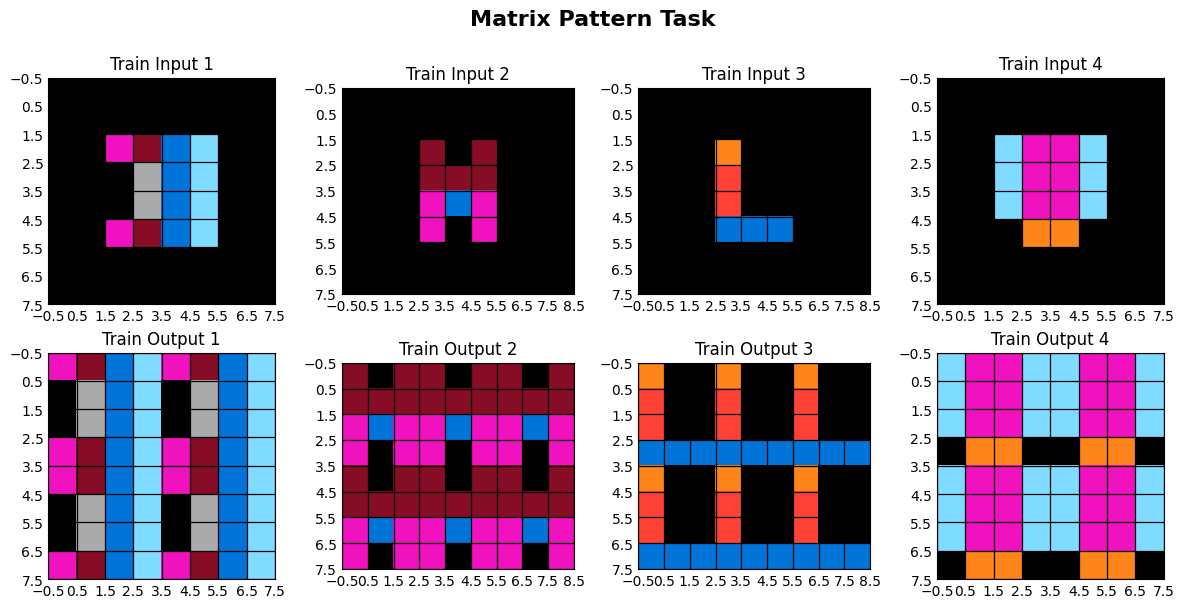

Visualizing Problem 39376


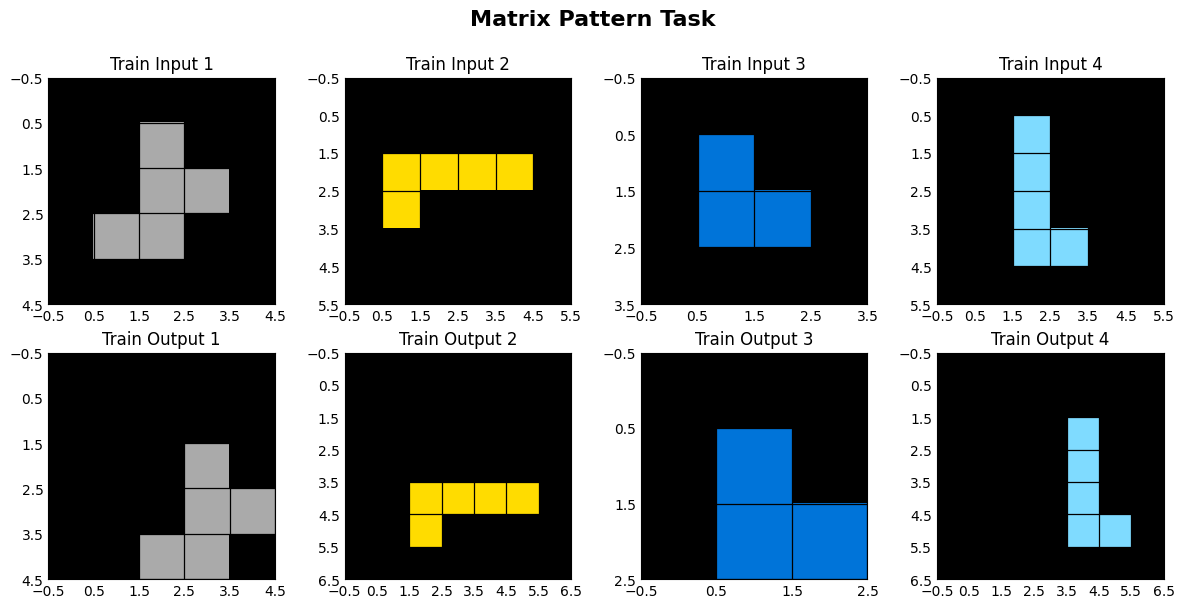

Visualizing Problem 40693


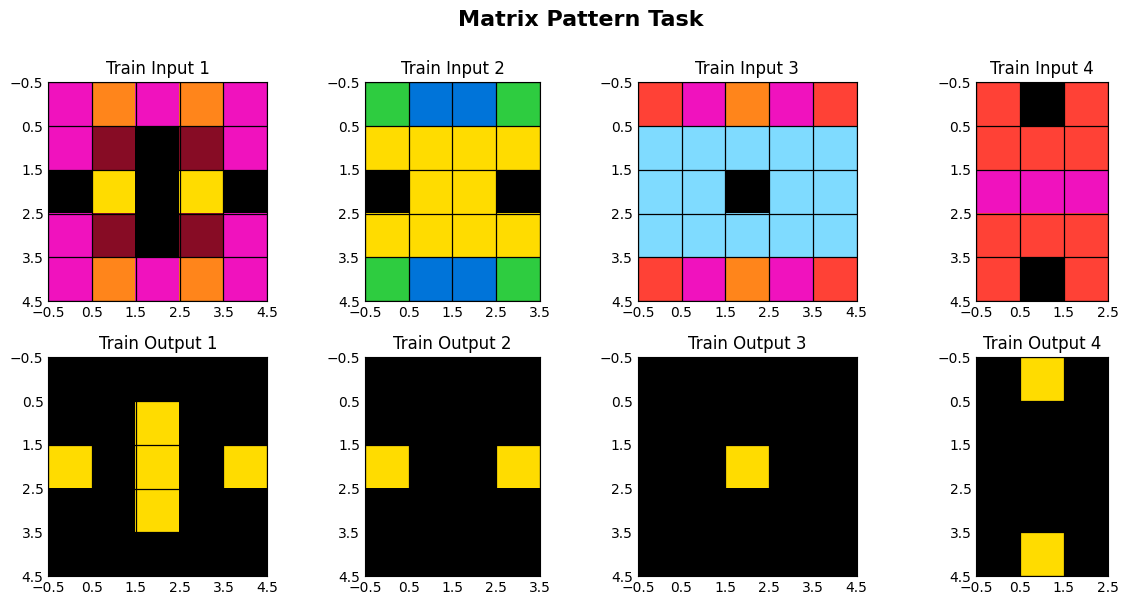

Visualizing Problem 41402


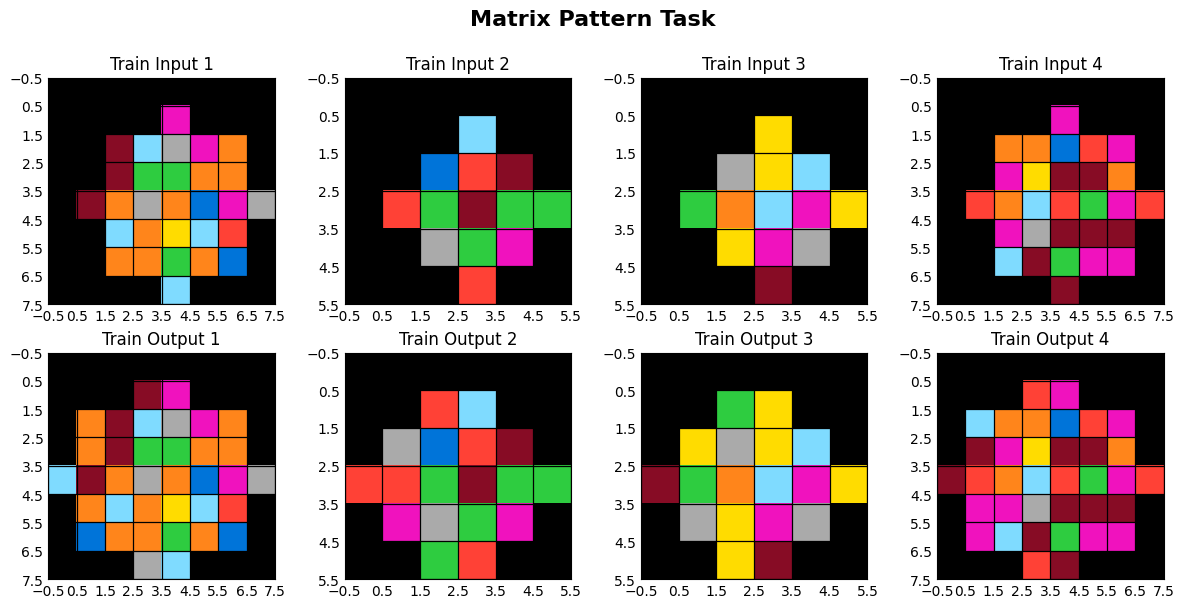

Visualizing Problem 41906


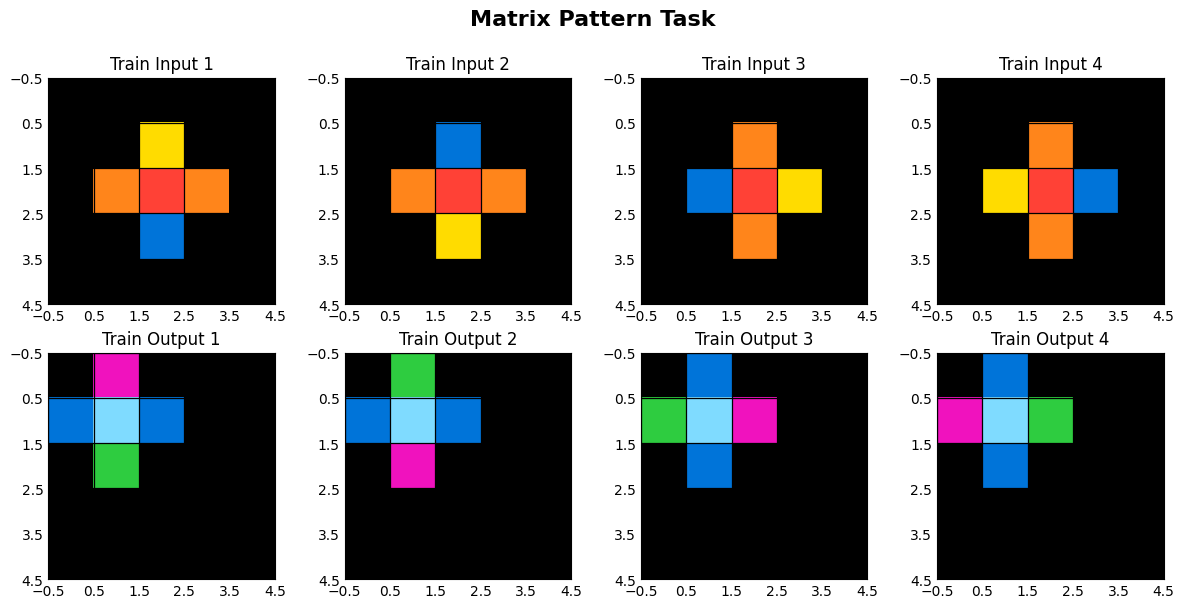

Visualizing Problem 43671


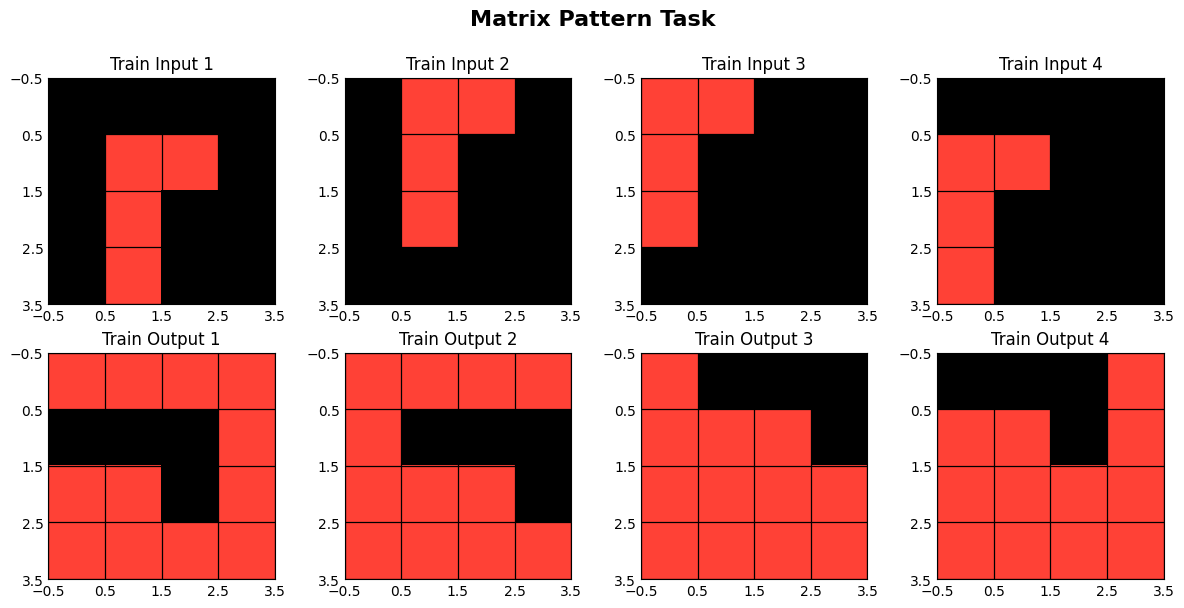

Visualizing Problem 44801


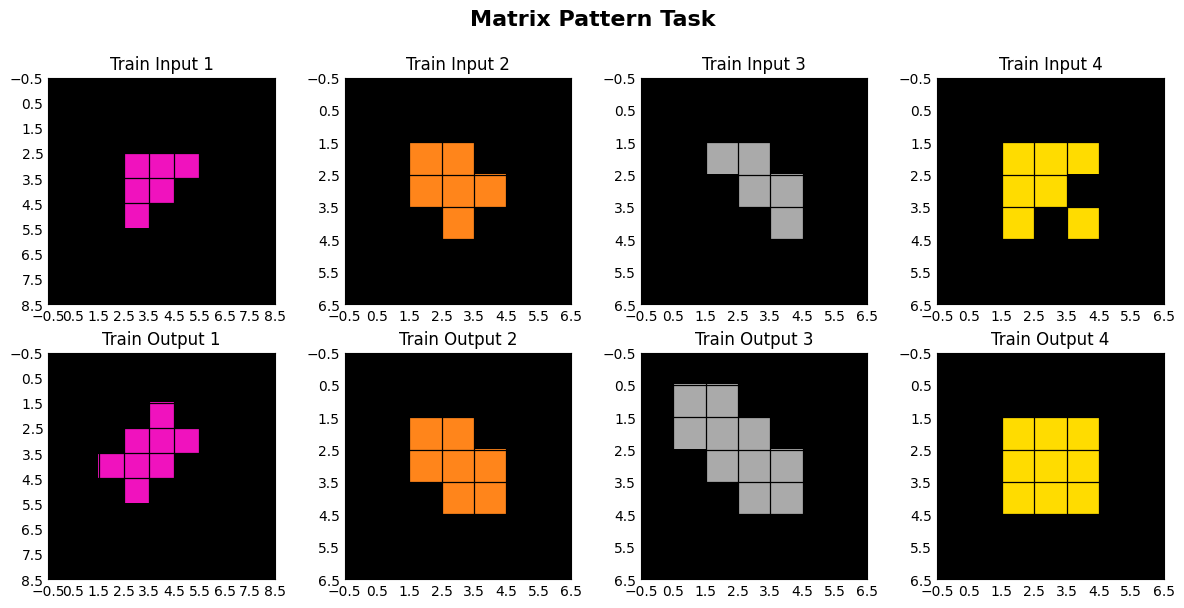

Visualizing Problem 46641


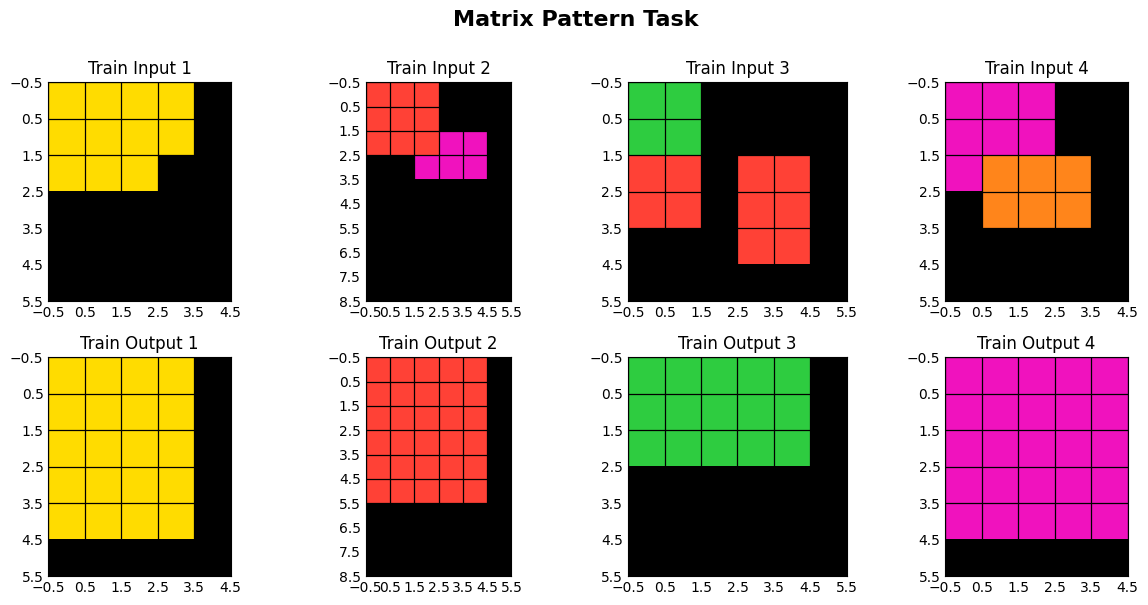

Visualizing Problem 46710


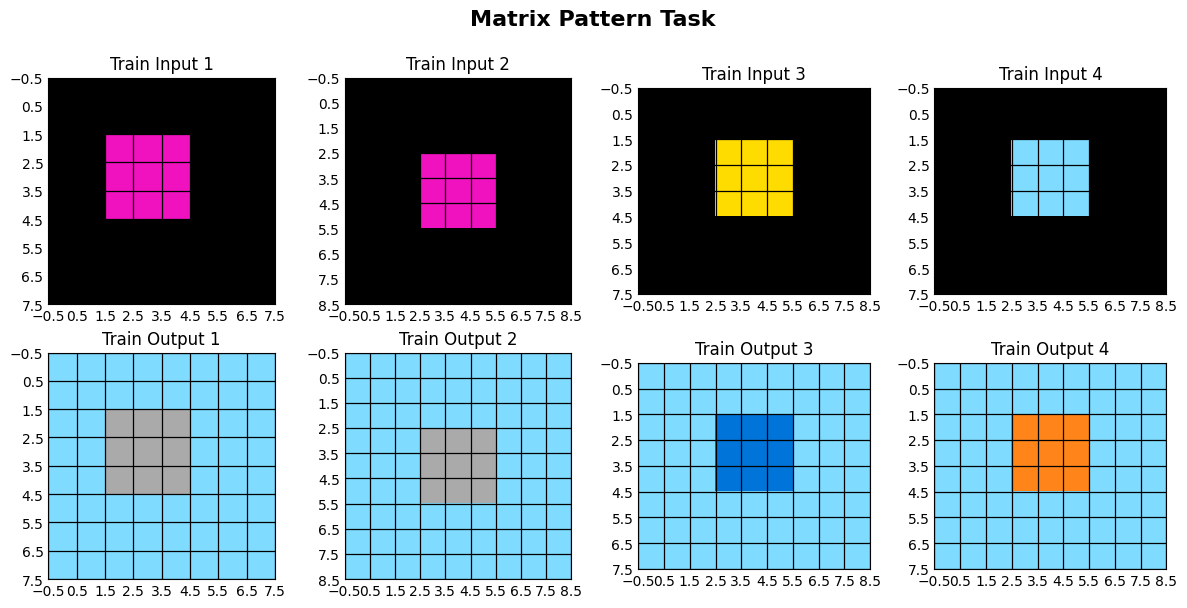

Visualizing Problem 48276


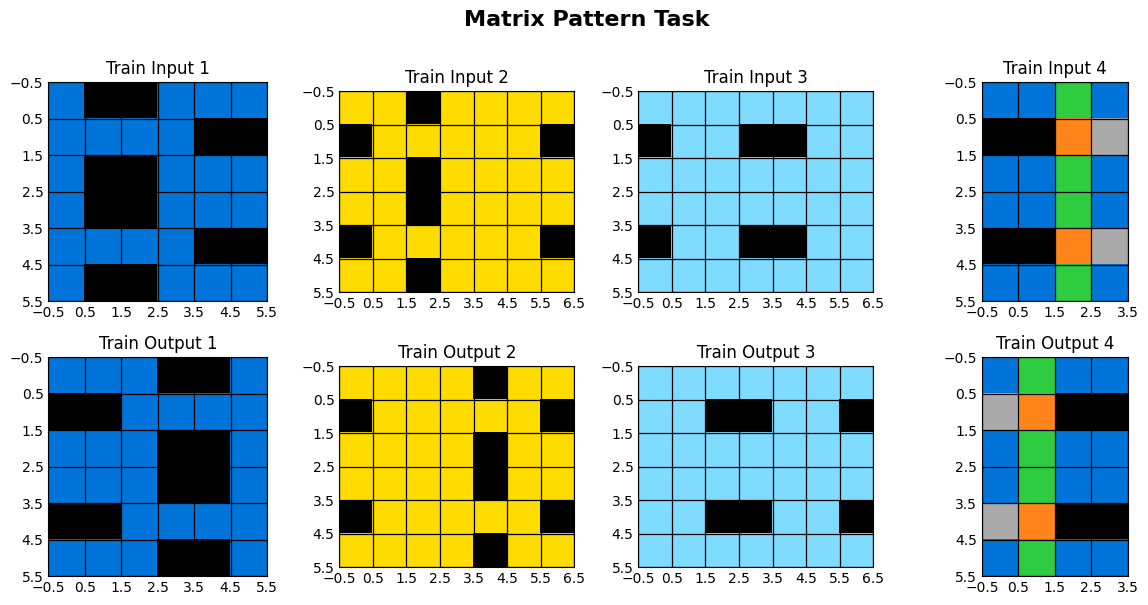

Visualizing Problem 48411


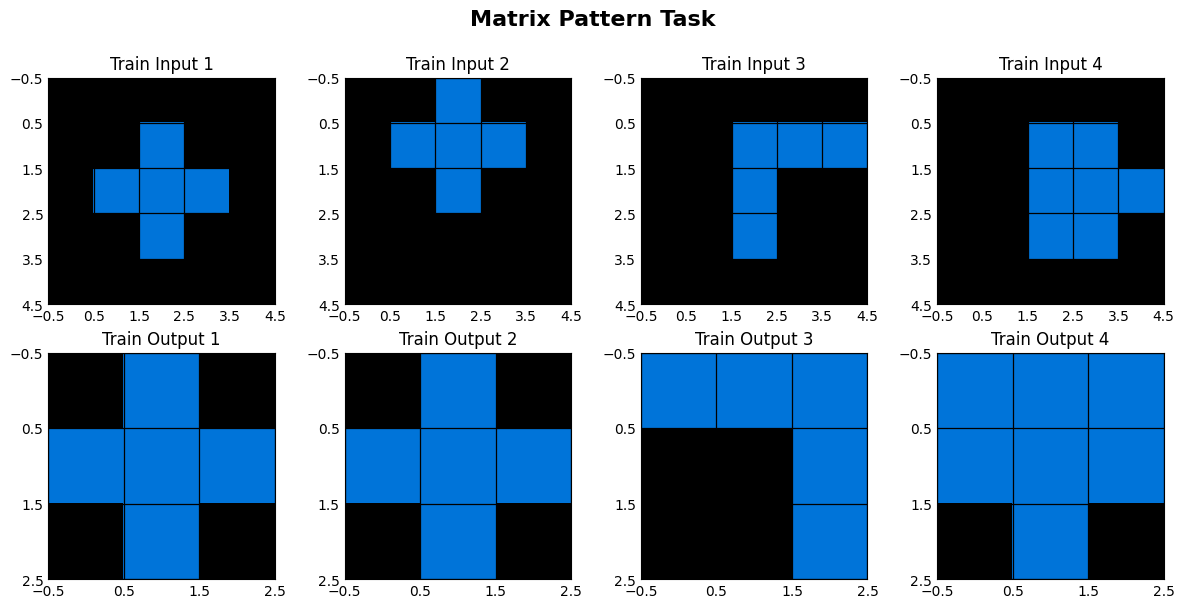

Visualizing Problem 48684


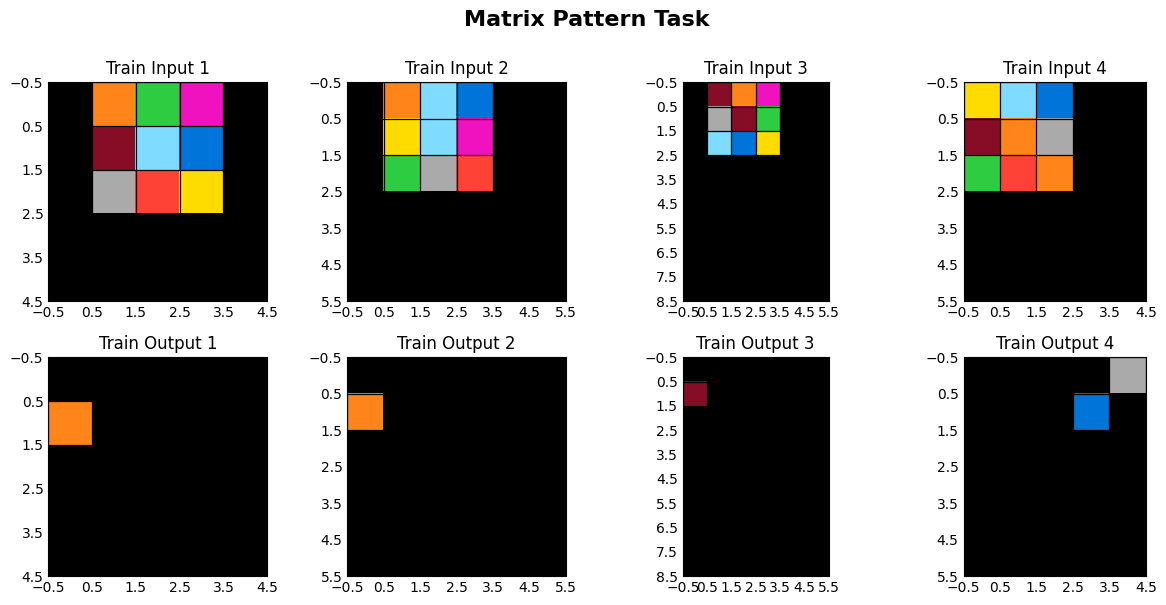

Visualizing Problem 49896


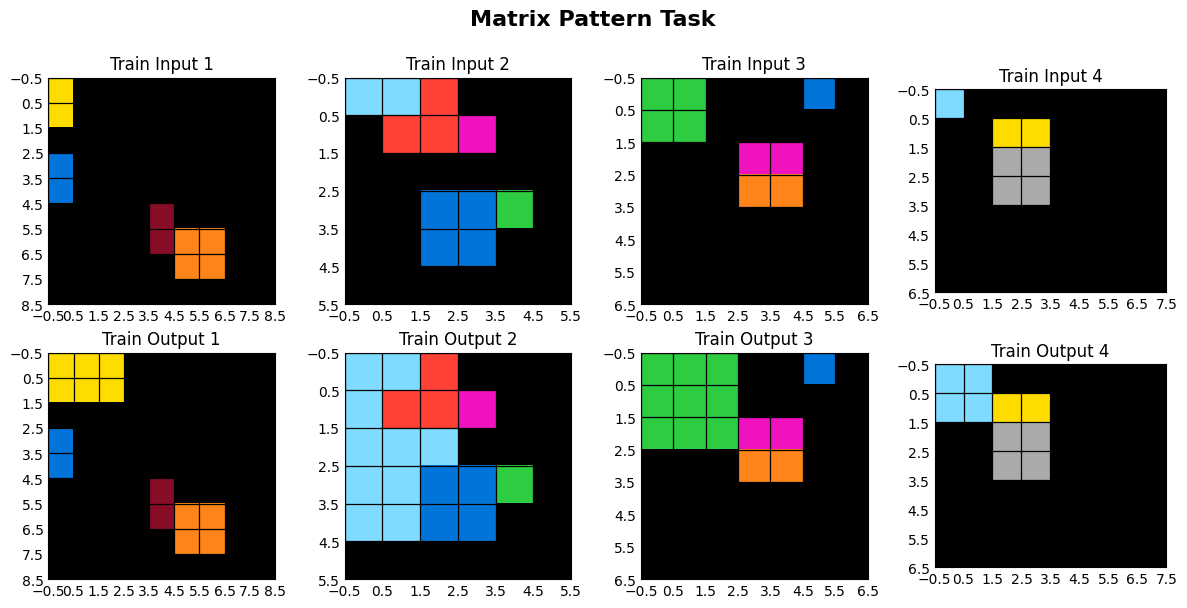

Visualizing Problem 50918


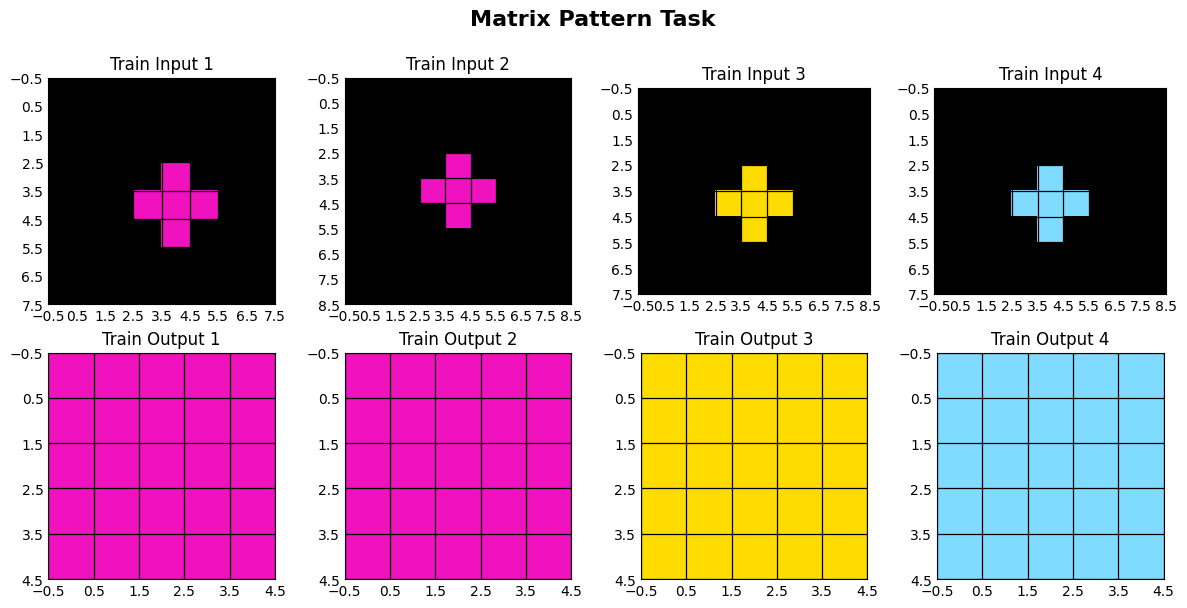

Visualizing Problem 51210


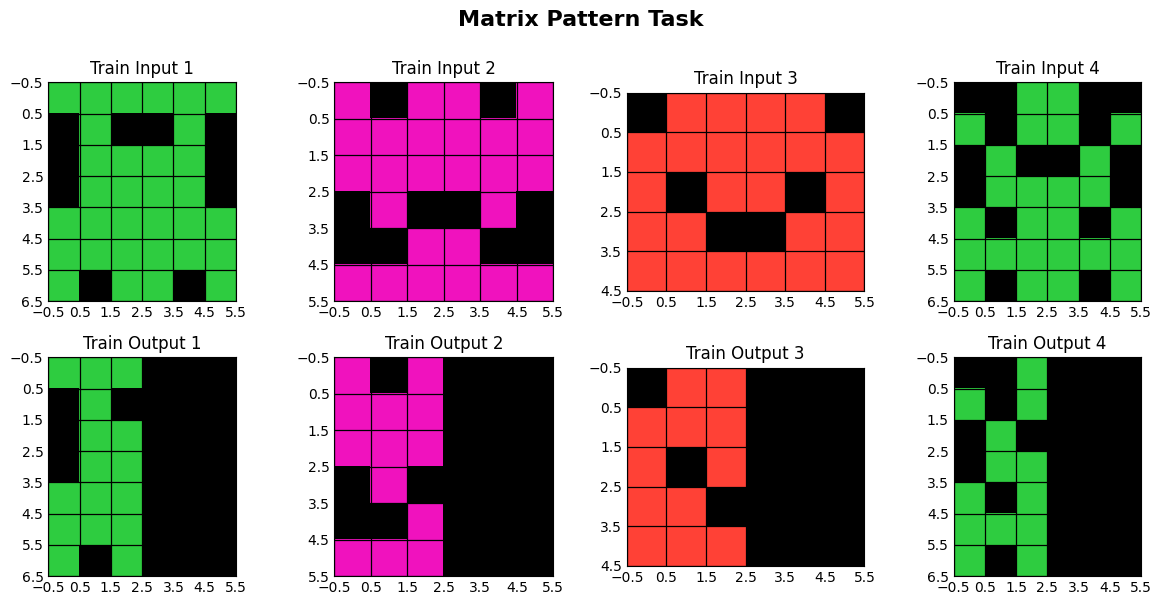

Visualizing Problem 52298


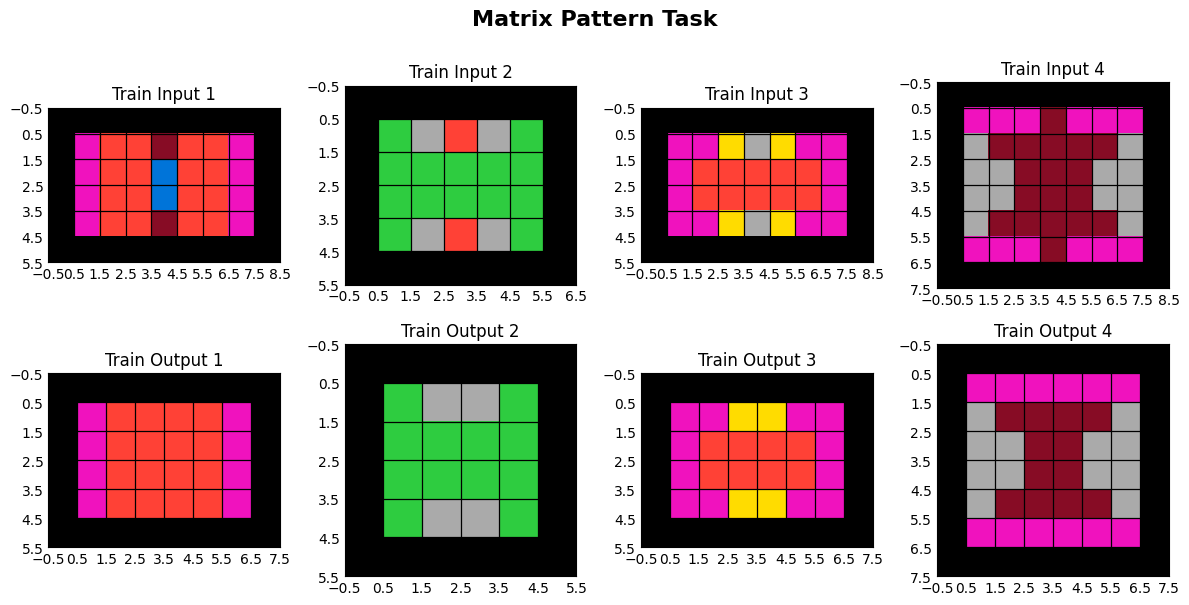

Visualizing Problem 52832


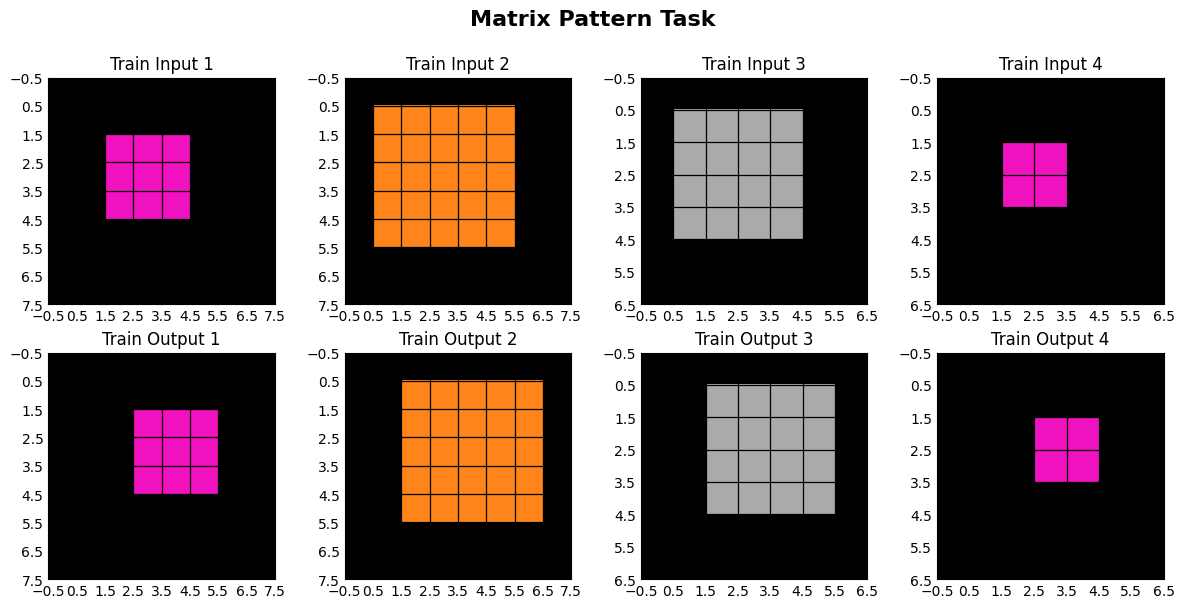

Visualizing Problem 53475


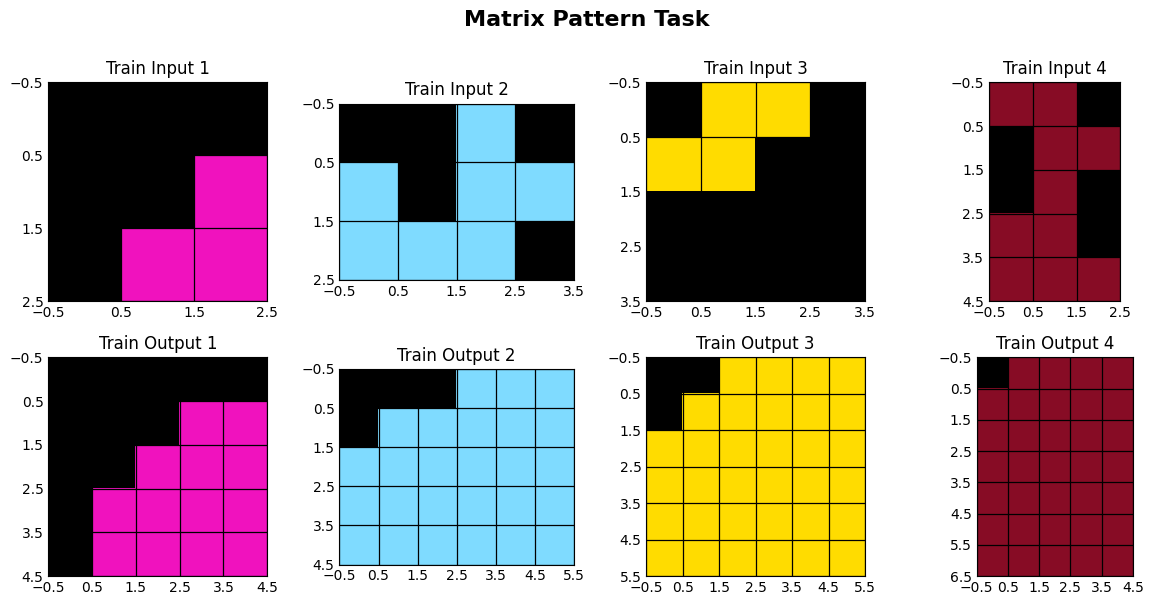

Visualizing Problem 54531


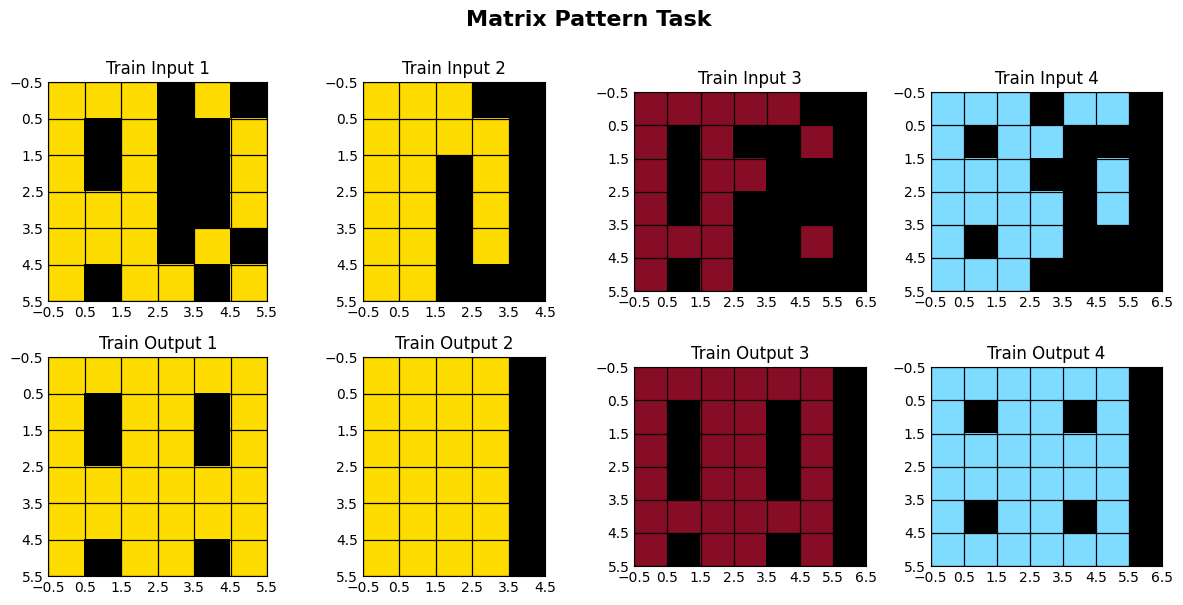

Visualizing Problem 55836


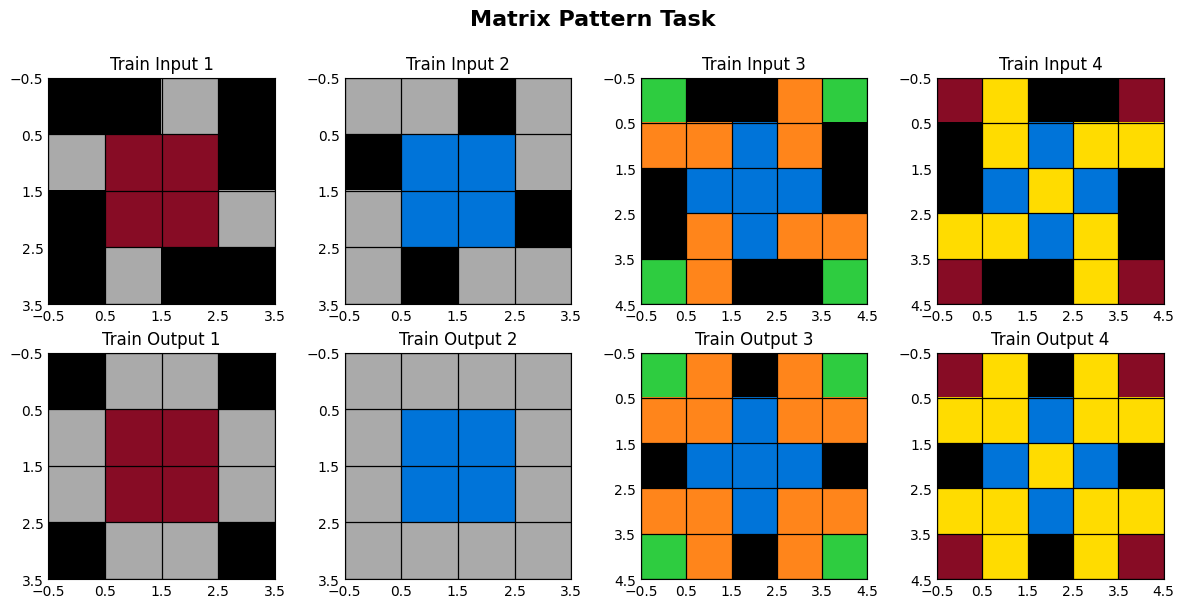

Visualizing Problem 57338


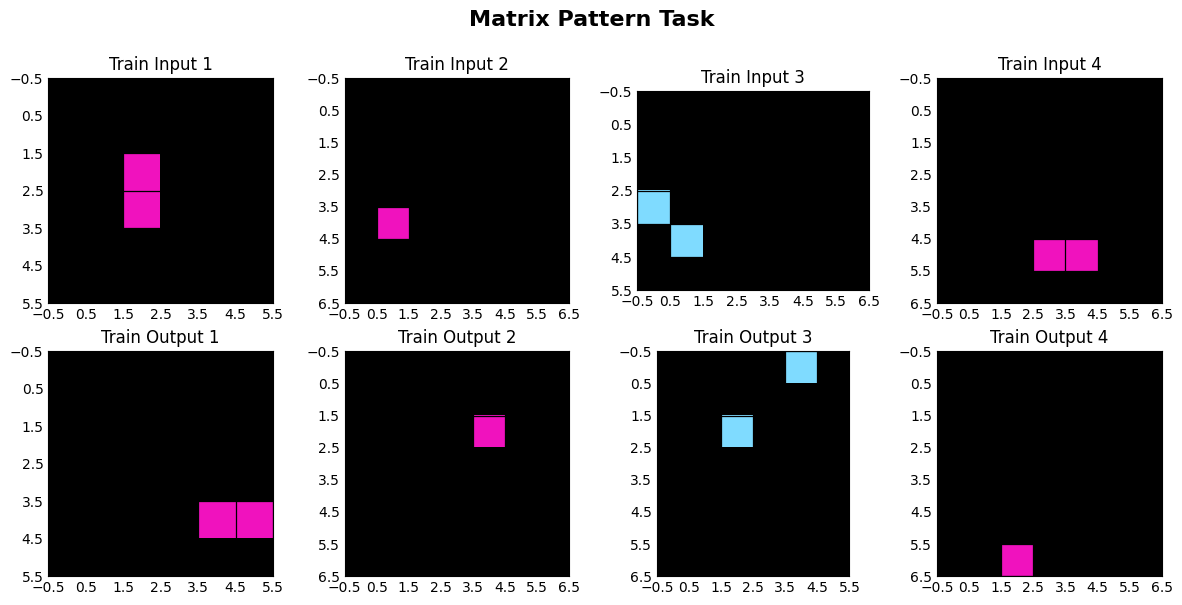

Visualizing Problem 58408


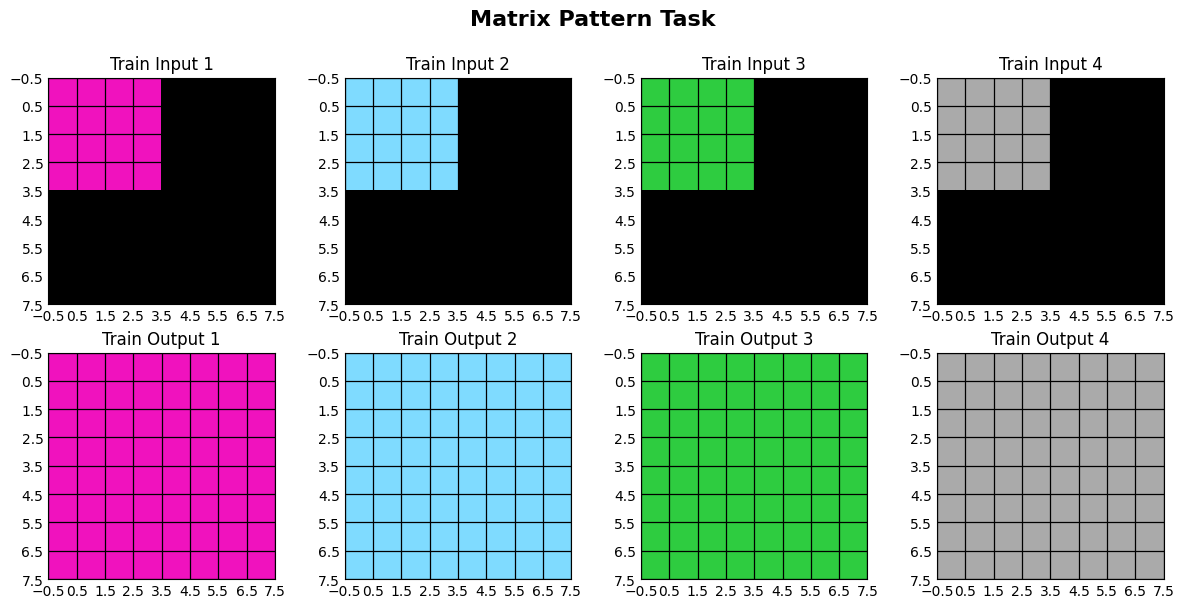

Visualizing Problem 58413


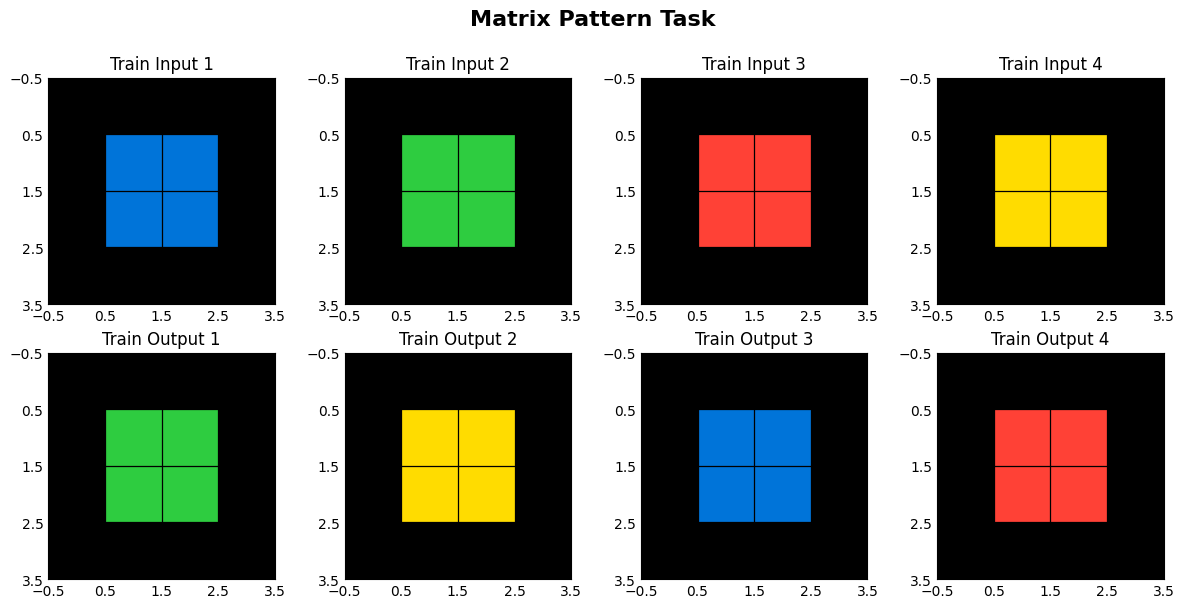

Visualizing Problem 59331


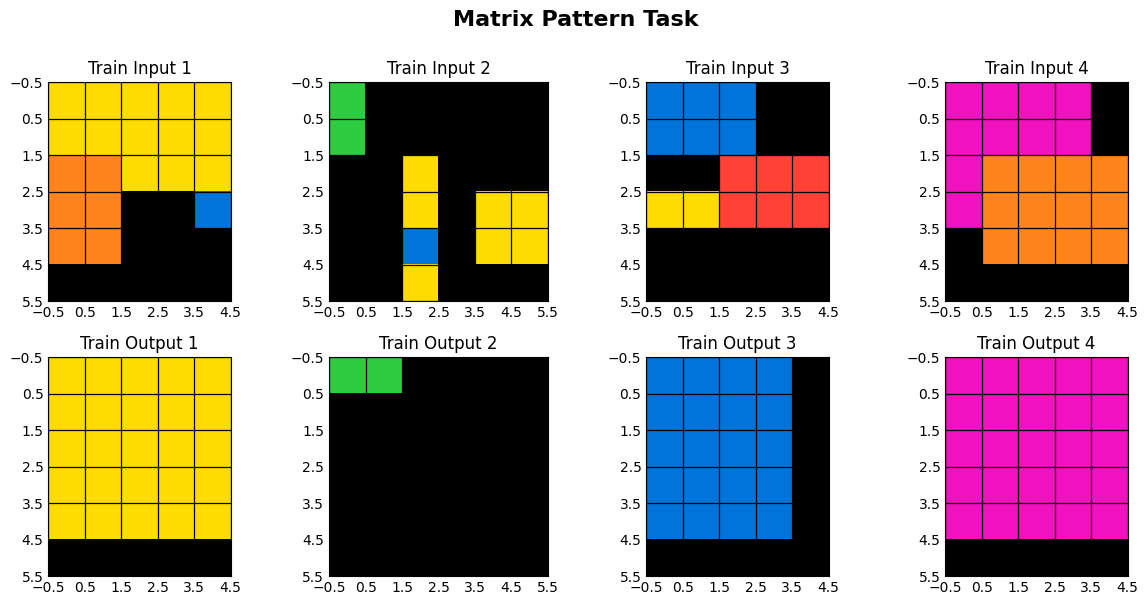

Visualizing Problem 62947


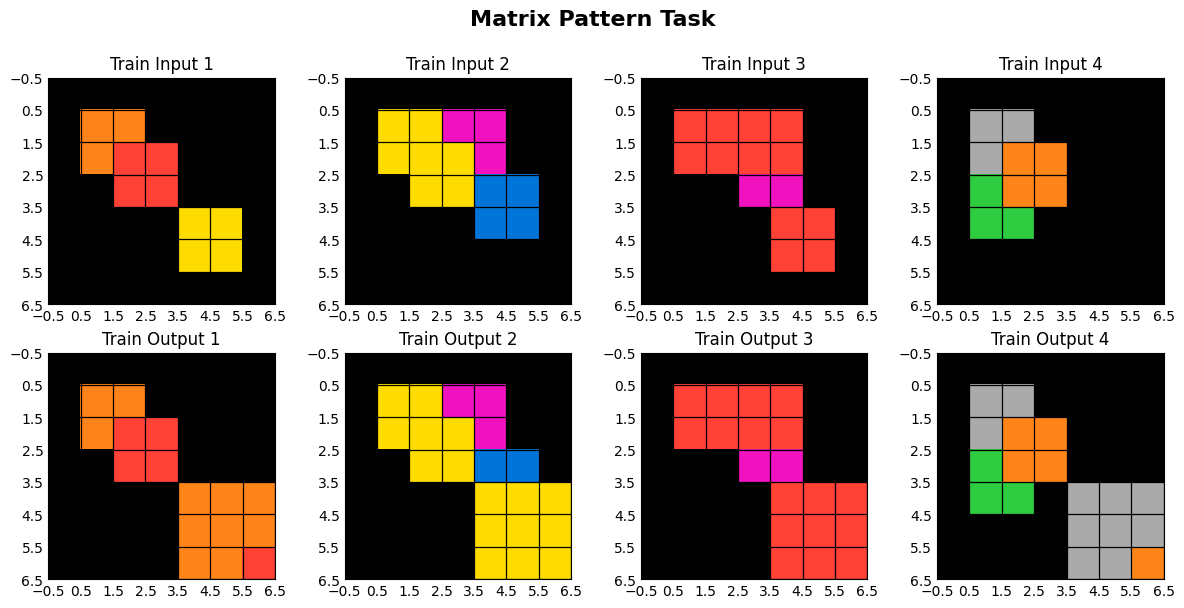

Visualizing Problem 63605


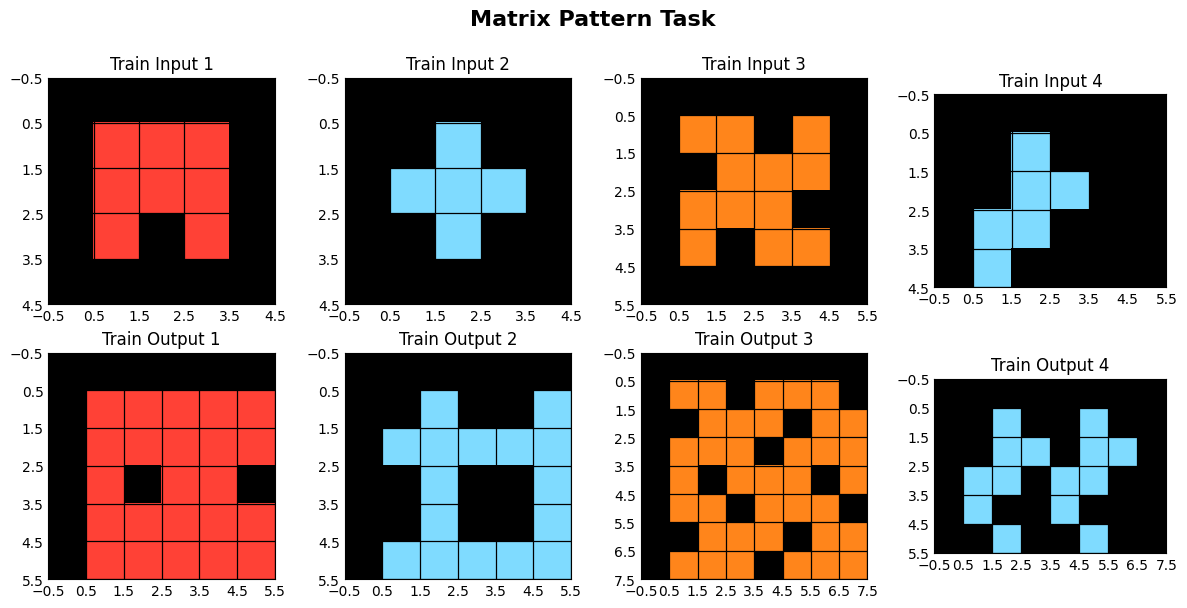

Visualizing Problem 63977


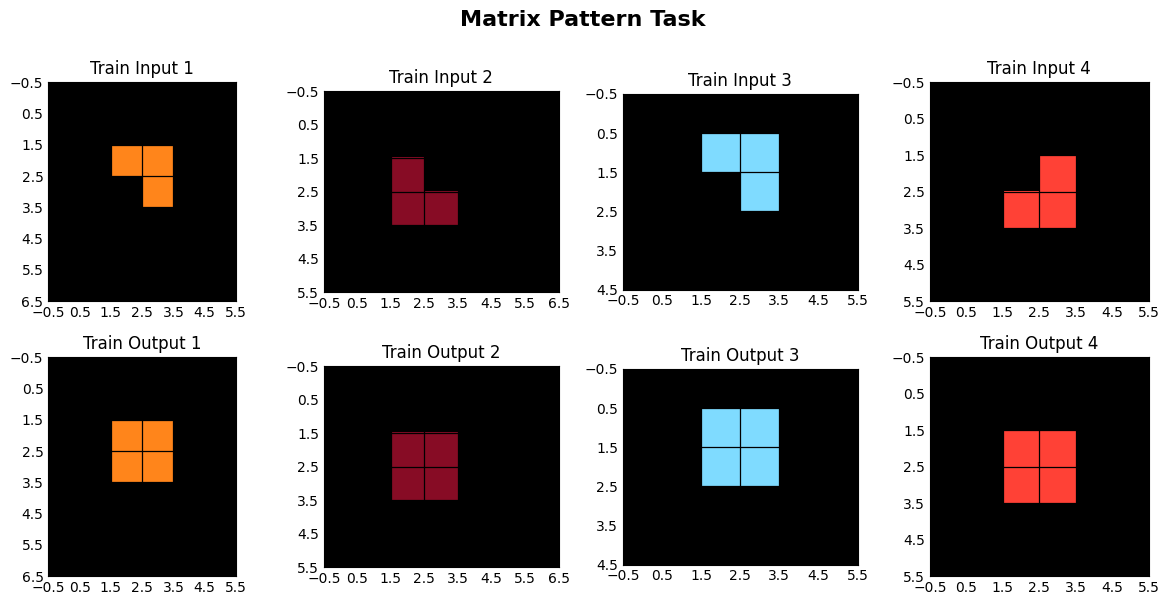

Visualizing Problem 65589


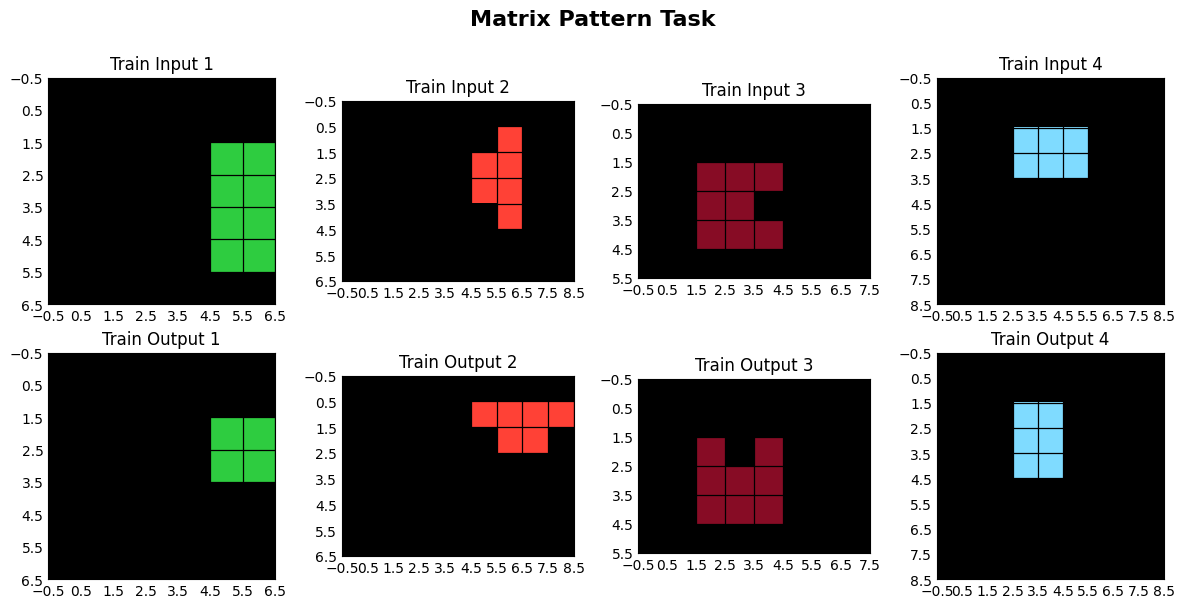

Visualizing Problem 66178


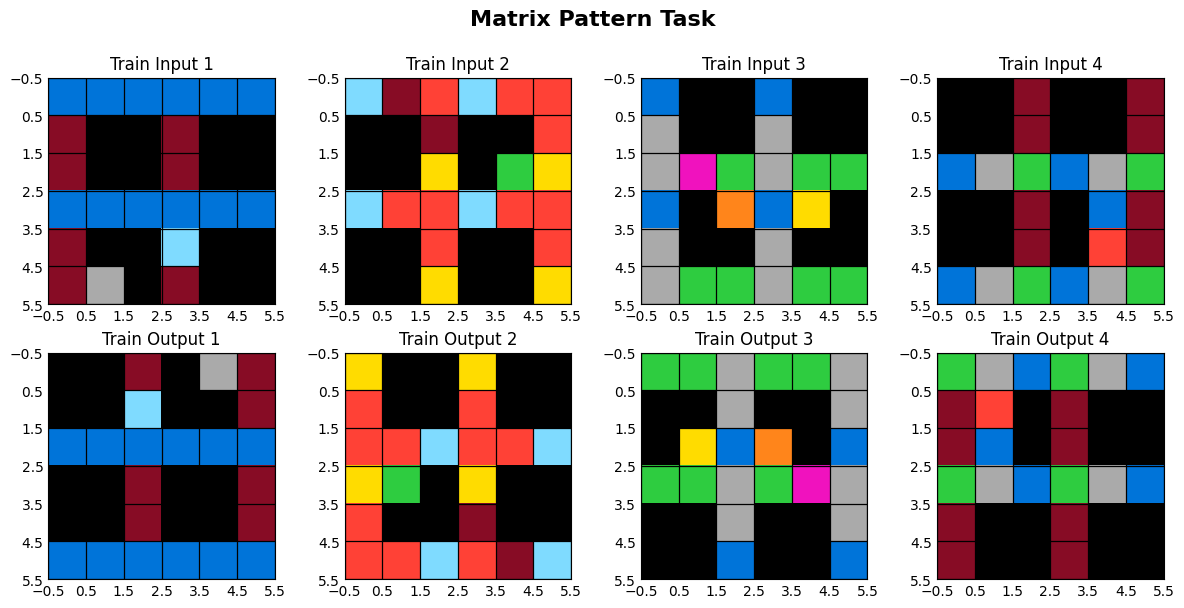

Visualizing Problem 67421


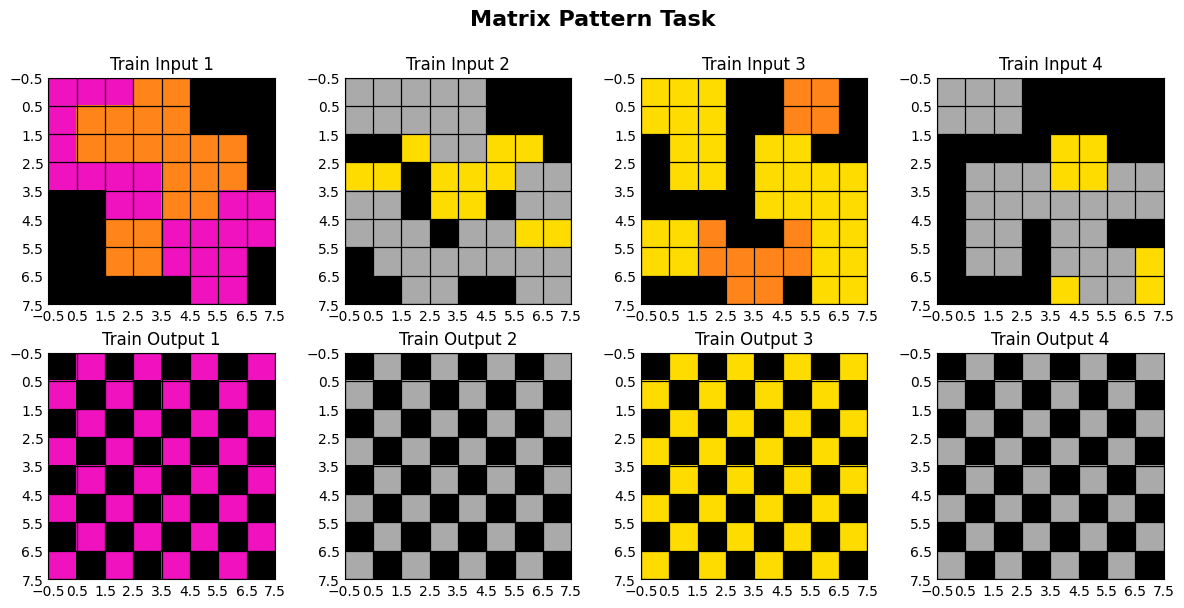

Visualizing Problem 67830


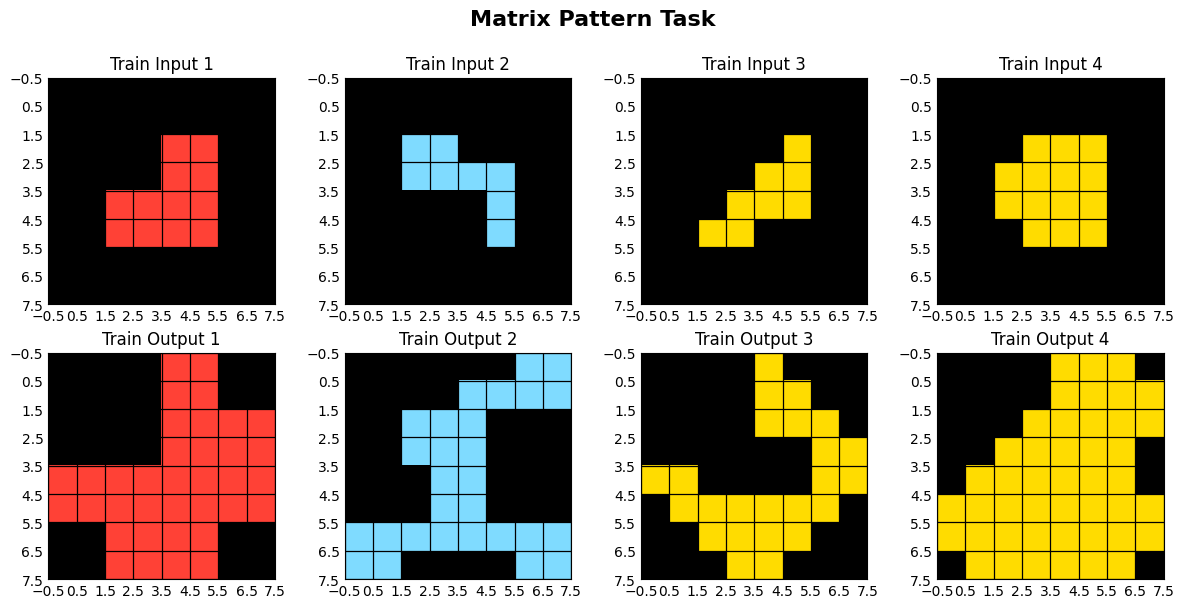

Visualizing Problem 68188


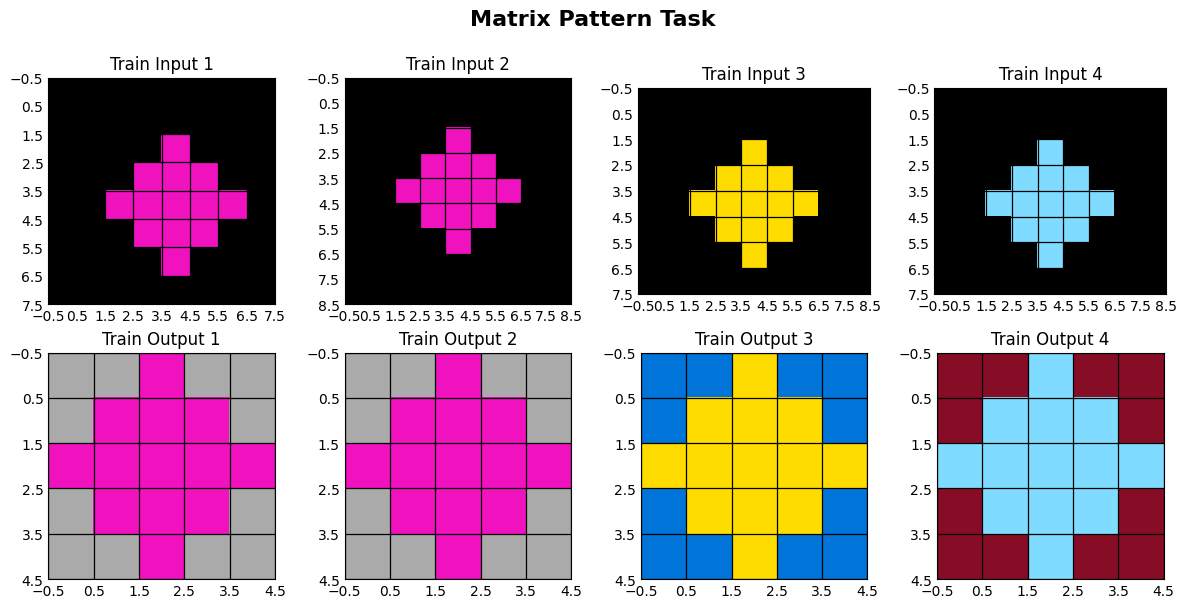

Visualizing Problem 68294


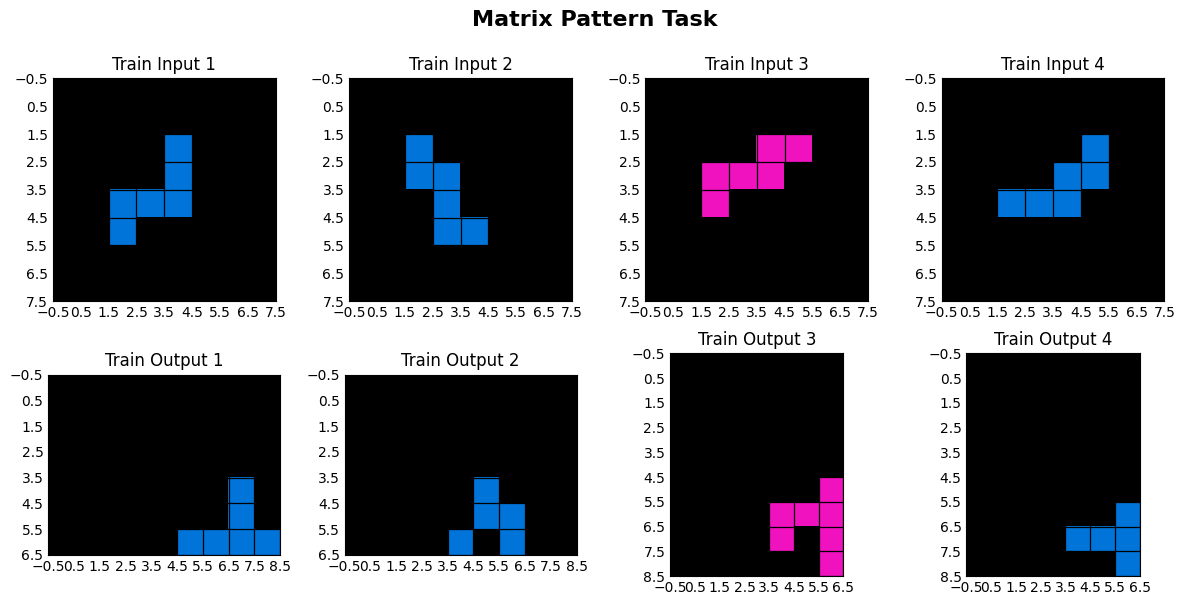

Visualizing Problem 69746


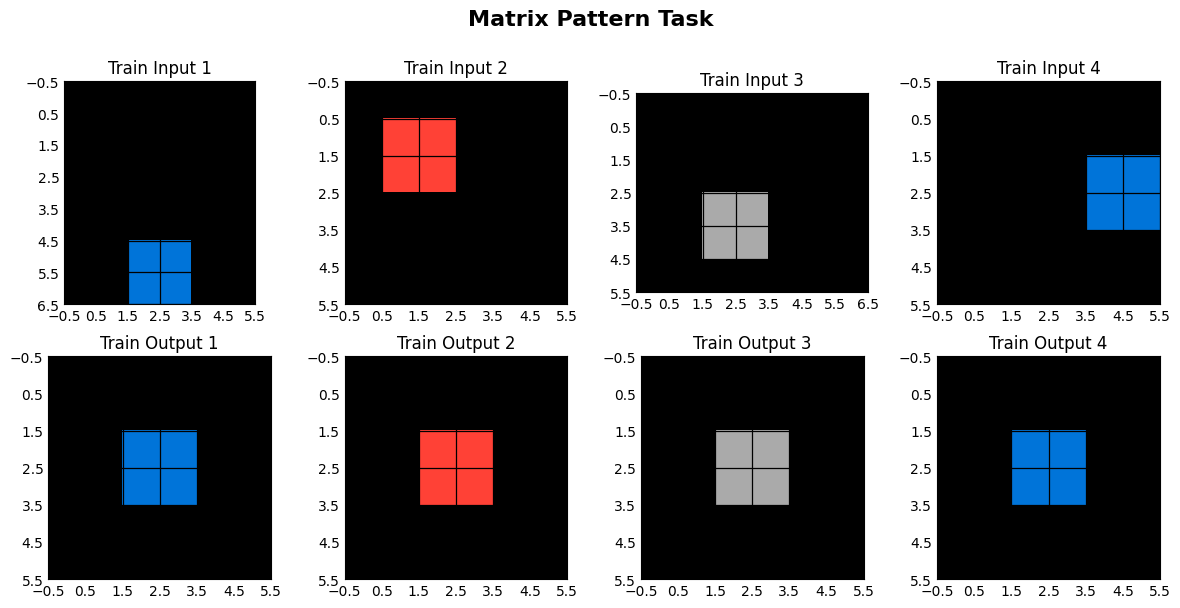

Visualizing Problem 69936


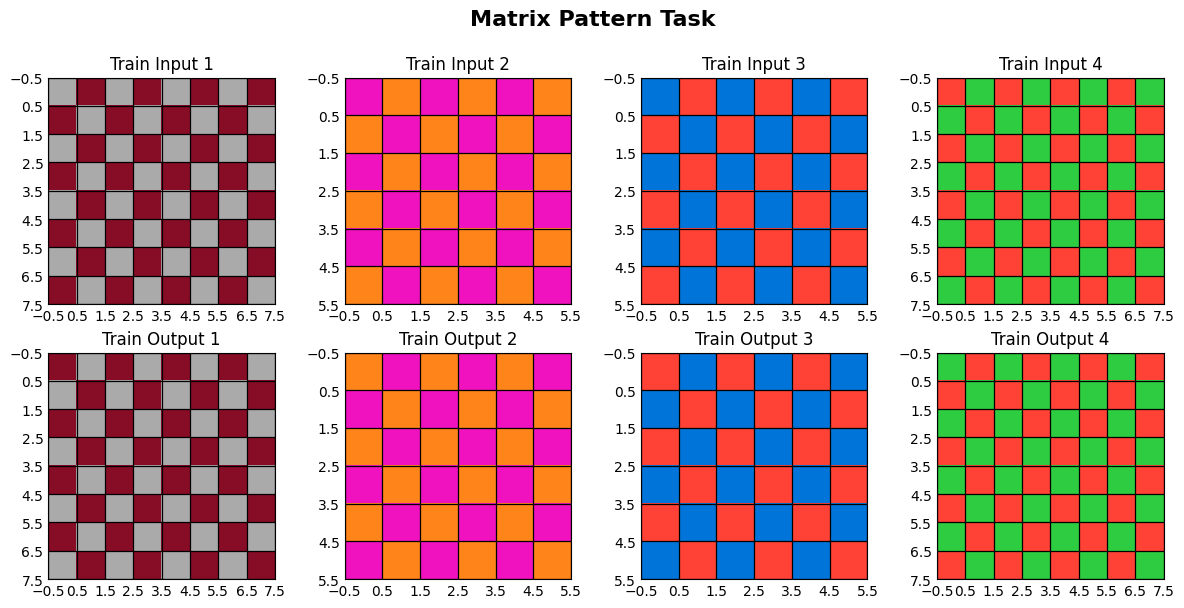

Visualizing Problem 70139


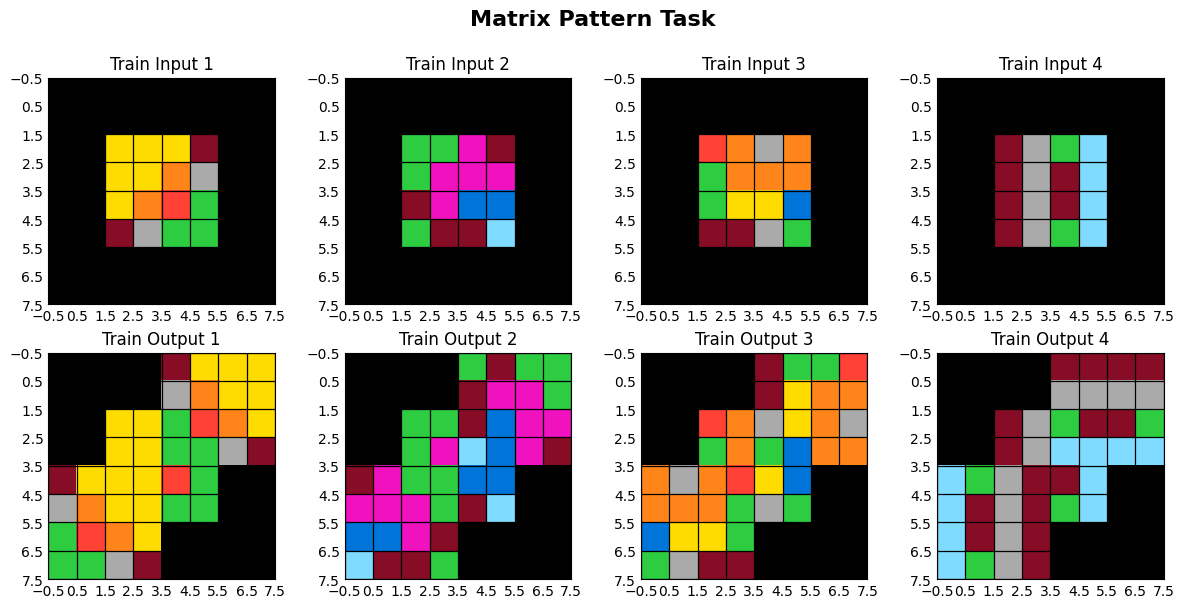

Visualizing Problem 70849


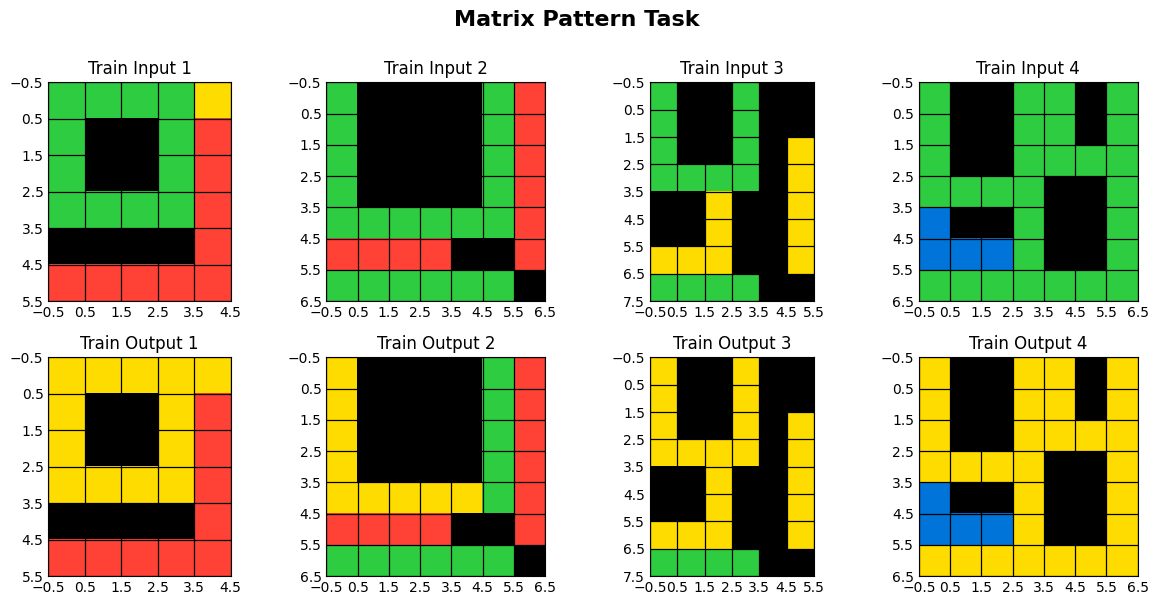

Visualizing Problem 71057


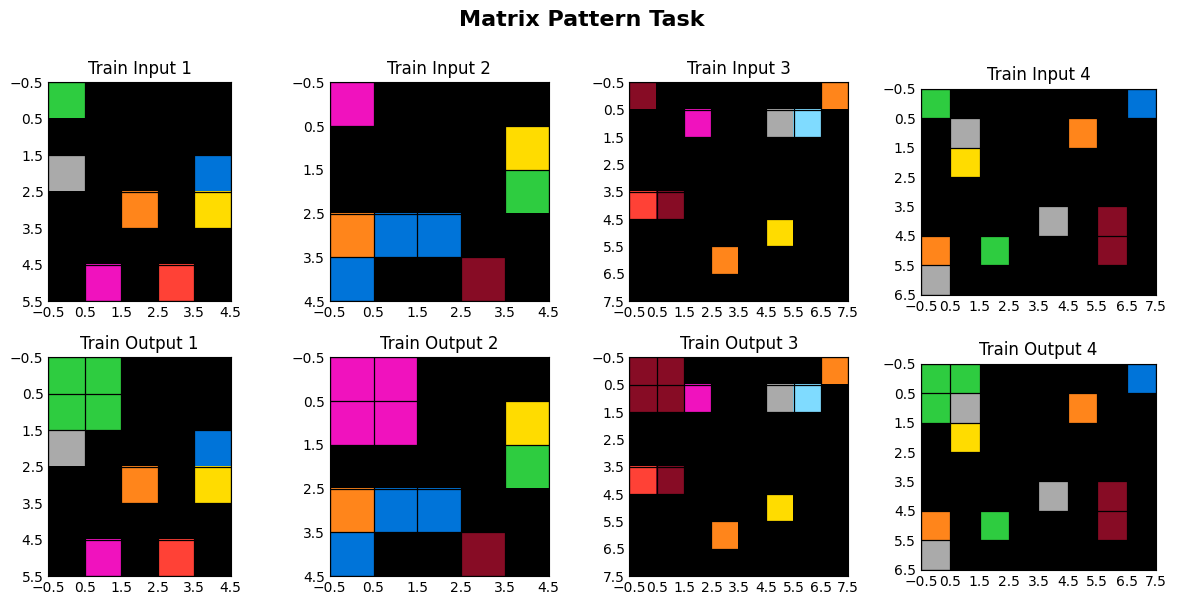

Visualizing Problem 71185


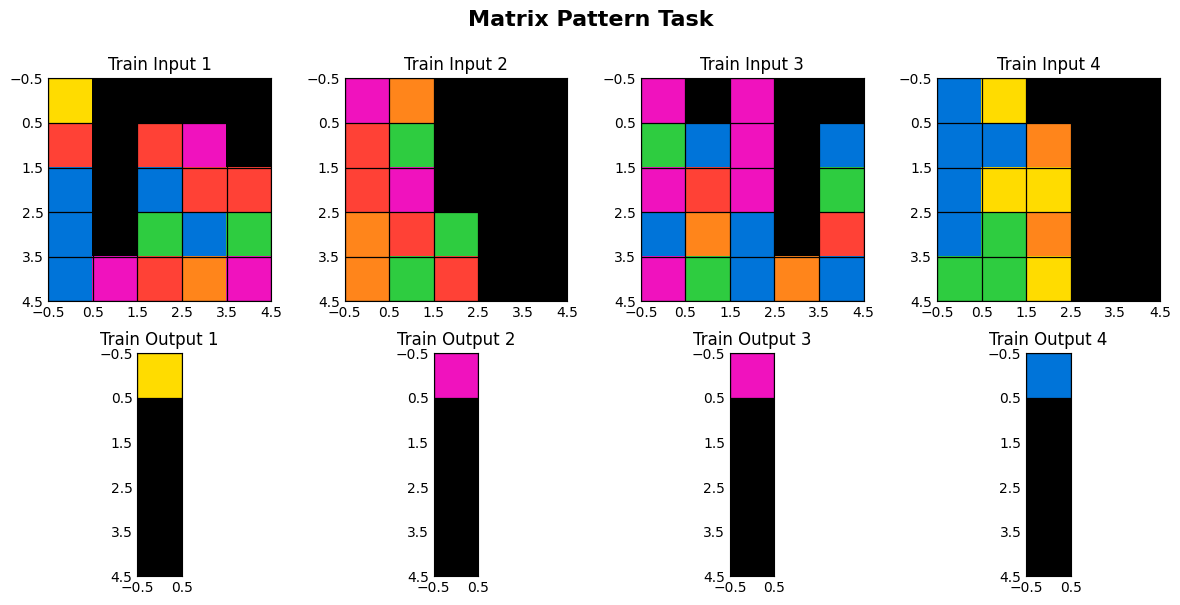

Visualizing Problem 73054


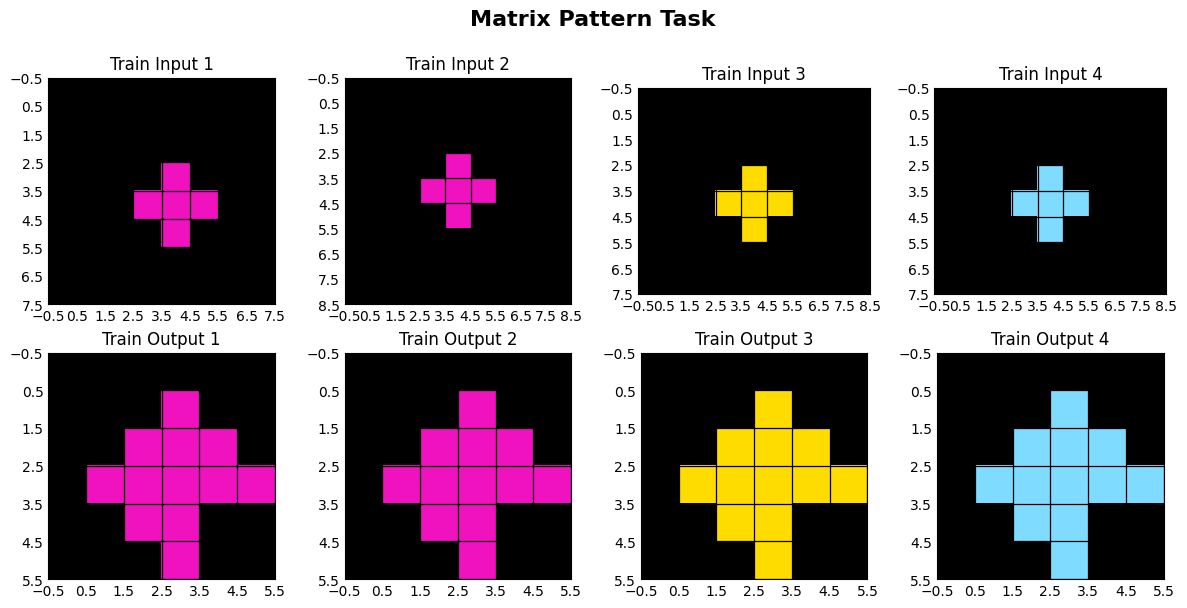

Visualizing Problem 75288


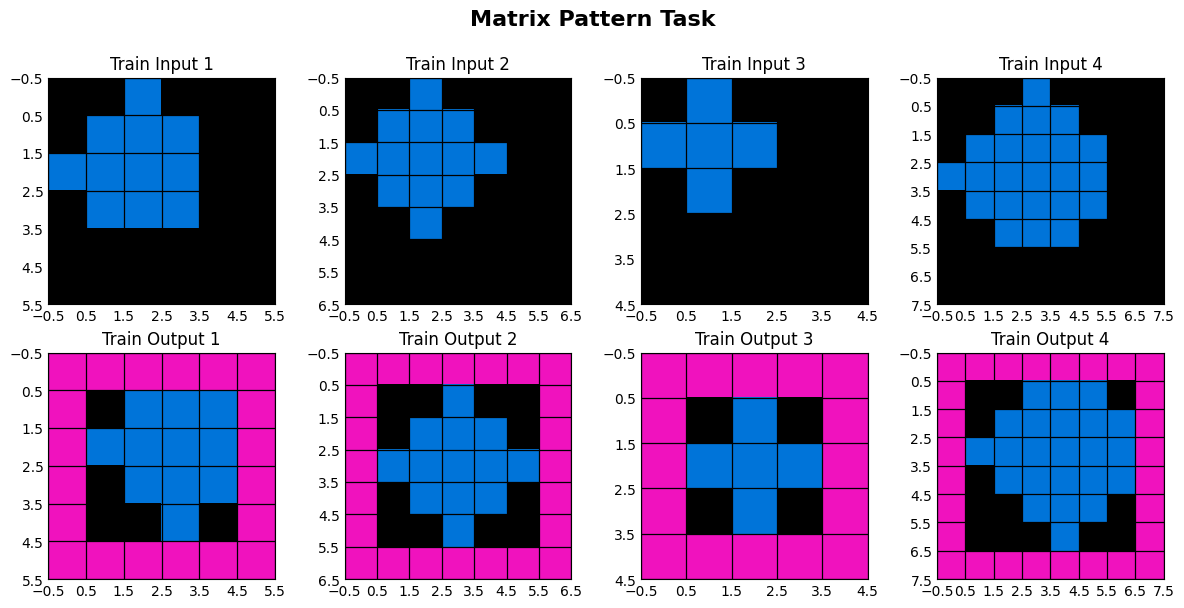

Visualizing Problem 76159


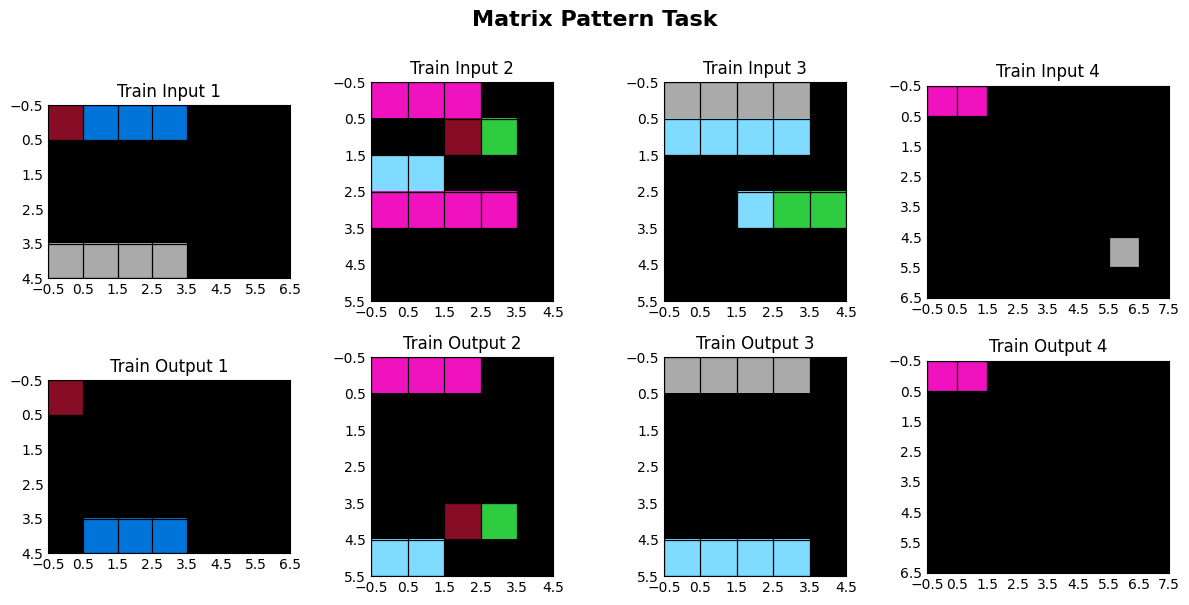

Visualizing Problem 76640


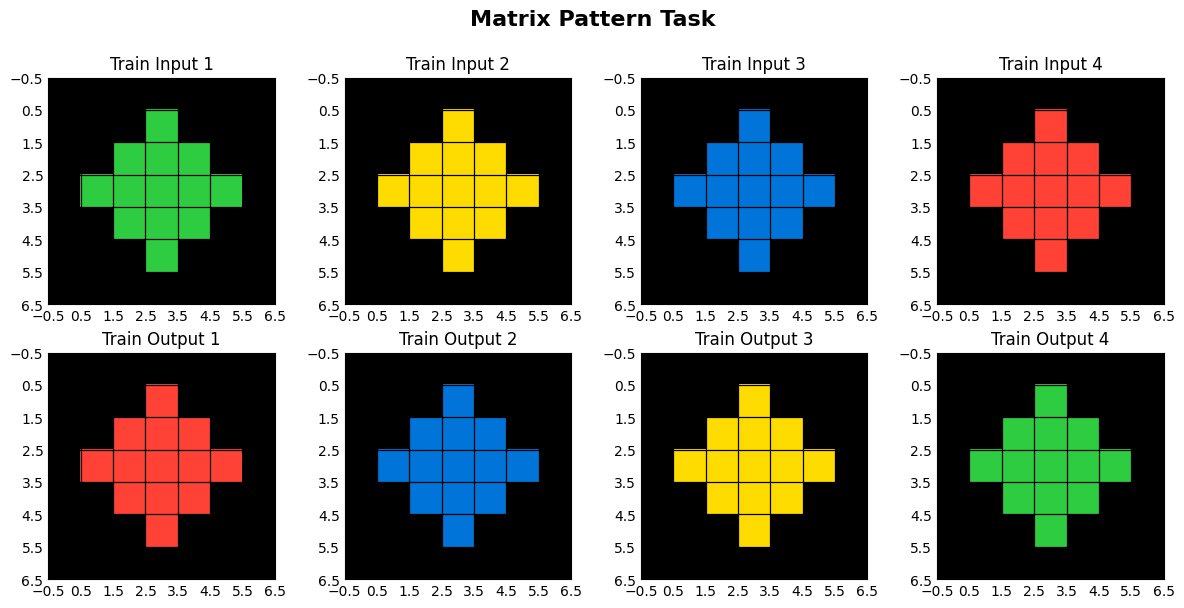

Visualizing Problem 76832


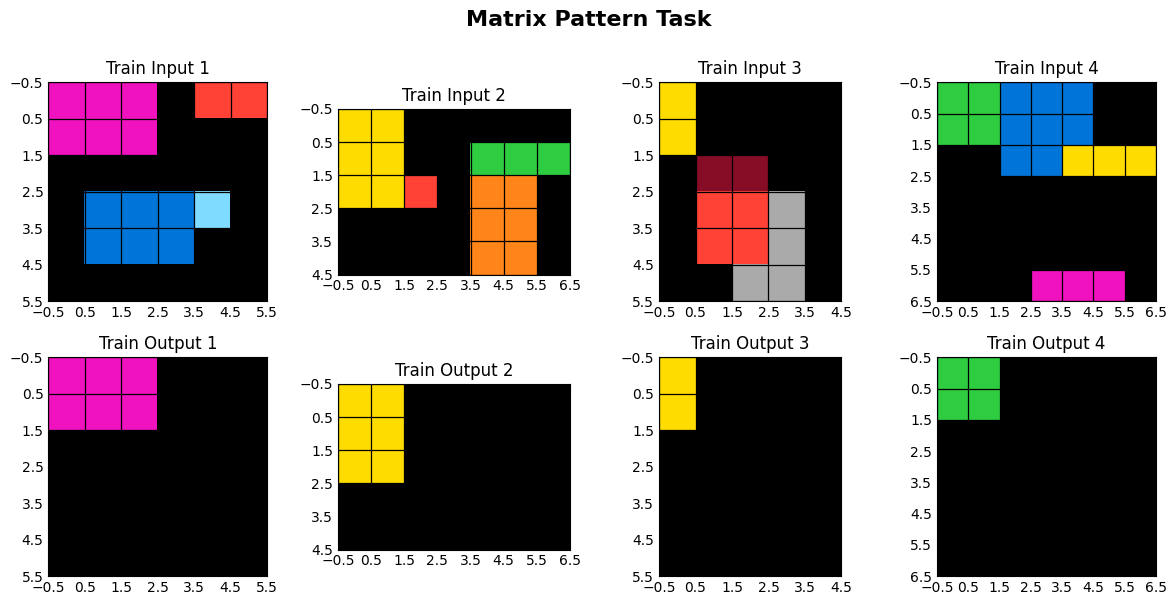

Visualizing Problem 77225


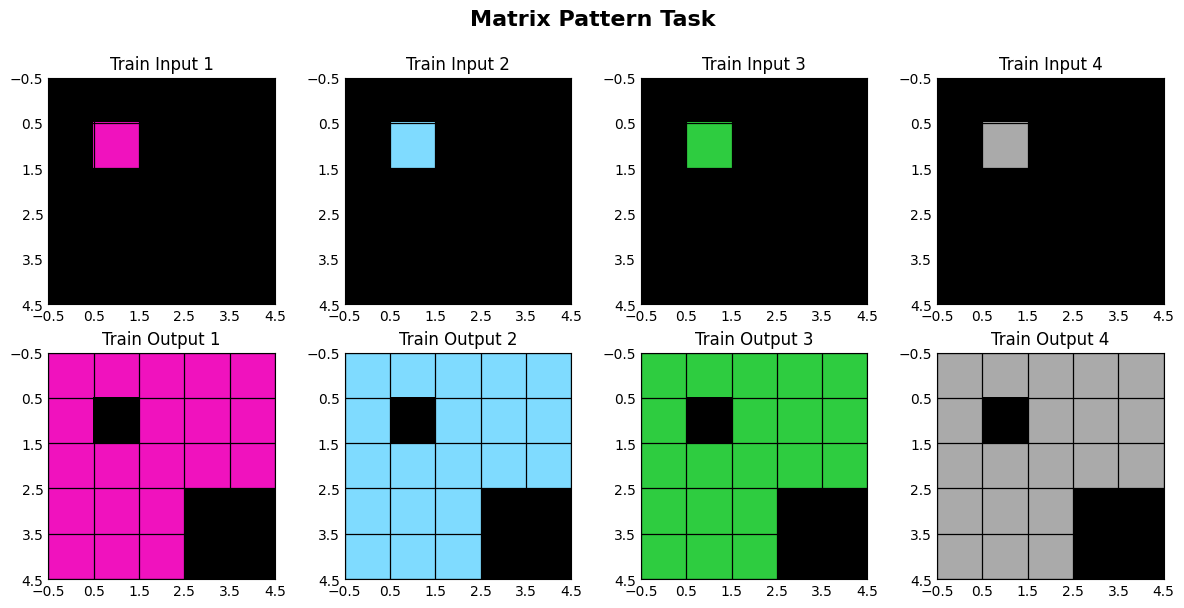

Visualizing Problem 77247


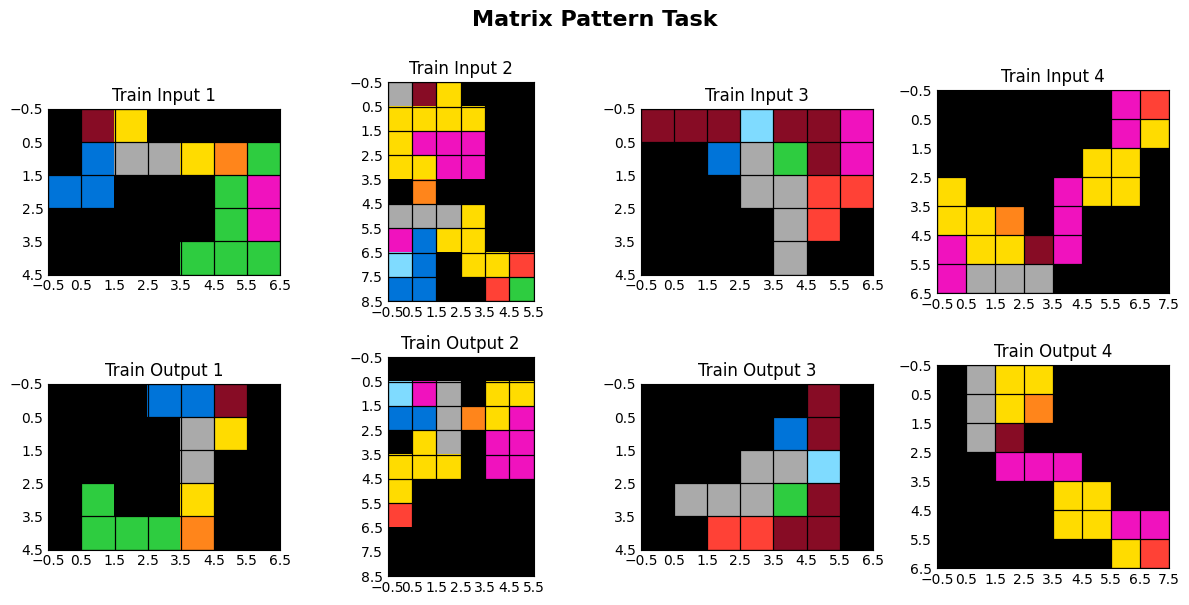

Visualizing Problem 78729


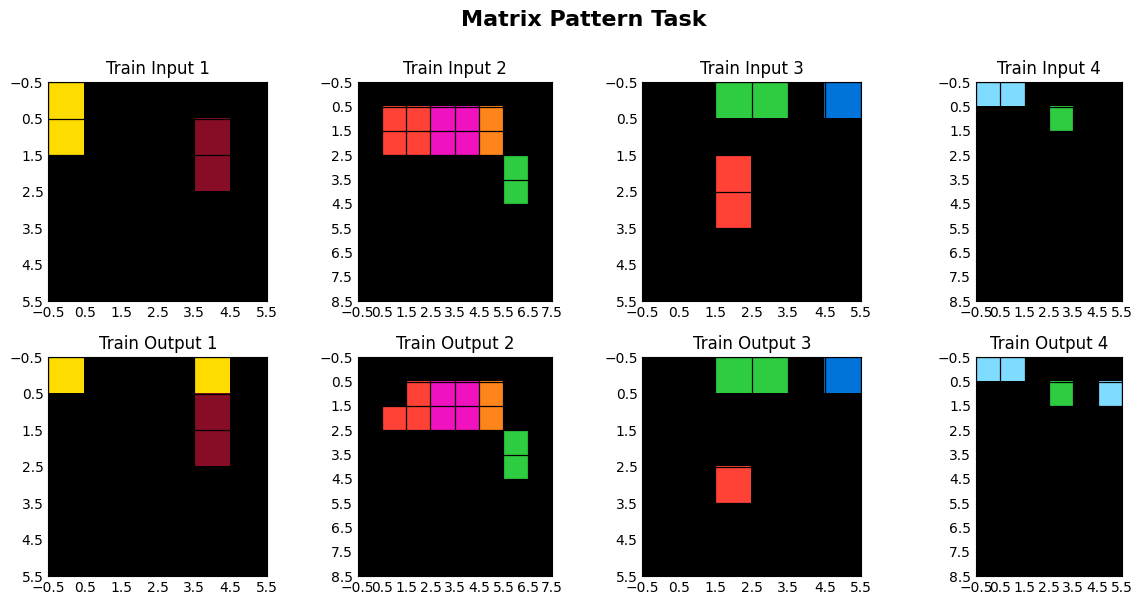

Visualizing Problem 79047


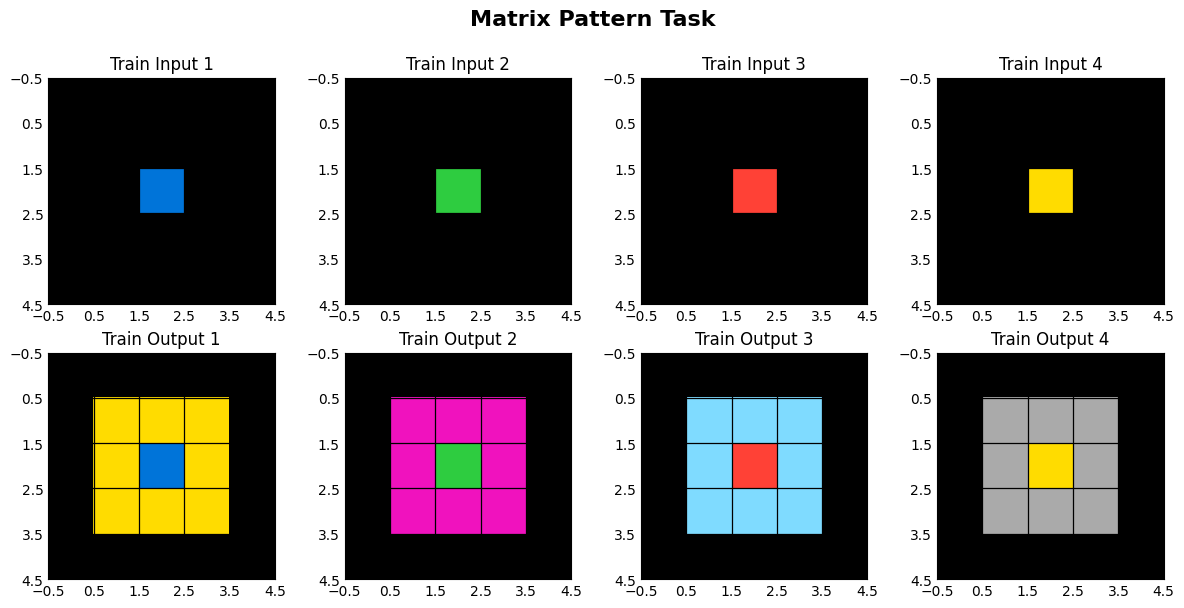

Visualizing Problem 79540


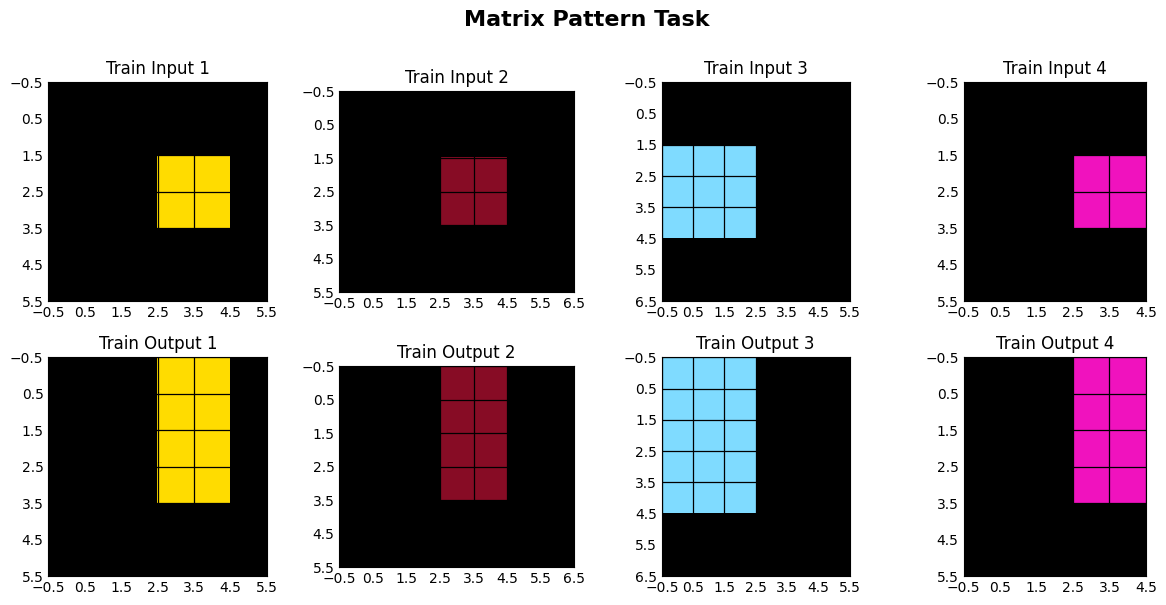

Visualizing Problem 79574


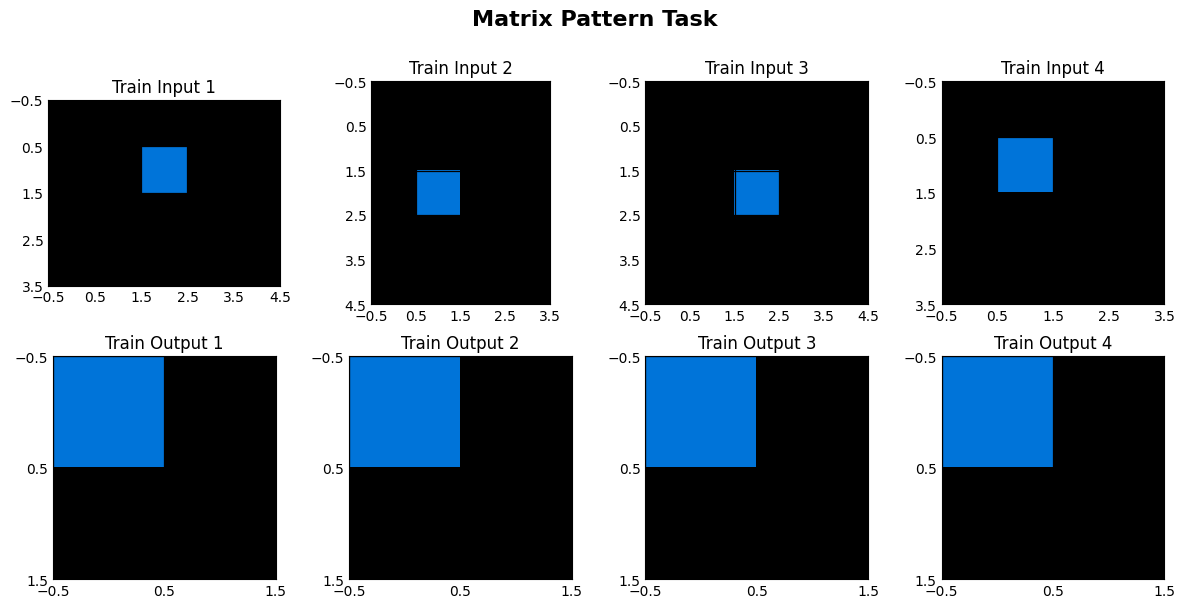

Visualizing Problem 80591


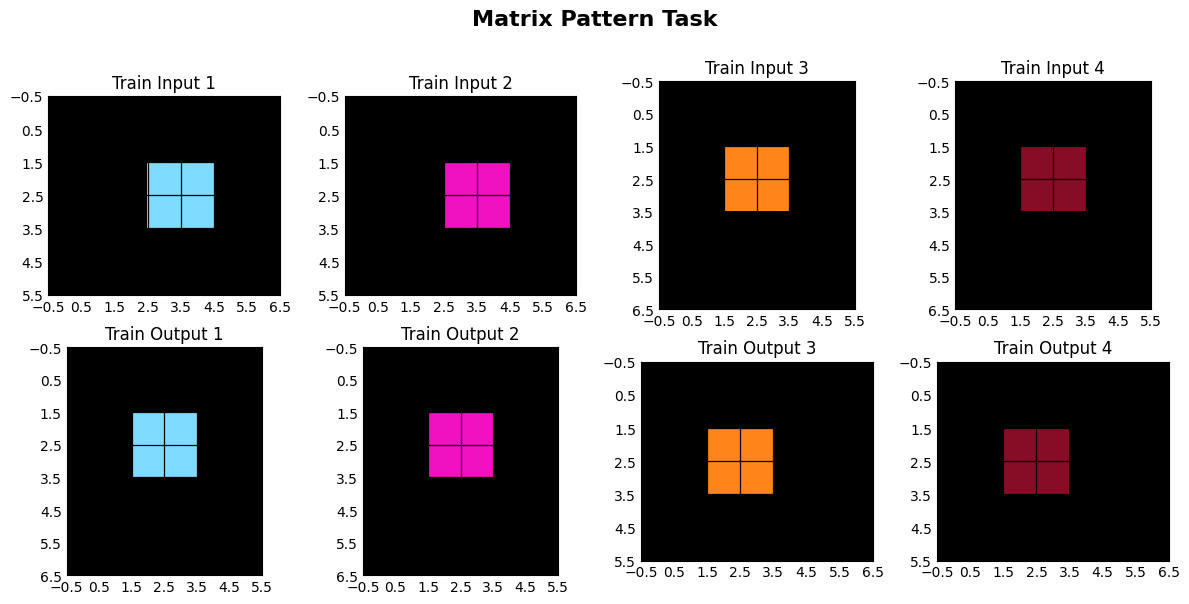

Visualizing Problem 80894


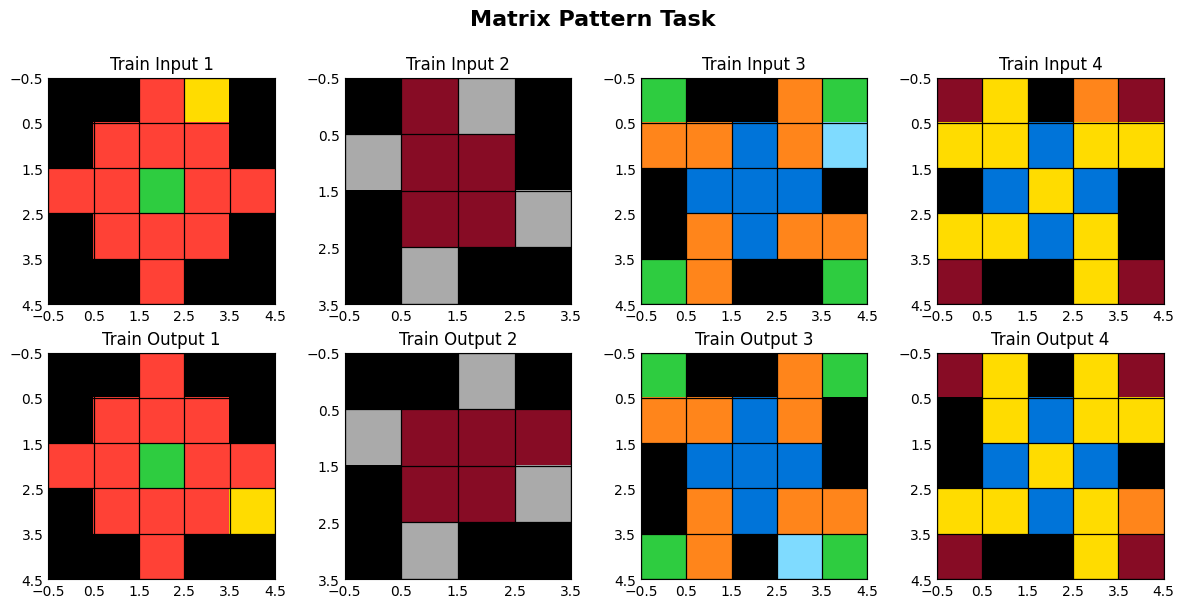

Visualizing Problem 80913


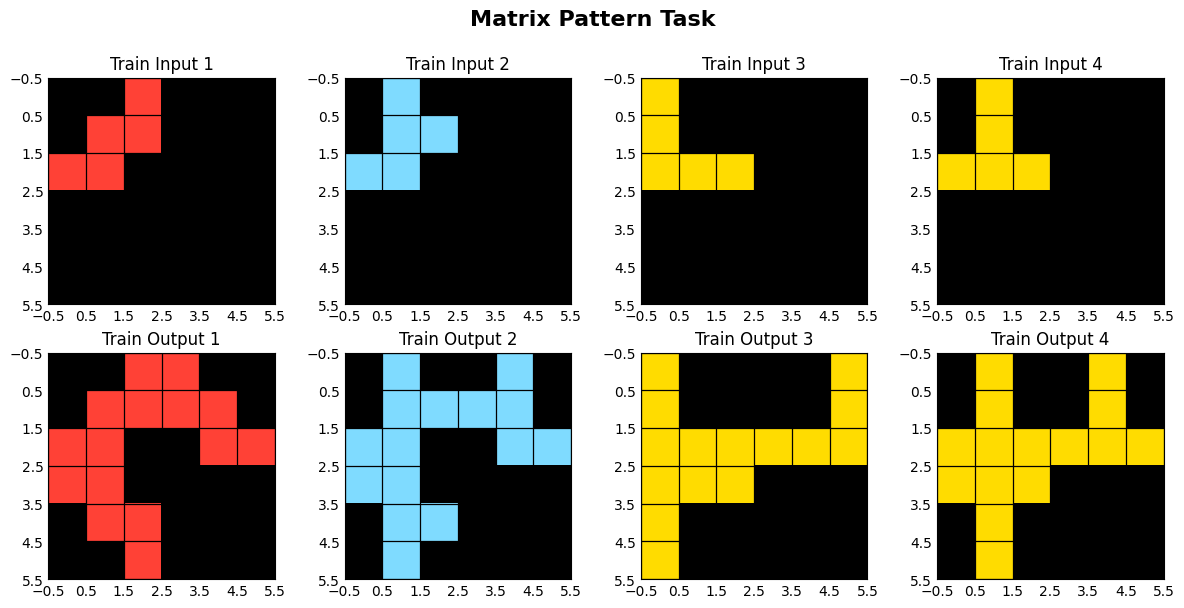

Visualizing Problem 81220


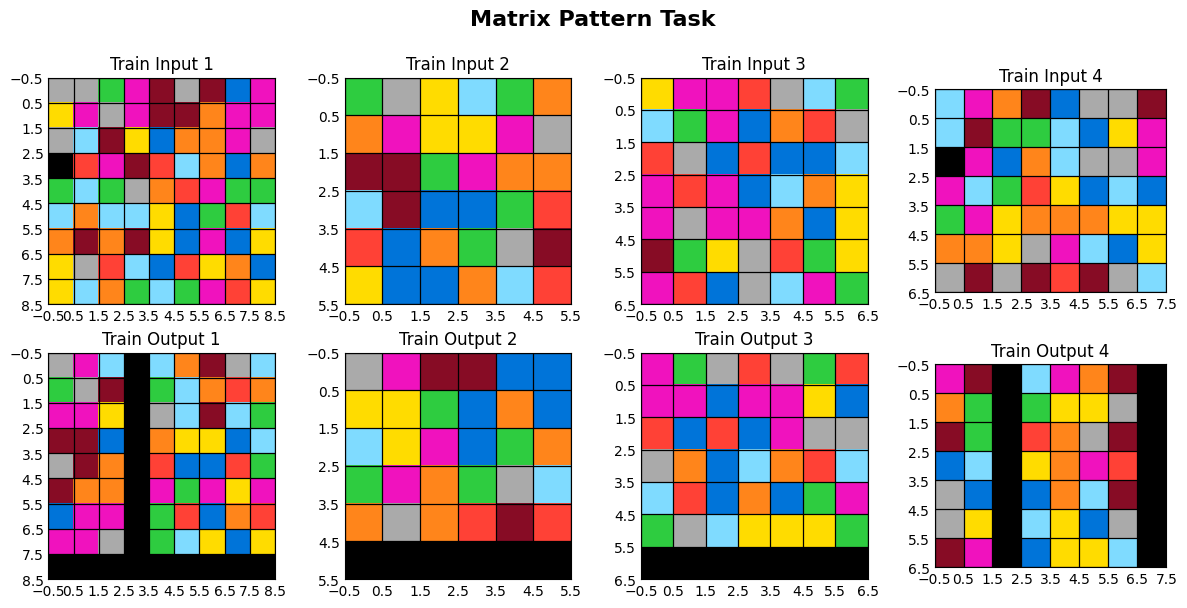

Visualizing Problem 81791


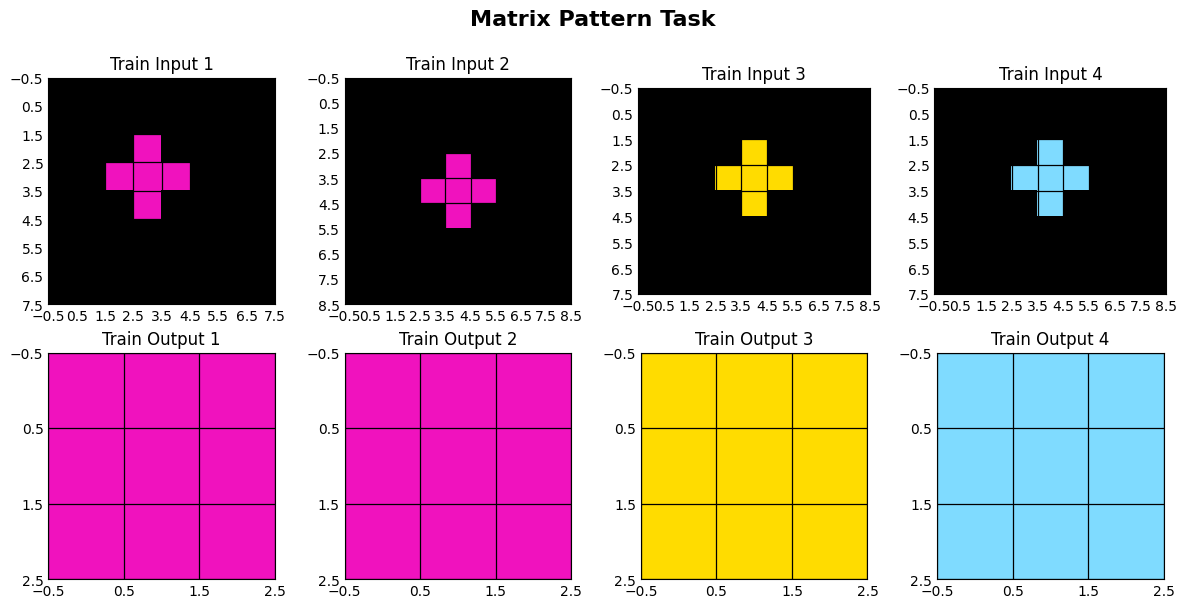

Visualizing Problem 82317


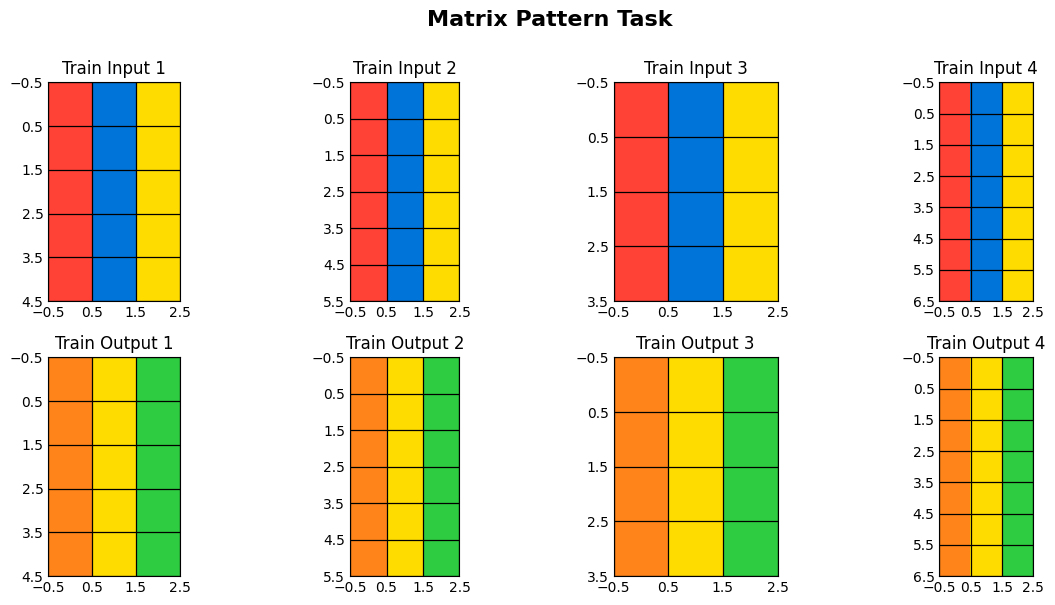

Visualizing Problem 83015


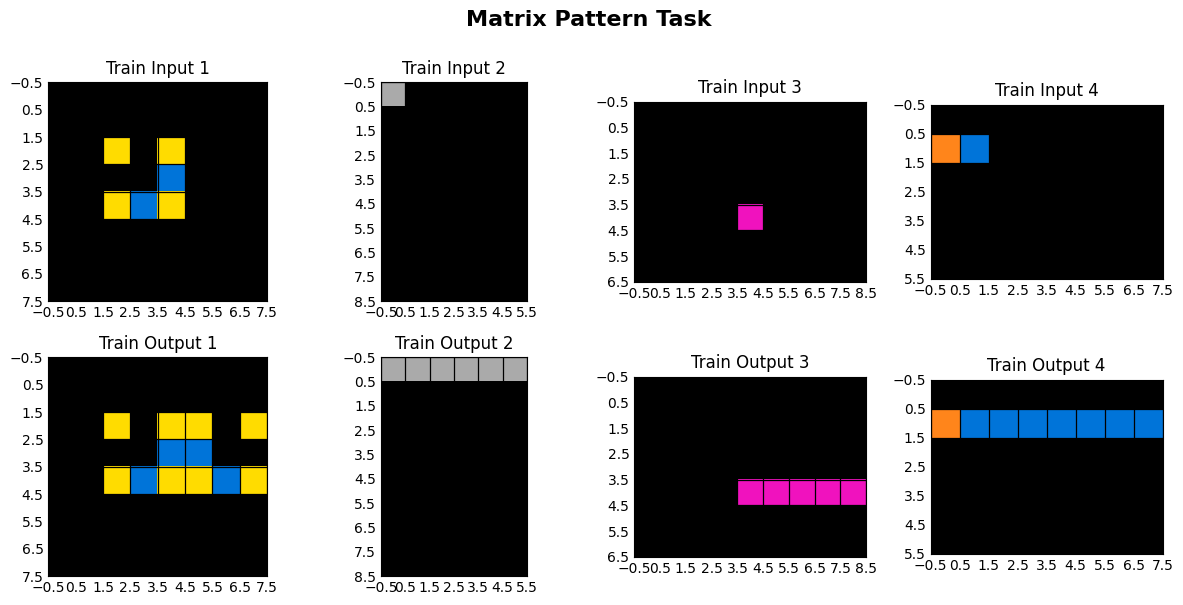

Visualizing Problem 83762


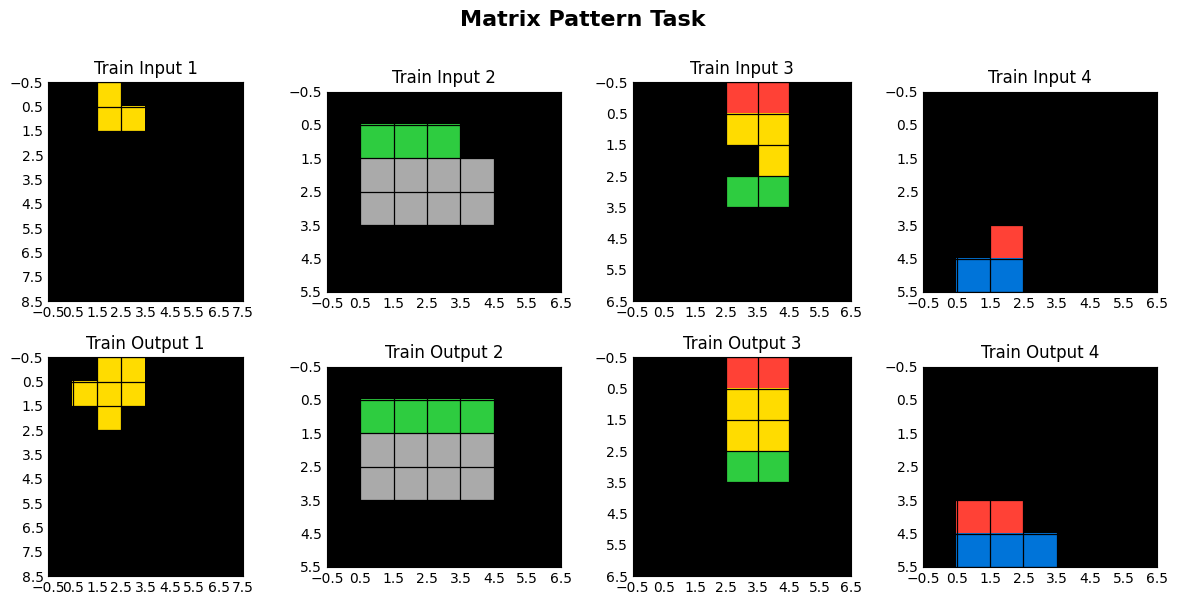

Visualizing Problem 84415


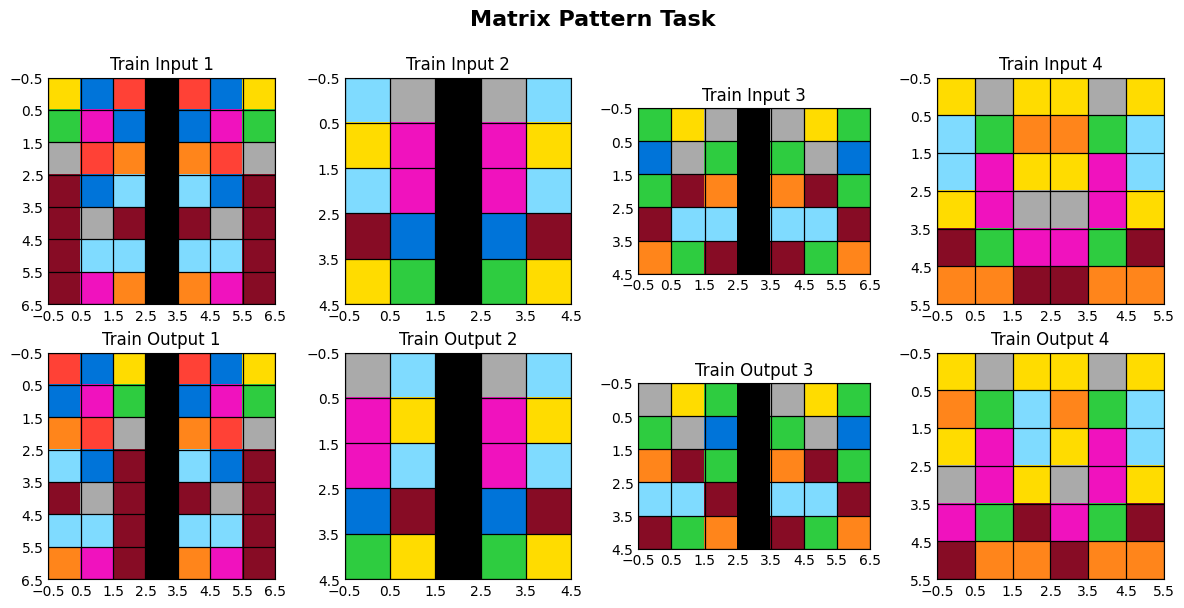

Visualizing Problem 84448


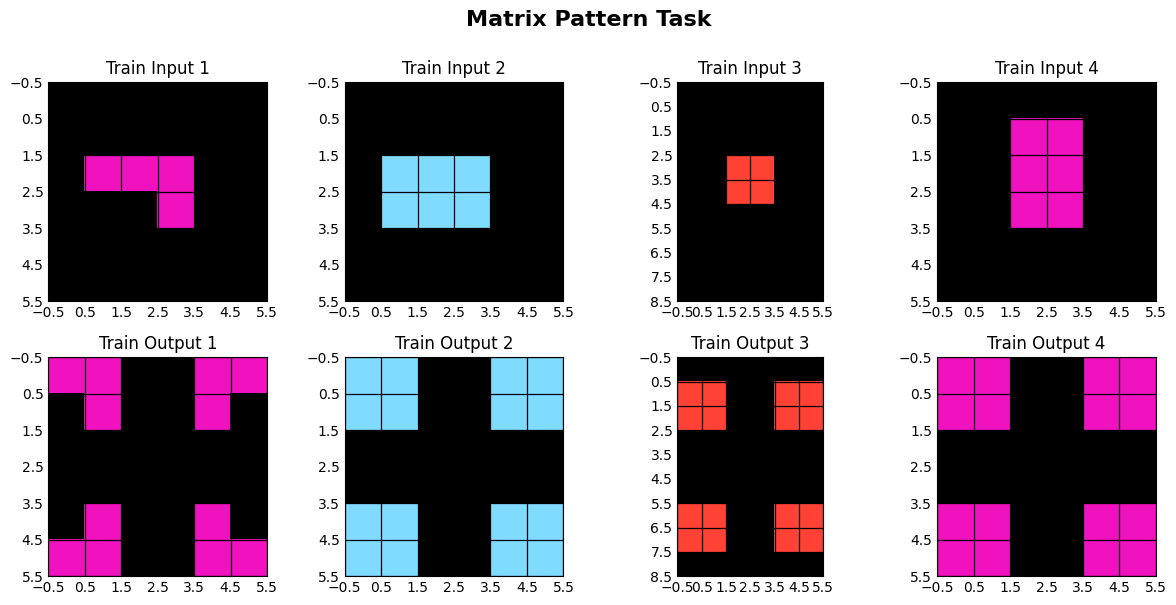

Visualizing Problem 84980


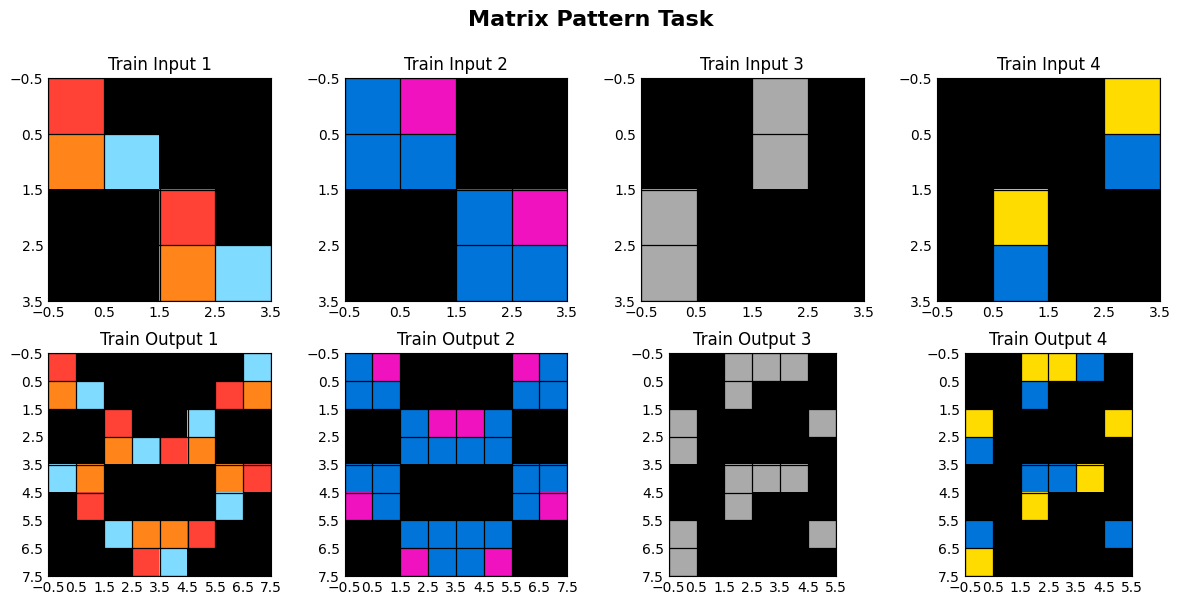

Visualizing Problem 85111


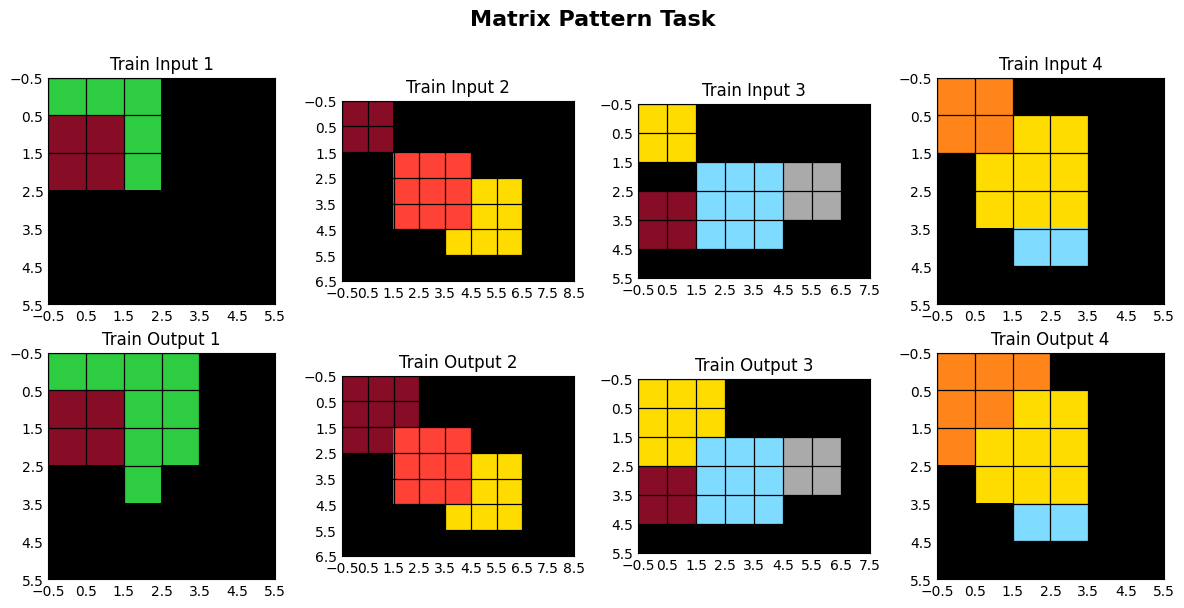

Visualizing Problem 87326


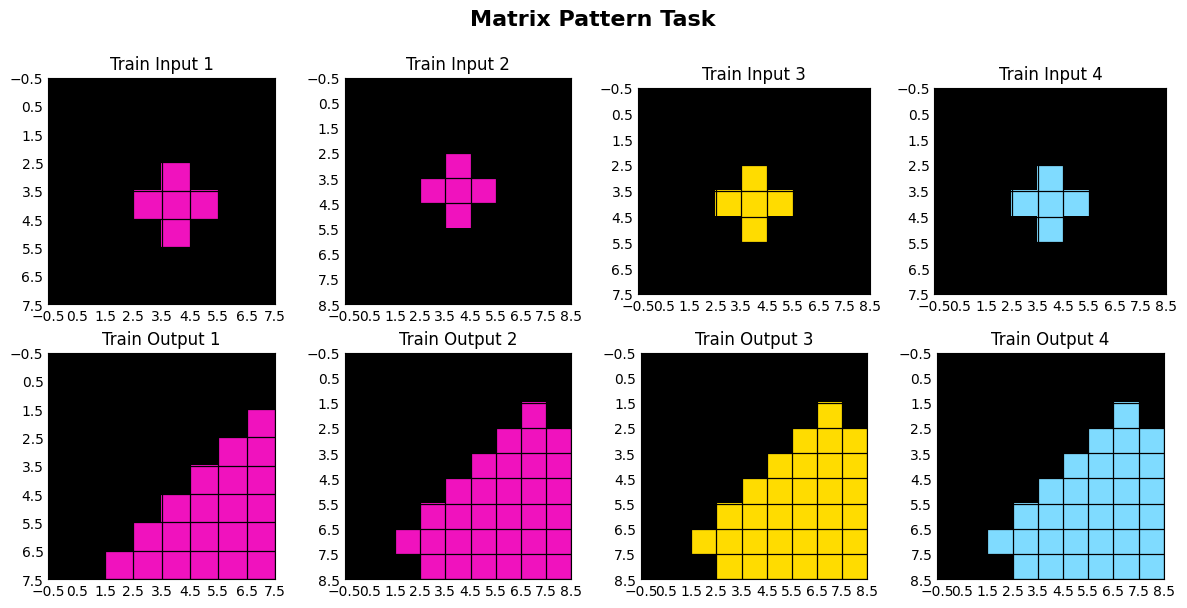

Visualizing Problem 88128


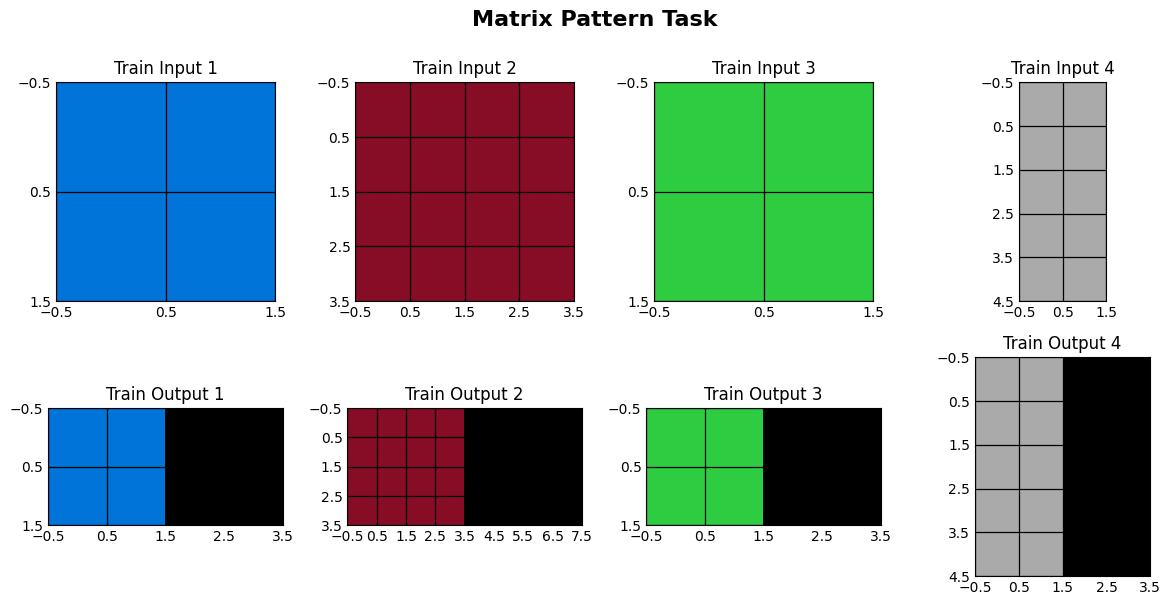

Visualizing Problem 88260


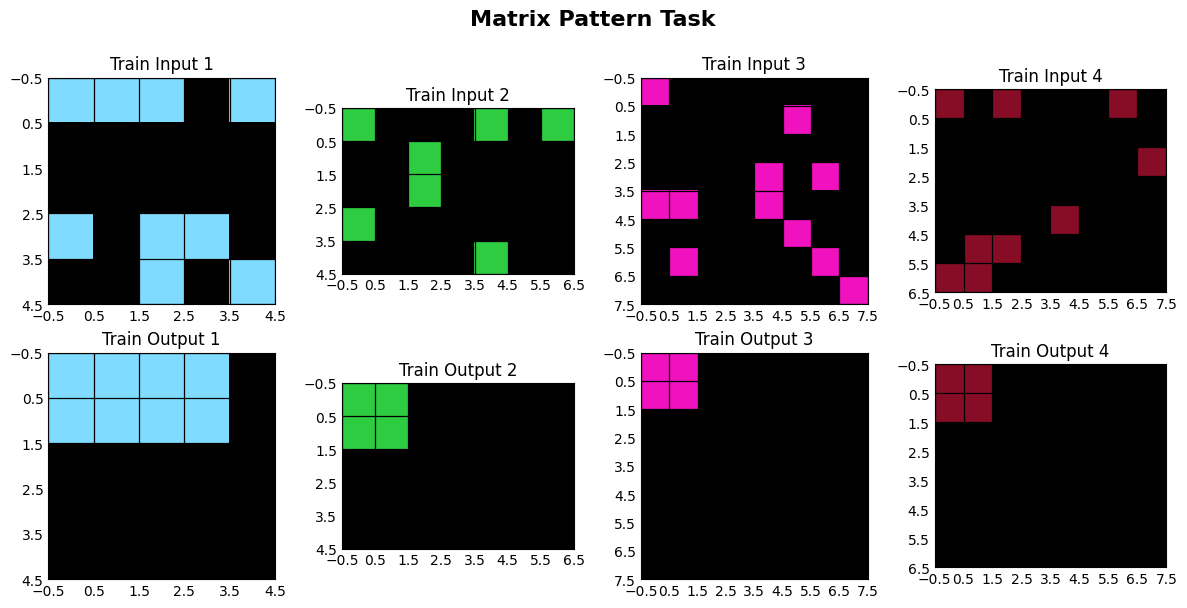

Visualizing Problem 88607


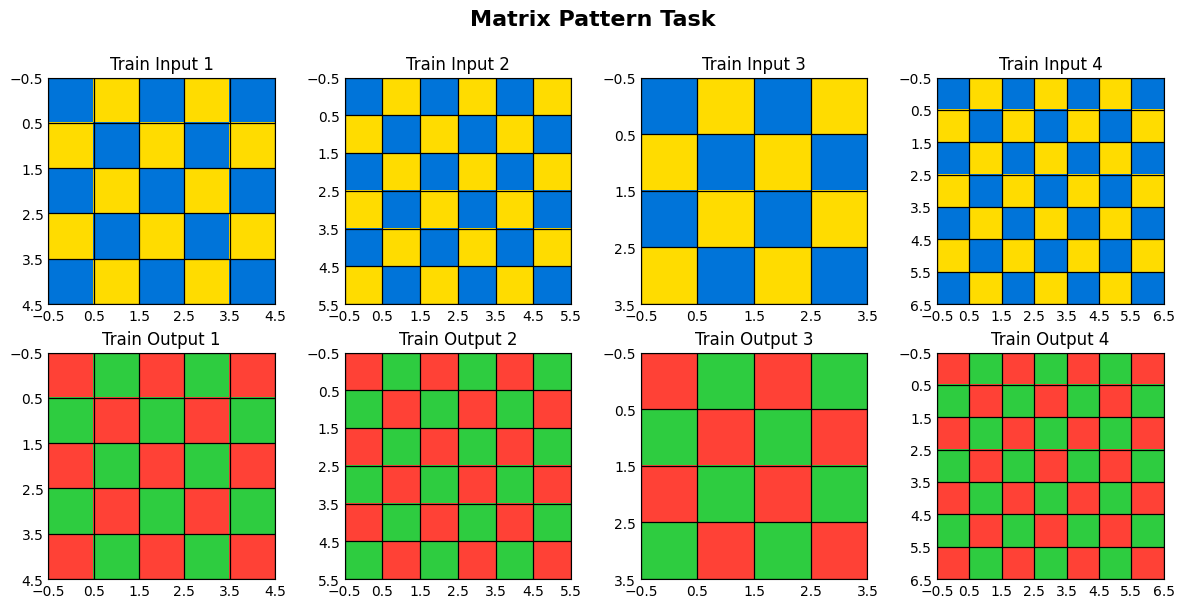

Visualizing Problem 88665


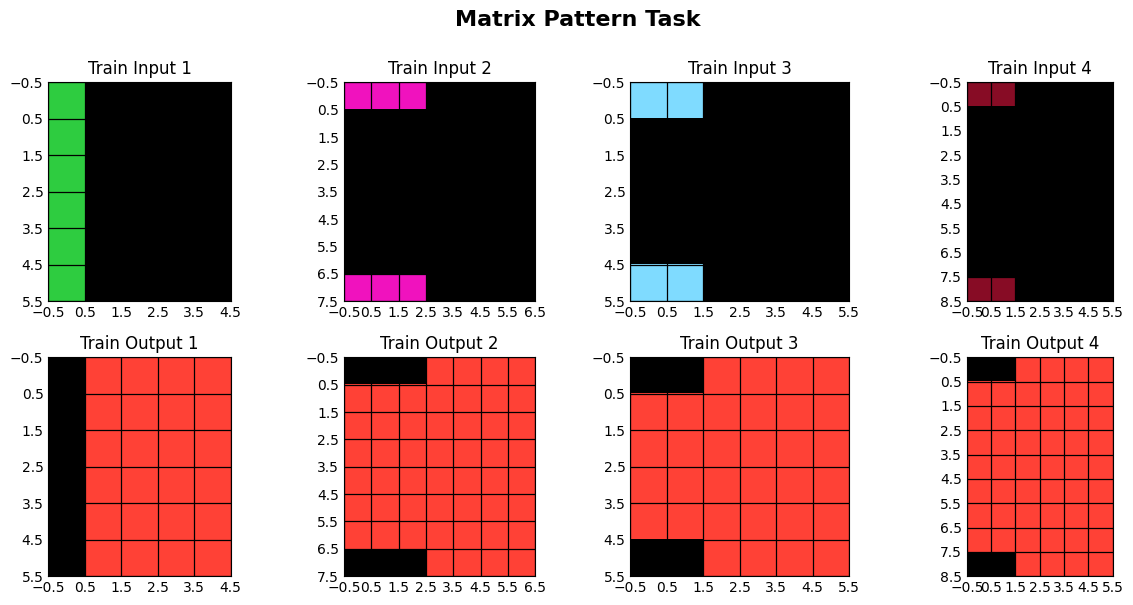

Visualizing Problem 88853


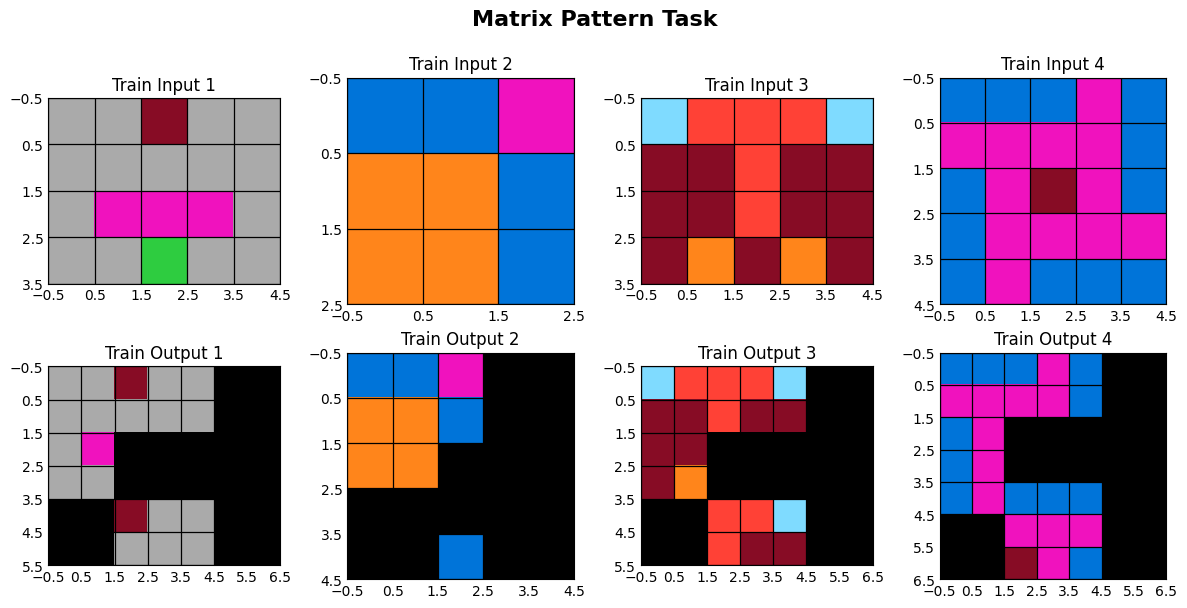

Visualizing Problem 89644


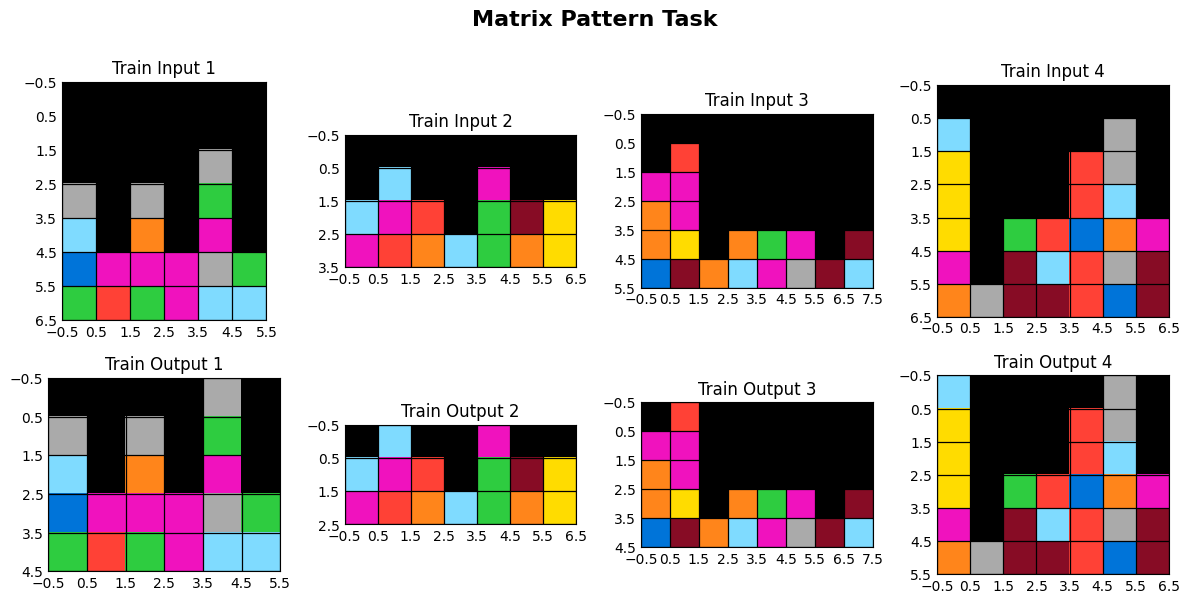

Visualizing Problem 91070


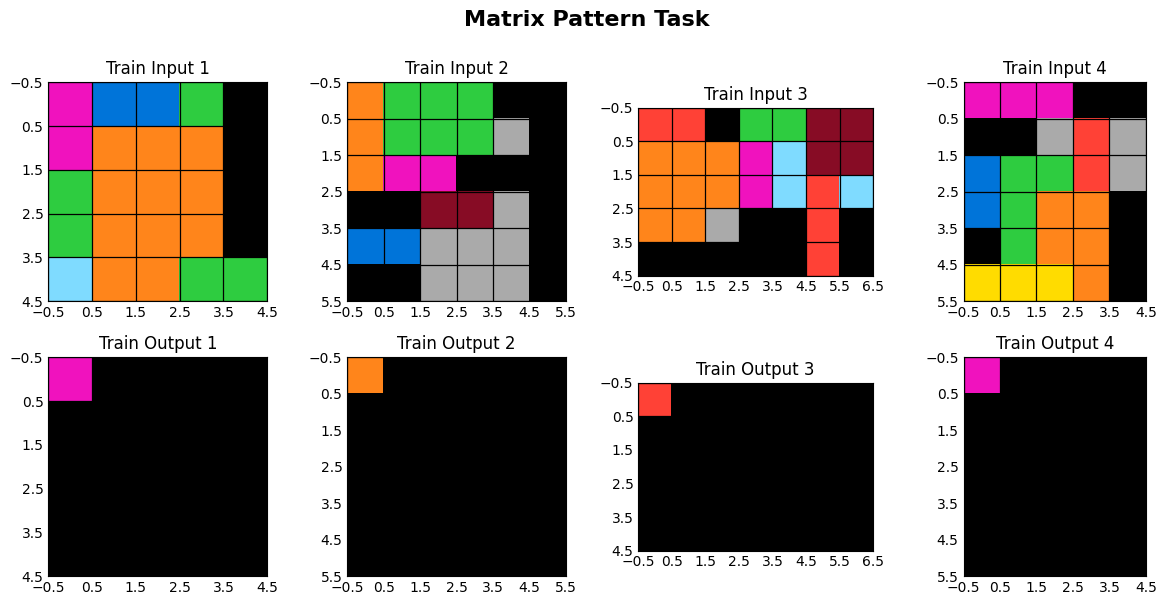

Visualizing Problem 91686


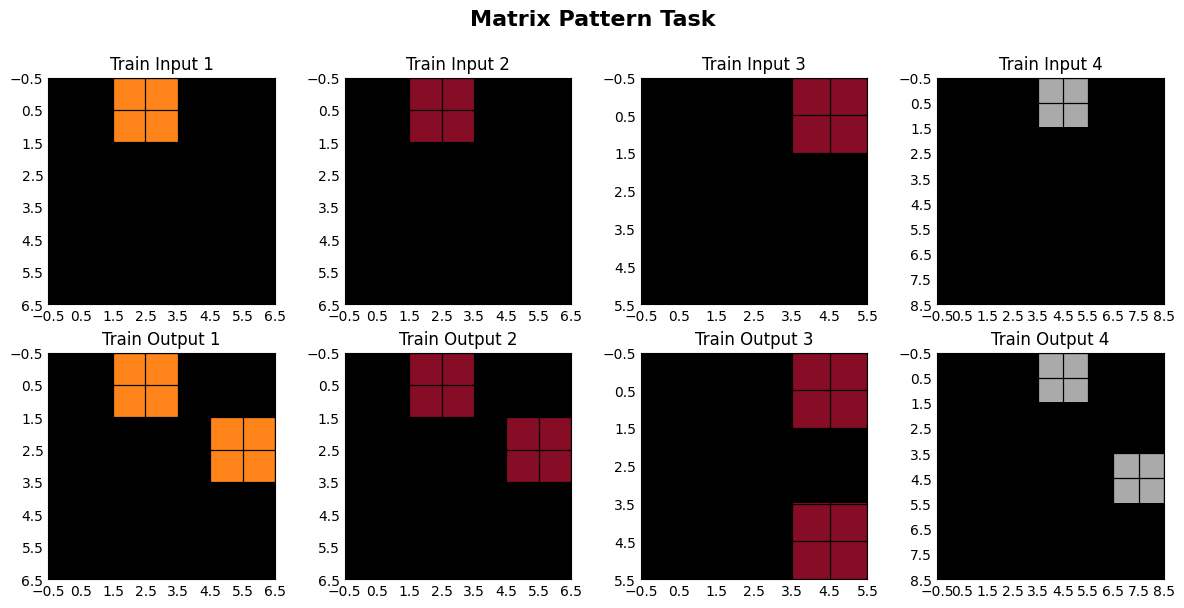

Visualizing Problem 92704


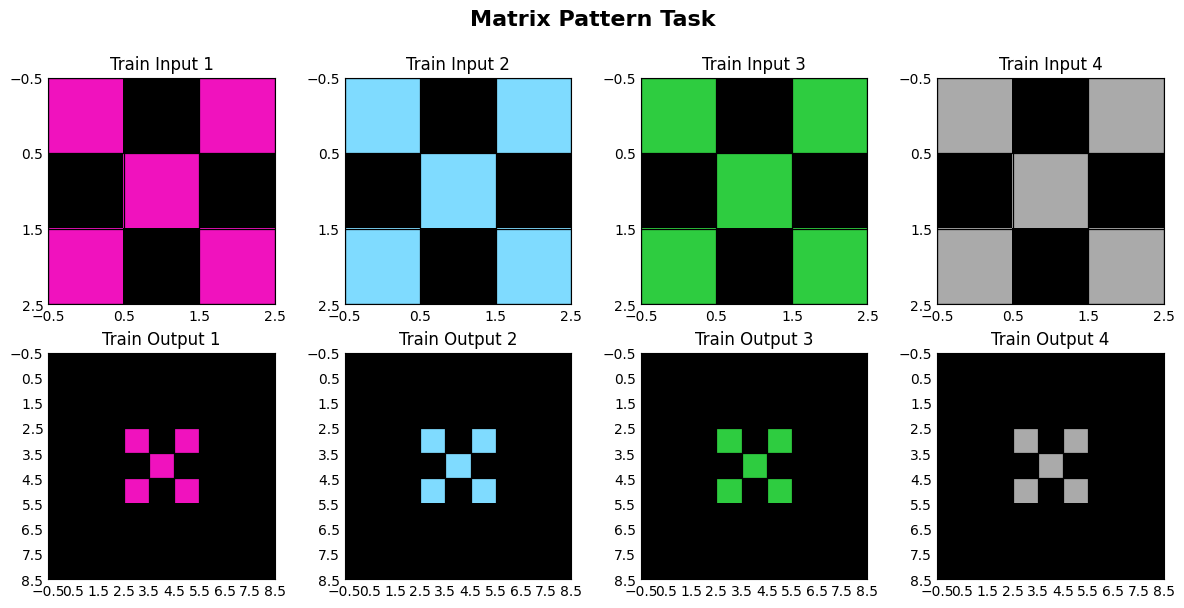

Visualizing Problem 93829


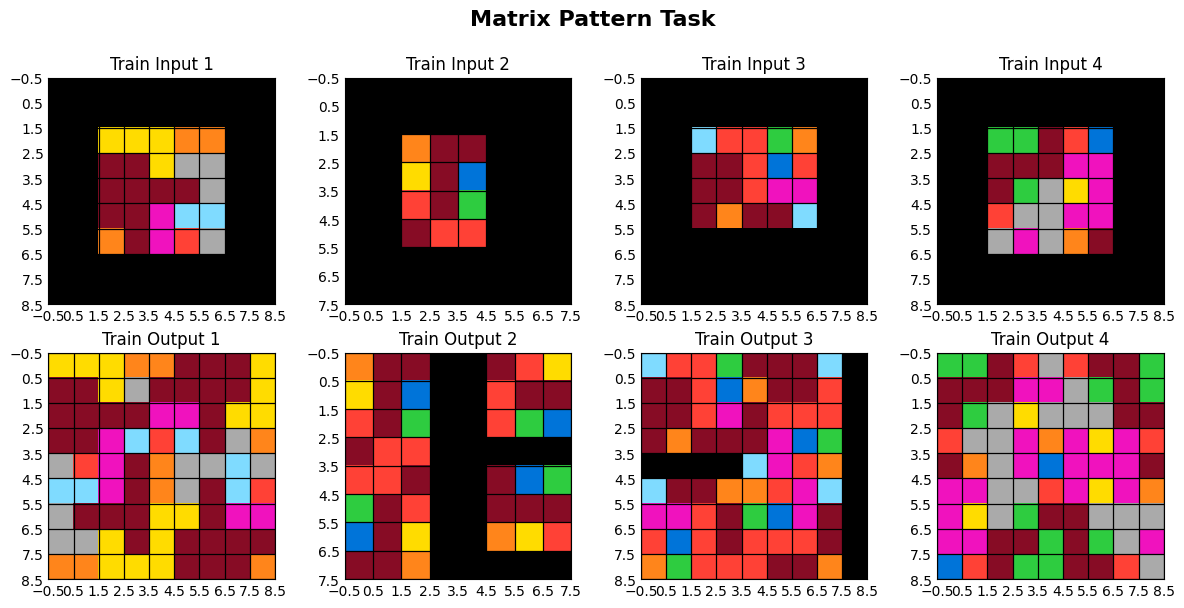

Visualizing Problem 93978


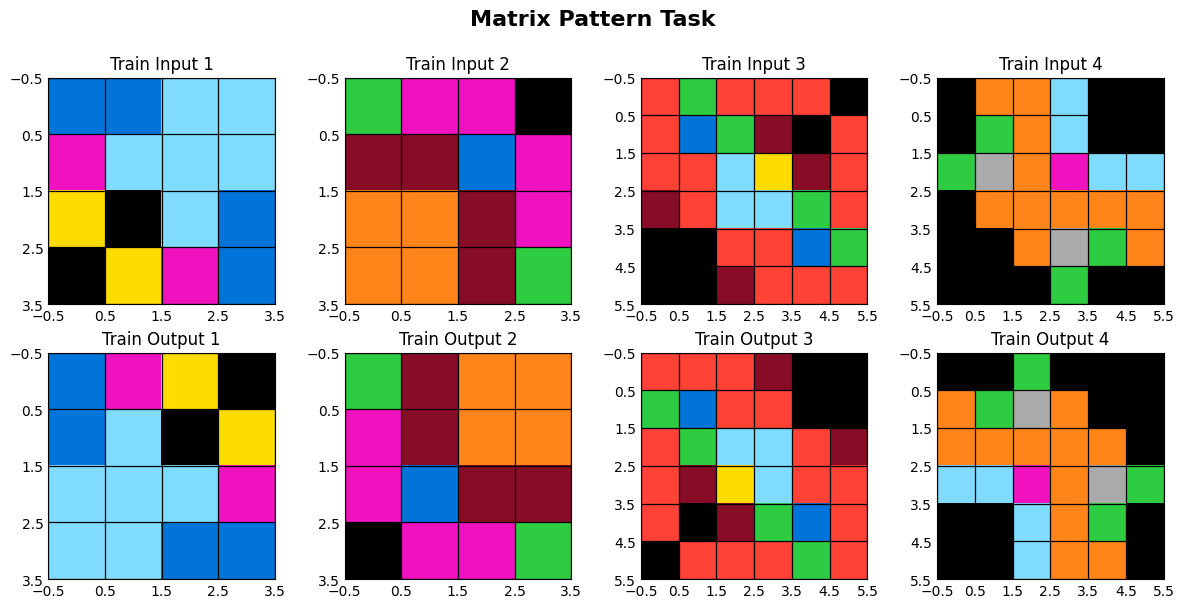

Visualizing Problem 94728


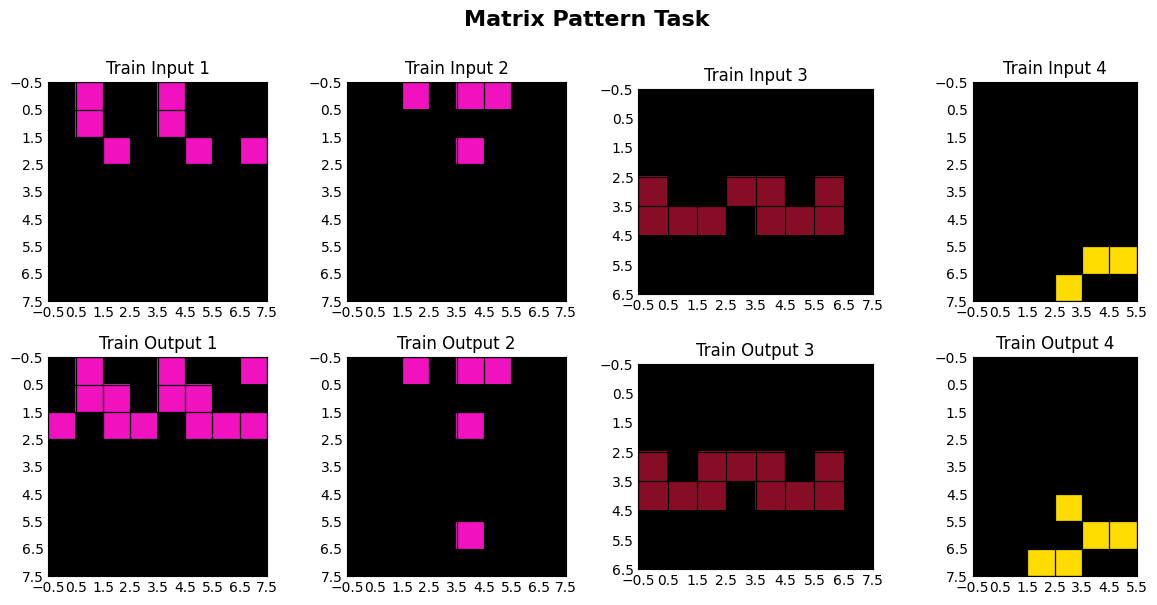

Visualizing Problem 95037


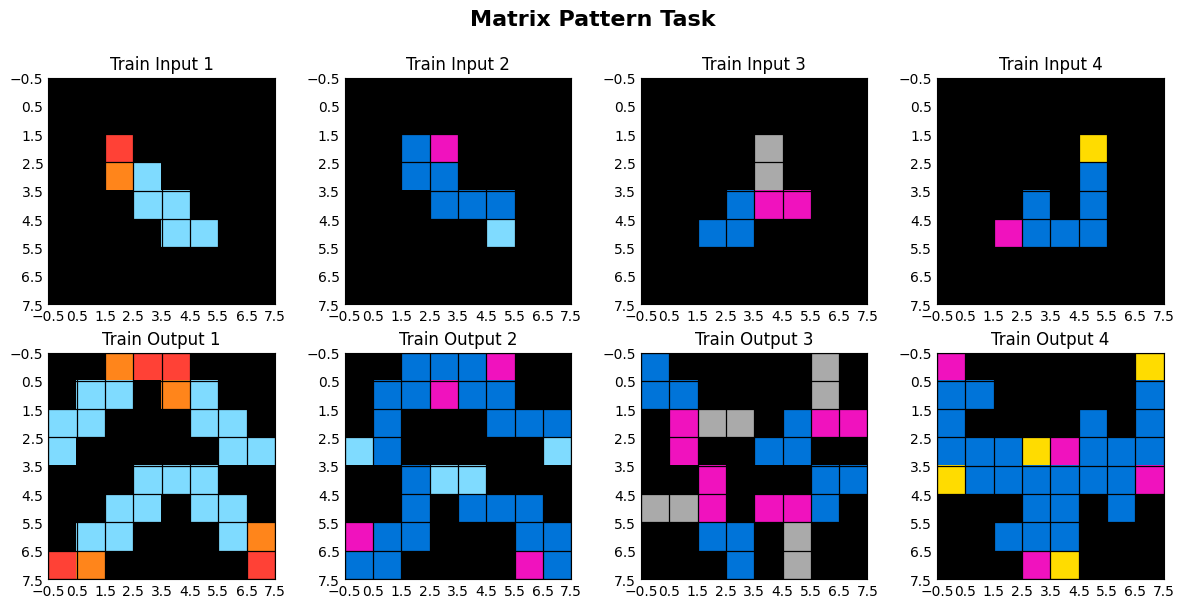

Visualizing Problem 95405


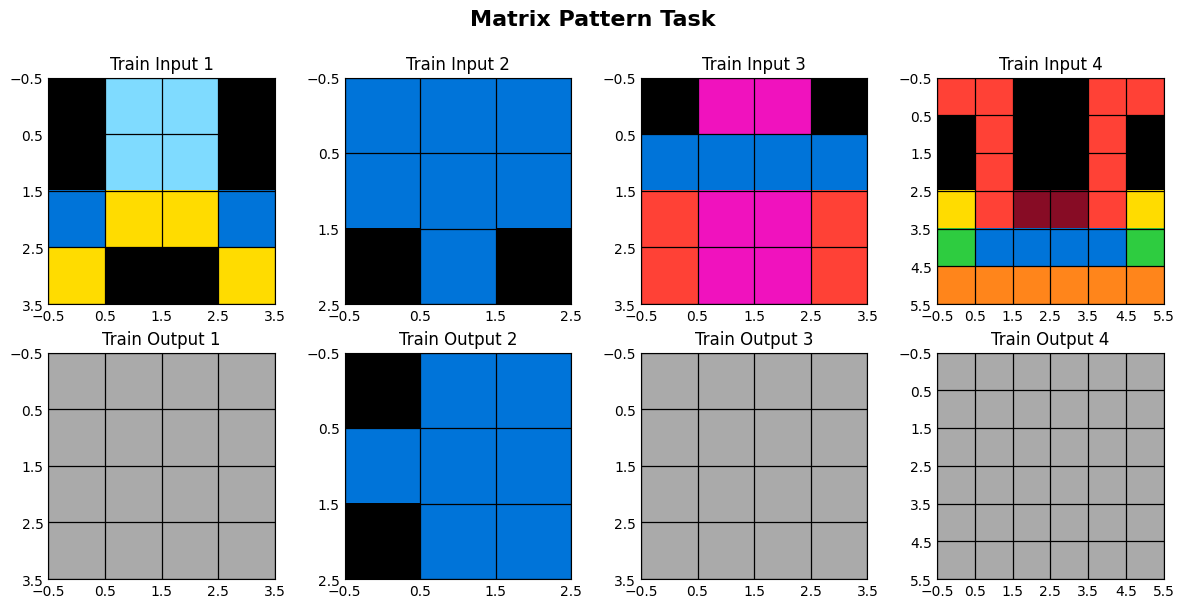

Visualizing Problem 96486


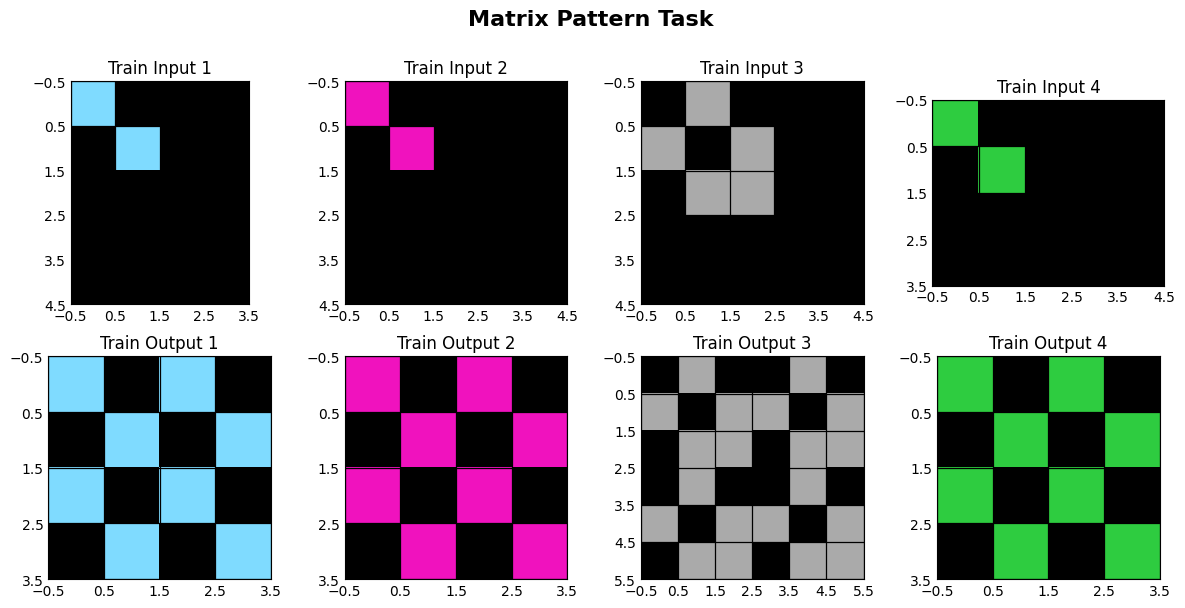

Visualizing Problem 96882


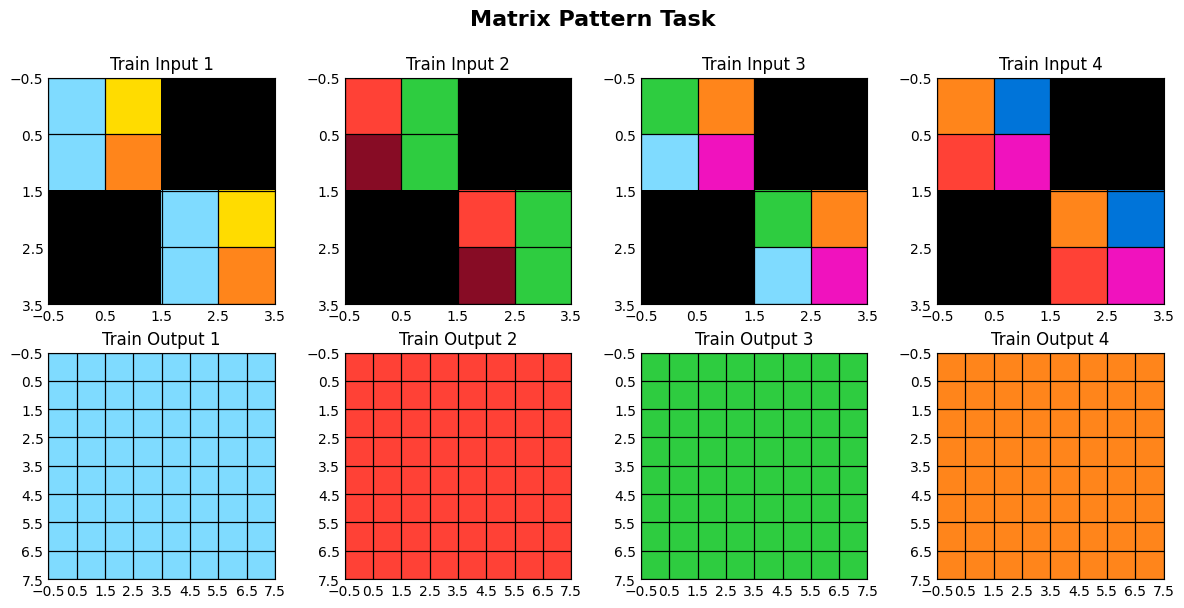

Visualizing Problem 98071


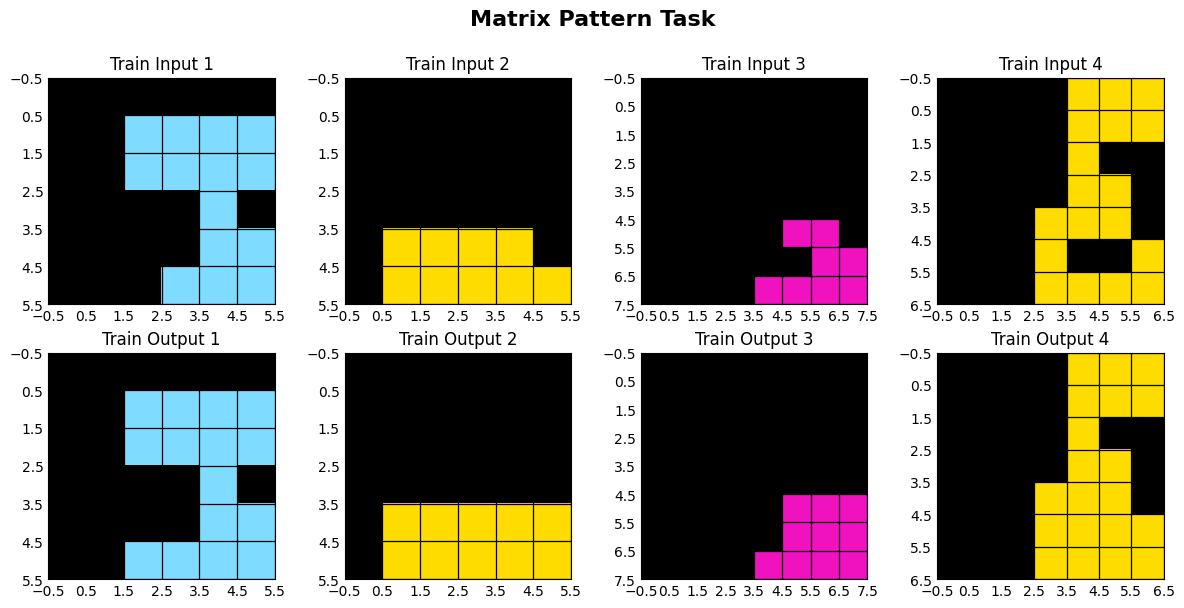

Visualizing Problem 98239


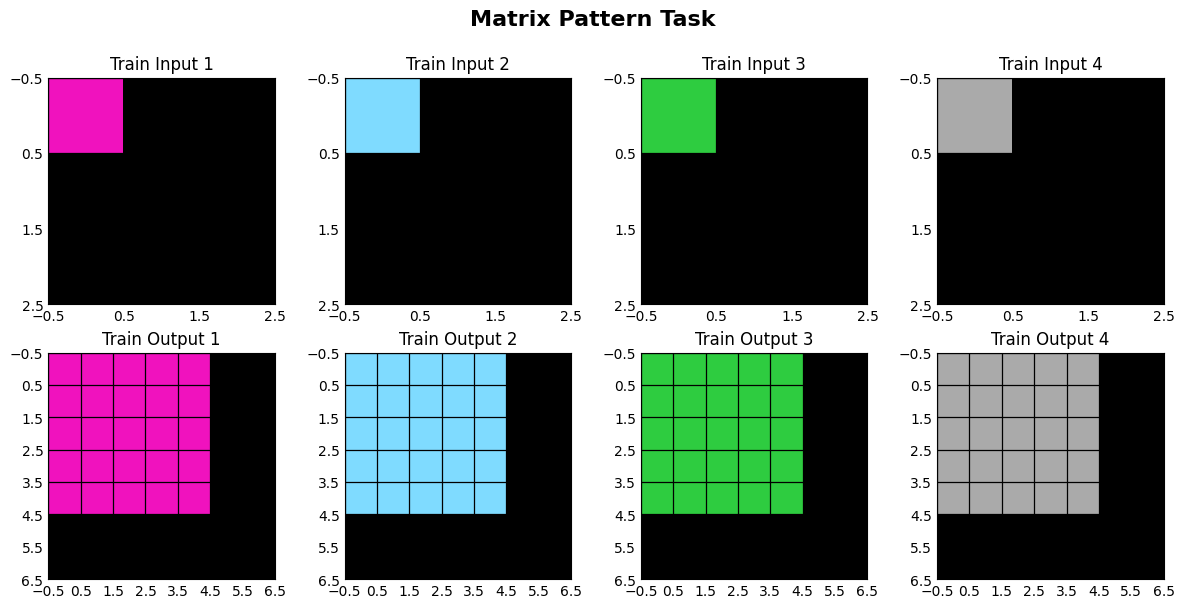

Visualizing Problem 98435


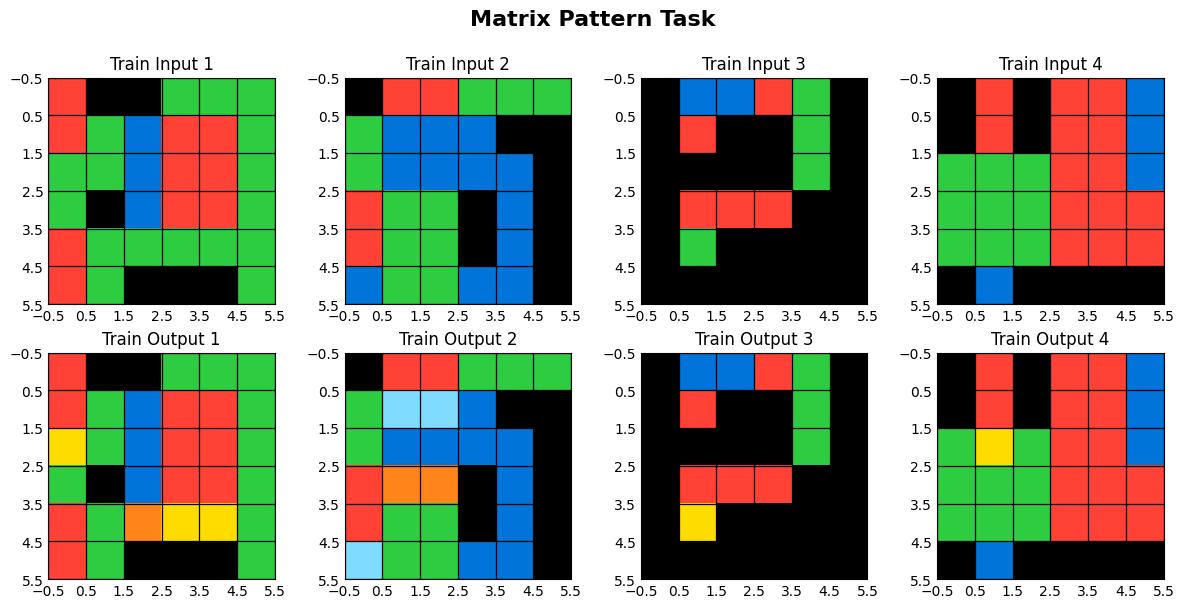

In [2]:
from datasets import load_dataset
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Function to visualize an ARC problem
def plot_single_task(challenge):
    # Create a colormap for the values
    max_value = 9  # Assuming maximum value based on sample data
    colors = plt.cm.viridis(np.linspace(0, 1, max_value + 1))
    colors[0] = [1, 1, 1, 1]  # Make 0 values white
    cmap = mcolors.ListedColormap(
        ['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
        '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25']
    )
    norm = mcolors.BoundaryNorm(np.arange(max_value + 2) - 0.5, max_value + 1)

    num_train = len(challenge['examples']) - 1
    num_test = 1
    total_examples = num_train + num_test

    # Create figure with subplots - 2 rows, num_examples columns
    fig, axs = plt.subplots(2, total_examples, figsize=(3*total_examples, 6))
    plt.suptitle('Matrix Pattern Task', fontsize=16, fontweight='bold', y=1)

    # Plot training examples
    for j in range(num_train + num_test):
        # Input
        input_matrix = challenge['examples'][j][0]
        ax = axs[0, j]
        ax.imshow(input_matrix, cmap=cmap, norm=norm)
        ax.grid(True, color='black', linewidth=0.9)
        ax.set_xticks([x-0.5 for x in range(1 + len(input_matrix[0]))])
        ax.set_yticks([x-0.5 for x in range(1 + len(input_matrix))])
        ax.tick_params(axis='both', color='none', length=0)
        ax.set_title(f'Train Input {j+1}', fontsize=12)

        # Output
        output_matrix = challenge['examples'][j][1]
        ax = axs[1, j]
        ax.imshow(output_matrix, cmap=cmap, norm=norm)
        ax.grid(True, color='black', linewidth=0.9)
        ax.set_xticks([x-0.5 for x in range(1 + len(output_matrix[0]))])
        ax.set_yticks([x-0.5 for x in range(1 + len(output_matrix))])
        ax.tick_params(axis='both', color='none', length=0)
        ax.set_title(f'Train Output {j+1}', fontsize=12)


    plt.tight_layout()
    plt.show()

# Load your filtered problems
with open("easiest_arc_problems150.json", "r") as f:
    easy_problems = json.load(f)

# Visualize a few examples
for i in range(len(easy_problems)):
    problem = easy_problems[i]
    print(f"Visualizing Problem {problem.get('problem_id', i)}")
    plot_single_task(problem)